# Deep Hedging for nonlinear generalized affine processes

# Example: Call Option

Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import style
style.use('ggplot')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from mpl_toolkits.mplot3d import Axes3D
from Functions import*
from matplotlib import rcParams
import random

Execute if it should be run on a GPU

In [2]:
physical_devices = tf.config.list_physical_devices('GPU') 

Write a function to generate paths of the SDE
$$
d X_t = (b_0+b_1 X_t) dt + (a_0+a_1 X_t)^\gamma dW_t,~t\geq 0,\\
X_0 = x_0
$$
using the Euler-Maruyama Method, i.e., through
$$
X_{i+1} = X_i+(b_0+b_1 X_i) \Delta t_i +(a_0+a_1 X_i)^\gamma  \Delta W_i,~i=1,\dots,n
$$
with $\Delta t_i = T/n$ and $\Delta W_i = W_{(i+1)T/n}-W_{iT/n}$ and $X_0 = x_0$

### Plot sample paths

Too see the effects of the random parameters:

Same $\omega$ for the Brownian motion in each path.

In [3]:
# Increase the size of xticks and yticks
labelsize = 18
rcParams['xtick.labelsize'] = labelsize
rcParams['ytick.labelsize'] = labelsize 

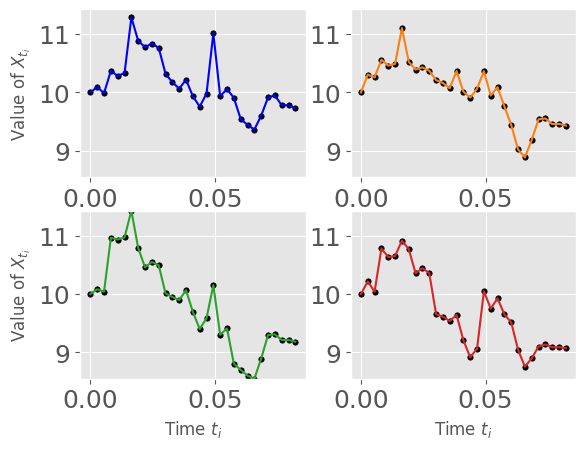

In [4]:
T = 30 / 365 # Maturity
n = 30 # Trading Dates
a_0 = [0.3,0.7]
a_1 = [0.4,0.6]
b_0 = [-0.2,0.2]
b_1 = [-0.1,0.1]
gamma = [0.5,1.5]
x_0 = 10
# Generate x and y values
times = np.linspace(0,T,n+1)
path1 = generate_path(a_0,a_1,b_0,b_1,gamma,x_0,T,n,seed = 5)
path2 = generate_path(a_0,a_1,b_0,b_1,gamma,x_0,T,n,seed = 5)
path3 = generate_path(a_0,a_1,b_0,b_1,gamma,x_0,T,n,seed = 5)
path4 = generate_path(a_0,a_1,b_0,b_1,gamma,x_0,T,n,seed = 5)


#plot
fig, axs = plt.subplots(2, 2)
ylim_1 = min([min(path1),min(path2),min(path3),min(path4)])
ylim_2 = max([max(path1),max(path2),max(path3),max(path4)])
axs[0, 0].plot(times, path1,color="blue")
axs[0, 0].scatter(times, path1,color="black",s=15)
axs[0, 0].set(ylabel="Value of " + "$X_{t_i}$",ylim= [ylim_1,ylim_2])
axs[0, 1].plot(times, path2, 'tab:orange')
axs[0, 1].scatter(times, path2,color="black",s=15)
axs[0, 1].set(ylim= [ylim_1,ylim_2])
axs[1, 0].plot(times, path3, 'tab:green')
axs[1, 0].scatter(times, path3,color="black",s=15)
axs[1, 0].set(xlabel="Time "+"$t_i$", ylabel="Value of " + "$X_{t_i}$",ylim= [ylim_1,ylim_2])
axs[1, 1].plot(times, path4, 'tab:red')
axs[1, 1].scatter(times, path4,color="black",s=15)
axs[1, 1].set(xlabel="Time "+"$t_i$",ylim= [ylim_1,ylim_2])
plt.show()

Write a function to determine the optimal hedge based on a deep learning approach

Test it in a purely nonlinear setting:

$$
d X_t = (b_0+b_1 X_t) dt + (a_0+a_1 X_t)^{\gamma} dW_t
$$

for 

\begin{align}
a_0 &\in [0.3,0.7] \\
a_1 &\in [0.4,0.6] \\
b_0 &\in [-0.2,0.2] \\
b_1 &\in [-0.1,0.1] \\
\gamma &\in [0.5,1.5]
\end{align}

with payoff function $\Phi(X_T)=(X_T-X_0)^+$.

In [5]:
T = 30 / 365 # Maturity
n = 30 # Trading Dates
a_0 = [0.3,0.7]
a_1 = [0.4,0.6]
b_0 = [-0.2,0.2]
b_1 = [-0.1,0.1]
gamma = [0.5,1.5]
x_0 = 10.
def derivative(path):
    return tf.nn.relu(path[-1]-x_0)

price, hedge = optimal_hedge(derivative,a_0,a_1,b_0,b_1,gamma,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 10000,l_r = 0.005,BATCH_SIZE =256)

  0%|          | 11/10000 [00:08<2:00:16,  1.38it/s]

Iteration:10, Price of Hedge: 0.7614389657974243, Loss: 0.5745062828063965


  0%|          | 21/10000 [00:16<2:03:18,  1.35it/s]

Iteration:20, Price of Hedge: 0.7667895555496216, Loss: 0.22274532914161682


  0%|          | 31/10000 [00:23<1:55:45,  1.44it/s]

Iteration:30, Price of Hedge: 0.7763565182685852, Loss: 0.20132838189601898


  0%|          | 41/10000 [00:30<2:11:16,  1.26it/s]

Iteration:40, Price of Hedge: 0.7895740270614624, Loss: 0.19422097504138947


  1%|          | 51/10000 [00:37<1:53:24,  1.46it/s]

Iteration:50, Price of Hedge: 0.7992165088653564, Loss: 0.18599502742290497


  1%|          | 61/10000 [00:45<2:19:33,  1.19it/s]

Iteration:60, Price of Hedge: 0.7977033853530884, Loss: 0.17730629444122314


  1%|          | 71/10000 [00:52<1:54:57,  1.44it/s]

Iteration:70, Price of Hedge: 0.7960500121116638, Loss: 0.1627597063779831


  1%|          | 81/10000 [01:00<2:10:08,  1.27it/s]

Iteration:80, Price of Hedge: 0.789558470249176, Loss: 0.13256984949111938


  1%|          | 91/10000 [01:07<1:59:52,  1.38it/s]

Iteration:90, Price of Hedge: 0.782691240310669, Loss: 0.12682554125785828


  1%|          | 101/10000 [01:14<1:53:55,  1.45it/s]

Iteration:100, Price of Hedge: 0.7869973182678223, Loss: 0.13098901510238647


  1%|          | 111/10000 [01:22<1:58:50,  1.39it/s]

Iteration:110, Price of Hedge: 0.792328953742981, Loss: 0.15055853128433228


  1%|          | 121/10000 [01:30<2:01:25,  1.36it/s]

Iteration:120, Price of Hedge: 0.7956166863441467, Loss: 0.08923307806253433


  1%|▏         | 131/10000 [01:38<2:13:39,  1.23it/s]

Iteration:130, Price of Hedge: 0.7951474785804749, Loss: 0.192815363407135


  1%|▏         | 141/10000 [01:45<1:57:21,  1.40it/s]

Iteration:140, Price of Hedge: 0.7977288961410522, Loss: 0.14680176973342896


  2%|▏         | 151/10000 [01:55<2:39:56,  1.03it/s]

Iteration:150, Price of Hedge: 0.7871857285499573, Loss: 1.0394443273544312


  2%|▏         | 161/10000 [02:05<2:58:27,  1.09s/it]

Iteration:160, Price of Hedge: 0.7853392362594604, Loss: 0.18013198673725128


  2%|▏         | 171/10000 [02:15<2:38:52,  1.03it/s]

Iteration:170, Price of Hedge: 0.8029096126556396, Loss: 0.18325987458229065


  2%|▏         | 181/10000 [02:26<2:55:18,  1.07s/it]

Iteration:180, Price of Hedge: 0.804925262928009, Loss: 0.19408950209617615


  2%|▏         | 191/10000 [02:36<2:47:05,  1.02s/it]

Iteration:190, Price of Hedge: 0.7896188497543335, Loss: 0.16965869069099426


  2%|▏         | 201/10000 [02:46<2:34:21,  1.06it/s]

Iteration:200, Price of Hedge: 0.7891514301300049, Loss: 0.1319981962442398


  2%|▏         | 211/10000 [02:57<2:55:16,  1.07s/it]

Iteration:210, Price of Hedge: 0.7941727638244629, Loss: 0.127812922000885


  2%|▏         | 221/10000 [03:06<2:40:20,  1.02it/s]

Iteration:220, Price of Hedge: 0.7941168546676636, Loss: 0.12014872580766678


  2%|▏         | 231/10000 [03:17<2:37:04,  1.04it/s]

Iteration:230, Price of Hedge: 0.7963786125183105, Loss: 0.11186514794826508


  2%|▏         | 241/10000 [03:27<2:59:40,  1.10s/it]

Iteration:240, Price of Hedge: 0.7914933562278748, Loss: 0.08987770974636078


  3%|▎         | 251/10000 [03:37<2:55:35,  1.08s/it]

Iteration:250, Price of Hedge: 0.7865058779716492, Loss: 0.08731129765510559


  3%|▎         | 261/10000 [03:49<2:59:11,  1.10s/it]

Iteration:260, Price of Hedge: 0.7813315391540527, Loss: 0.09636163711547852


  3%|▎         | 271/10000 [03:59<2:59:56,  1.11s/it]

Iteration:270, Price of Hedge: 0.7842307090759277, Loss: 0.11787544935941696


  3%|▎         | 281/10000 [04:09<2:31:08,  1.07it/s]

Iteration:280, Price of Hedge: 0.7879605889320374, Loss: 0.07619792222976685


  3%|▎         | 291/10000 [04:19<2:41:01,  1.00it/s]

Iteration:290, Price of Hedge: 0.7843077182769775, Loss: 0.11063601076602936


  3%|▎         | 301/10000 [04:30<3:03:26,  1.13s/it]

Iteration:300, Price of Hedge: 0.793170690536499, Loss: 0.08636317402124405


  3%|▎         | 311/10000 [04:40<2:43:41,  1.01s/it]

Iteration:310, Price of Hedge: 0.797112762928009, Loss: 0.12467353045940399


  3%|▎         | 321/10000 [04:51<2:45:50,  1.03s/it]

Iteration:320, Price of Hedge: 0.7824066877365112, Loss: 0.10329071432352066


  3%|▎         | 331/10000 [05:02<3:16:19,  1.22s/it]

Iteration:330, Price of Hedge: 0.7868204116821289, Loss: 0.09006454050540924


  3%|▎         | 341/10000 [05:14<3:40:36,  1.37s/it]

Iteration:340, Price of Hedge: 0.7966728806495667, Loss: 0.09188330173492432


  4%|▎         | 351/10000 [05:26<2:42:30,  1.01s/it]

Iteration:350, Price of Hedge: 0.79725581407547, Loss: 0.10383231937885284


  4%|▎         | 361/10000 [05:39<3:31:23,  1.32s/it]

Iteration:360, Price of Hedge: 0.7886605858802795, Loss: 0.1274109035730362


  4%|▎         | 371/10000 [05:51<3:41:38,  1.38s/it]

Iteration:370, Price of Hedge: 0.7851821184158325, Loss: 0.13285131752490997


  4%|▍         | 381/10000 [06:02<2:46:43,  1.04s/it]

Iteration:380, Price of Hedge: 0.7879347205162048, Loss: 0.10873164981603622


  4%|▍         | 391/10000 [06:13<2:35:29,  1.03it/s]

Iteration:390, Price of Hedge: 0.795740008354187, Loss: 0.06398967653512955


  4%|▍         | 401/10000 [06:23<3:04:12,  1.15s/it]

Iteration:400, Price of Hedge: 0.7917029857635498, Loss: 0.09130546450614929


  4%|▍         | 411/10000 [06:33<2:42:36,  1.02s/it]

Iteration:410, Price of Hedge: 0.787962019443512, Loss: 0.39492228627204895


  4%|▍         | 421/10000 [06:43<2:36:47,  1.02it/s]

Iteration:420, Price of Hedge: 0.78960782289505, Loss: 0.24523857235908508


  4%|▍         | 431/10000 [06:54<3:13:54,  1.22s/it]

Iteration:430, Price of Hedge: 0.7989874482154846, Loss: 0.12680864334106445


  4%|▍         | 441/10000 [07:05<2:43:04,  1.02s/it]

Iteration:440, Price of Hedge: 0.8036009073257446, Loss: 0.11202818155288696


  5%|▍         | 451/10000 [07:16<2:34:48,  1.03it/s]

Iteration:450, Price of Hedge: 0.7963430881500244, Loss: 0.0738445371389389


  5%|▍         | 461/10000 [07:28<3:28:21,  1.31s/it]

Iteration:460, Price of Hedge: 0.7958819270133972, Loss: 0.0843571275472641


  5%|▍         | 471/10000 [07:38<2:55:38,  1.11s/it]

Iteration:470, Price of Hedge: 0.7888445854187012, Loss: 0.10229000449180603


  5%|▍         | 481/10000 [07:50<2:54:03,  1.10s/it]

Iteration:480, Price of Hedge: 0.7847396731376648, Loss: 0.07391354441642761


  5%|▍         | 491/10000 [08:01<2:46:40,  1.05s/it]

Iteration:490, Price of Hedge: 0.7869513630867004, Loss: 0.08207008242607117


  5%|▌         | 501/10000 [08:10<2:27:39,  1.07it/s]

Iteration:500, Price of Hedge: 0.7907062768936157, Loss: 0.0913563221693039


  5%|▌         | 511/10000 [08:20<2:31:28,  1.04it/s]

Iteration:510, Price of Hedge: 0.7929112315177917, Loss: 0.05180621147155762


  5%|▌         | 521/10000 [08:30<2:54:10,  1.10s/it]

Iteration:520, Price of Hedge: 0.7931749224662781, Loss: 0.09127254039049149


  5%|▌         | 531/10000 [08:40<2:26:38,  1.08it/s]

Iteration:530, Price of Hedge: 0.7884877324104309, Loss: 0.062501922249794


  5%|▌         | 541/10000 [08:50<2:32:29,  1.03it/s]

Iteration:540, Price of Hedge: 0.7847093939781189, Loss: 0.057779472321271896


  6%|▌         | 551/10000 [08:59<2:22:09,  1.11it/s]

Iteration:550, Price of Hedge: 0.7837212681770325, Loss: 0.117354616522789


  6%|▌         | 561/10000 [09:09<2:28:05,  1.06it/s]

Iteration:560, Price of Hedge: 0.7895134091377258, Loss: 0.0649818629026413


  6%|▌         | 571/10000 [09:19<2:56:36,  1.12s/it]

Iteration:570, Price of Hedge: 0.795914888381958, Loss: 0.05788040906190872


  6%|▌         | 581/10000 [09:28<2:24:33,  1.09it/s]

Iteration:580, Price of Hedge: 0.7924734354019165, Loss: 0.06280995905399323


  6%|▌         | 591/10000 [09:39<2:56:05,  1.12s/it]

Iteration:590, Price of Hedge: 0.7928932309150696, Loss: 0.06129143387079239


  6%|▌         | 601/10000 [09:51<3:16:30,  1.25s/it]

Iteration:600, Price of Hedge: 0.7975908517837524, Loss: 0.0651932805776596


  6%|▌         | 611/10000 [10:01<2:28:33,  1.05it/s]

Iteration:610, Price of Hedge: 0.7887513041496277, Loss: 0.049971114844083786


  6%|▌         | 621/10000 [10:11<2:31:39,  1.03it/s]

Iteration:620, Price of Hedge: 0.7828533053398132, Loss: 0.059330616146326065


  6%|▋         | 631/10000 [10:21<2:41:06,  1.03s/it]

Iteration:630, Price of Hedge: 0.7888399958610535, Loss: 0.05098561942577362


  6%|▋         | 641/10000 [10:30<2:26:08,  1.07it/s]

Iteration:640, Price of Hedge: 0.7932422757148743, Loss: 0.0553734116256237


  7%|▋         | 651/10000 [10:40<2:40:01,  1.03s/it]

Iteration:650, Price of Hedge: 0.7866133451461792, Loss: 0.07435853779315948


  7%|▋         | 661/10000 [10:50<2:23:29,  1.08it/s]

Iteration:660, Price of Hedge: 0.7950729131698608, Loss: 0.058072227984666824


  7%|▋         | 671/10000 [11:00<2:28:06,  1.05it/s]

Iteration:670, Price of Hedge: 0.7986913323402405, Loss: 0.05859856307506561


  7%|▋         | 681/10000 [11:10<2:49:47,  1.09s/it]

Iteration:680, Price of Hedge: 0.7975339889526367, Loss: 0.07565504312515259


  7%|▋         | 691/10000 [11:19<2:24:01,  1.08it/s]

Iteration:690, Price of Hedge: 0.7894144654273987, Loss: 0.05128965899348259


  7%|▋         | 701/10000 [11:30<2:35:44,  1.00s/it]

Iteration:700, Price of Hedge: 0.7977485060691833, Loss: 0.05535687506198883


  7%|▋         | 711/10000 [11:41<3:15:58,  1.27s/it]

Iteration:710, Price of Hedge: 0.7993881702423096, Loss: 0.056665509939193726


  7%|▋         | 721/10000 [11:52<2:47:05,  1.08s/it]

Iteration:720, Price of Hedge: 0.7834156155586243, Loss: 0.0661691427230835


  7%|▋         | 731/10000 [12:03<2:30:13,  1.03it/s]

Iteration:730, Price of Hedge: 0.7829238176345825, Loss: 0.0438653863966465


  7%|▋         | 741/10000 [12:12<2:37:56,  1.02s/it]

Iteration:740, Price of Hedge: 0.7870365977287292, Loss: 0.049724653363227844


  8%|▊         | 751/10000 [12:22<2:22:16,  1.08it/s]

Iteration:750, Price of Hedge: 0.7917444109916687, Loss: 0.041289448738098145


  8%|▊         | 761/10000 [12:32<2:39:59,  1.04s/it]

Iteration:760, Price of Hedge: 0.7967312335968018, Loss: 0.06603138148784637


  8%|▊         | 771/10000 [12:42<2:24:30,  1.06it/s]

Iteration:770, Price of Hedge: 0.7970142364501953, Loss: 0.053917862474918365


  8%|▊         | 781/10000 [12:52<2:26:17,  1.05it/s]

Iteration:780, Price of Hedge: 0.7938637137413025, Loss: 0.053867705166339874


  8%|▊         | 791/10000 [13:02<2:45:11,  1.08s/it]

Iteration:790, Price of Hedge: 0.7936198115348816, Loss: 0.0428759902715683


  8%|▊         | 801/10000 [13:12<2:30:51,  1.02it/s]

Iteration:800, Price of Hedge: 0.7874534726142883, Loss: 0.05127821862697601


  8%|▊         | 811/10000 [13:22<2:30:11,  1.02it/s]

Iteration:810, Price of Hedge: 0.7932246923446655, Loss: 0.05678098648786545


  8%|▊         | 821/10000 [13:31<2:28:57,  1.03it/s]

Iteration:820, Price of Hedge: 0.7927462458610535, Loss: 0.042297057807445526


  8%|▊         | 831/10000 [13:42<2:49:05,  1.11s/it]

Iteration:830, Price of Hedge: 0.7890024781227112, Loss: 0.05304599553346634


  8%|▊         | 841/10000 [13:54<2:50:02,  1.11s/it]

Iteration:840, Price of Hedge: 0.7886679768562317, Loss: 0.050905950367450714


  9%|▊         | 851/10000 [14:04<2:32:21,  1.00it/s]

Iteration:850, Price of Hedge: 0.8023927211761475, Loss: 0.045143403112888336


  9%|▊         | 861/10000 [14:14<2:24:31,  1.05it/s]

Iteration:860, Price of Hedge: 0.7961525917053223, Loss: 0.04894072189927101


  9%|▊         | 871/10000 [14:24<2:40:32,  1.06s/it]

Iteration:870, Price of Hedge: 0.7936096787452698, Loss: 0.050556425005197525


  9%|▉         | 881/10000 [14:33<2:18:54,  1.09it/s]

Iteration:880, Price of Hedge: 0.7940114140510559, Loss: 0.052288636565208435


  9%|▉         | 891/10000 [14:43<2:31:31,  1.00it/s]

Iteration:890, Price of Hedge: 0.7870306968688965, Loss: 0.06535951793193817


  9%|▉         | 901/10000 [14:54<2:51:23,  1.13s/it]

Iteration:900, Price of Hedge: 0.7975137829780579, Loss: 0.06904087960720062


  9%|▉         | 911/10000 [15:03<2:26:29,  1.03it/s]

Iteration:910, Price of Hedge: 0.7886233925819397, Loss: 0.04784205183386803


  9%|▉         | 921/10000 [15:13<2:31:46,  1.00s/it]

Iteration:920, Price of Hedge: 0.7897617816925049, Loss: 0.06932631134986877


  9%|▉         | 931/10000 [15:23<2:20:31,  1.08it/s]

Iteration:930, Price of Hedge: 0.7945792078971863, Loss: 0.05079067125916481


  9%|▉         | 941/10000 [15:33<2:28:07,  1.02it/s]

Iteration:940, Price of Hedge: 0.7866219878196716, Loss: 0.053692806512117386


 10%|▉         | 951/10000 [15:44<3:03:31,  1.22s/it]

Iteration:950, Price of Hedge: 0.7891281843185425, Loss: 0.06797995418310165


 10%|▉         | 961/10000 [15:55<2:27:52,  1.02it/s]

Iteration:960, Price of Hedge: 0.7959511876106262, Loss: 0.04976595938205719


 10%|▉         | 971/10000 [16:05<2:19:22,  1.08it/s]

Iteration:970, Price of Hedge: 0.7909508347511292, Loss: 0.045827269554138184


 10%|▉         | 981/10000 [16:15<2:43:26,  1.09s/it]

Iteration:980, Price of Hedge: 0.7982128858566284, Loss: 0.052836768329143524


 10%|▉         | 991/10000 [16:24<2:24:32,  1.04it/s]

Iteration:990, Price of Hedge: 0.7974564433097839, Loss: 0.05306166410446167


 10%|█         | 1001/10000 [16:34<2:24:19,  1.04it/s]

Iteration:1000, Price of Hedge: 0.7967759370803833, Loss: 0.04760343208909035


 10%|█         | 1011/10000 [16:44<2:39:32,  1.06s/it]

Iteration:1010, Price of Hedge: 0.7970665693283081, Loss: 0.05911124497652054


 10%|█         | 1021/10000 [16:54<2:22:25,  1.05it/s]

Iteration:1020, Price of Hedge: 0.7891988754272461, Loss: 0.07172942161560059


 10%|█         | 1031/10000 [17:04<2:36:04,  1.04s/it]

Iteration:1030, Price of Hedge: 0.7809488773345947, Loss: 0.04773719236254692


 10%|█         | 1041/10000 [17:13<2:17:52,  1.08it/s]

Iteration:1040, Price of Hedge: 0.7901598215103149, Loss: 0.05133599042892456


 11%|█         | 1051/10000 [17:23<2:22:35,  1.05it/s]

Iteration:1050, Price of Hedge: 0.7949526906013489, Loss: 0.04281383752822876


 11%|█         | 1061/10000 [17:33<2:33:38,  1.03s/it]

Iteration:1060, Price of Hedge: 0.795943558216095, Loss: 0.057715706527233124


 11%|█         | 1071/10000 [17:44<2:43:38,  1.10s/it]

Iteration:1070, Price of Hedge: 0.7918071150779724, Loss: 0.054373323917388916


 11%|█         | 1081/10000 [17:56<2:36:30,  1.05s/it]

Iteration:1080, Price of Hedge: 0.7883887887001038, Loss: 0.05080018937587738


 11%|█         | 1091/10000 [18:06<2:39:59,  1.08s/it]

Iteration:1090, Price of Hedge: 0.7929769158363342, Loss: 0.04995004087686539


 11%|█         | 1101/10000 [18:15<2:17:49,  1.08it/s]

Iteration:1100, Price of Hedge: 0.791007936000824, Loss: 0.046948835253715515


 11%|█         | 1111/10000 [18:25<2:24:30,  1.03it/s]

Iteration:1110, Price of Hedge: 0.7846440076828003, Loss: 0.048372067511081696


 11%|█         | 1121/10000 [18:35<2:22:32,  1.04it/s]

Iteration:1120, Price of Hedge: 0.7889065742492676, Loss: 0.045246005058288574


 11%|█▏        | 1131/10000 [18:45<2:20:54,  1.05it/s]

Iteration:1130, Price of Hedge: 0.7975183725357056, Loss: 0.05686452239751816


 11%|█▏        | 1141/10000 [18:55<2:41:16,  1.09s/it]

Iteration:1140, Price of Hedge: 0.7884607315063477, Loss: 0.05788412690162659


 12%|█▏        | 1151/10000 [19:05<2:17:27,  1.07it/s]

Iteration:1150, Price of Hedge: 0.7889667749404907, Loss: 0.04479566961526871


 12%|█▏        | 1161/10000 [19:15<2:21:19,  1.04it/s]

Iteration:1160, Price of Hedge: 0.7929145097732544, Loss: 0.04191405326128006


 12%|█▏        | 1171/10000 [19:24<2:29:38,  1.02s/it]

Iteration:1170, Price of Hedge: 0.8021224141120911, Loss: 0.05255206301808357


 12%|█▏        | 1181/10000 [19:34<2:15:04,  1.09it/s]

Iteration:1180, Price of Hedge: 0.7910875082015991, Loss: 0.044866468757390976


 12%|█▏        | 1191/10000 [19:46<2:50:48,  1.16s/it]

Iteration:1190, Price of Hedge: 0.7893311381340027, Loss: 0.042589668184518814


 12%|█▏        | 1201/10000 [19:56<2:36:49,  1.07s/it]

Iteration:1200, Price of Hedge: 0.8009065389633179, Loss: 0.04067450761795044


 12%|█▏        | 1211/10000 [20:06<2:16:10,  1.08it/s]

Iteration:1210, Price of Hedge: 0.7942783236503601, Loss: 0.060765087604522705


 12%|█▏        | 1221/10000 [20:16<2:34:37,  1.06s/it]

Iteration:1220, Price of Hedge: 0.7935824394226074, Loss: 0.07221832871437073


 12%|█▏        | 1231/10000 [20:26<2:16:39,  1.07it/s]

Iteration:1230, Price of Hedge: 0.7953343391418457, Loss: 0.05780065804719925


 12%|█▏        | 1241/10000 [20:36<2:21:26,  1.03it/s]

Iteration:1240, Price of Hedge: 0.7962546348571777, Loss: 0.05277586355805397


 13%|█▎        | 1251/10000 [20:46<2:36:17,  1.07s/it]

Iteration:1250, Price of Hedge: 0.7906926870346069, Loss: 0.044587451964616776


 13%|█▎        | 1261/10000 [20:55<2:16:28,  1.07it/s]

Iteration:1260, Price of Hedge: 0.7904123663902283, Loss: 0.05157601833343506


 13%|█▎        | 1271/10000 [21:05<2:23:59,  1.01it/s]

Iteration:1270, Price of Hedge: 0.7940517067909241, Loss: 0.0428103432059288


 13%|█▎        | 1281/10000 [21:15<2:12:28,  1.10it/s]

Iteration:1280, Price of Hedge: 0.7885633111000061, Loss: 0.05215265601873398


 13%|█▎        | 1291/10000 [21:25<2:17:18,  1.06it/s]

Iteration:1290, Price of Hedge: 0.7815734148025513, Loss: 0.062375135719776154


 13%|█▎        | 1301/10000 [21:35<2:40:14,  1.11s/it]

Iteration:1300, Price of Hedge: 0.7954287528991699, Loss: 0.04084281250834465


 13%|█▎        | 1311/10000 [21:45<2:33:59,  1.06s/it]

Iteration:1310, Price of Hedge: 0.8008952736854553, Loss: 0.03775019943714142


 13%|█▎        | 1321/10000 [21:57<2:24:14,  1.00it/s]

Iteration:1320, Price of Hedge: 0.7976182699203491, Loss: 0.050528667867183685


 13%|█▎        | 1331/10000 [22:07<2:37:37,  1.09s/it]

Iteration:1330, Price of Hedge: 0.7917481660842896, Loss: 0.04921136051416397


 13%|█▎        | 1341/10000 [22:16<2:12:13,  1.09it/s]

Iteration:1340, Price of Hedge: 0.794107973575592, Loss: 0.053038496524095535


 14%|█▎        | 1351/10000 [22:26<2:21:32,  1.02it/s]

Iteration:1350, Price of Hedge: 0.7946405410766602, Loss: 0.05319046974182129


 14%|█▎        | 1361/10000 [22:36<2:24:53,  1.01s/it]

Iteration:1360, Price of Hedge: 0.793570339679718, Loss: 0.04535950347781181


 14%|█▎        | 1371/10000 [22:46<2:17:04,  1.05it/s]

Iteration:1370, Price of Hedge: 0.7887341976165771, Loss: 0.04556715488433838


 14%|█▍        | 1381/10000 [22:56<2:29:40,  1.04s/it]

Iteration:1380, Price of Hedge: 0.8010260462760925, Loss: 0.04972352087497711


 14%|█▍        | 1391/10000 [23:05<2:12:06,  1.09it/s]

Iteration:1390, Price of Hedge: 0.796369731426239, Loss: 0.045148417353630066


 14%|█▍        | 1401/10000 [23:15<2:17:18,  1.04it/s]

Iteration:1400, Price of Hedge: 0.78935307264328, Loss: 0.04517973214387894


 14%|█▍        | 1411/10000 [23:25<2:28:53,  1.04s/it]

Iteration:1410, Price of Hedge: 0.7853416800498962, Loss: 0.04402879625558853


 14%|█▍        | 1421/10000 [23:35<2:15:53,  1.05it/s]

Iteration:1420, Price of Hedge: 0.7840150594711304, Loss: 0.05120617896318436


 14%|█▍        | 1431/10000 [23:46<2:44:19,  1.15s/it]

Iteration:1430, Price of Hedge: 0.7900841236114502, Loss: 0.05470157414674759


 14%|█▍        | 1441/10000 [23:57<2:41:56,  1.14s/it]

Iteration:1440, Price of Hedge: 0.7975447177886963, Loss: 0.04510767012834549


 15%|█▍        | 1451/10000 [24:07<2:14:08,  1.06it/s]

Iteration:1450, Price of Hedge: 0.7919595837593079, Loss: 0.05516127869486809


 15%|█▍        | 1461/10000 [24:17<2:26:07,  1.03s/it]

Iteration:1460, Price of Hedge: 0.793258786201477, Loss: 0.049554213881492615


 15%|█▍        | 1471/10000 [24:26<2:10:13,  1.09it/s]

Iteration:1470, Price of Hedge: 0.7949296236038208, Loss: 0.05696836858987808


 15%|█▍        | 1481/10000 [24:37<2:12:29,  1.07it/s]

Iteration:1480, Price of Hedge: 0.7886971831321716, Loss: 0.04307982698082924


 15%|█▍        | 1491/10000 [24:47<2:35:34,  1.10s/it]

Iteration:1490, Price of Hedge: 0.792875349521637, Loss: 0.07656441628932953


 15%|█▌        | 1501/10000 [24:56<2:12:32,  1.07it/s]

Iteration:1500, Price of Hedge: 0.7915261387825012, Loss: 0.04662023112177849


 15%|█▌        | 1511/10000 [25:06<2:24:45,  1.02s/it]

Iteration:1510, Price of Hedge: 0.785066545009613, Loss: 0.04178030788898468


 15%|█▌        | 1521/10000 [25:16<2:26:14,  1.03s/it]

Iteration:1520, Price of Hedge: 0.7996795773506165, Loss: 0.04478316009044647


 15%|█▌        | 1531/10000 [25:26<2:11:47,  1.07it/s]

Iteration:1530, Price of Hedge: 0.7963217496871948, Loss: 0.05276641622185707


 15%|█▌        | 1541/10000 [25:36<2:25:49,  1.03s/it]

Iteration:1540, Price of Hedge: 0.7823677062988281, Loss: 0.04608621448278427


 16%|█▌        | 1551/10000 [25:47<2:36:53,  1.11s/it]

Iteration:1550, Price of Hedge: 0.7929373383522034, Loss: 0.08619408309459686


 16%|█▌        | 1561/10000 [25:58<2:17:25,  1.02it/s]

Iteration:1560, Price of Hedge: 0.8058337569236755, Loss: 0.043301112949848175


 16%|█▌        | 1571/10000 [26:08<2:24:50,  1.03s/it]

Iteration:1570, Price of Hedge: 0.7805476188659668, Loss: 0.050703153014183044


 16%|█▌        | 1581/10000 [26:17<2:06:44,  1.11it/s]

Iteration:1580, Price of Hedge: 0.7941699624061584, Loss: 0.05846326798200607


 16%|█▌        | 1591/10000 [26:28<2:14:31,  1.04it/s]

Iteration:1590, Price of Hedge: 0.8043746948242188, Loss: 0.04988556355237961


 16%|█▌        | 1601/10000 [26:37<2:27:41,  1.06s/it]

Iteration:1600, Price of Hedge: 0.8032863140106201, Loss: 0.05081155151128769


 16%|█▌        | 1611/10000 [26:47<2:11:07,  1.07it/s]

Iteration:1610, Price of Hedge: 0.7955901026725769, Loss: 0.043232452124357224


 16%|█▌        | 1621/10000 [26:57<2:20:21,  1.01s/it]

Iteration:1620, Price of Hedge: 0.7916267514228821, Loss: 0.05455147475004196


 16%|█▋        | 1631/10000 [27:06<2:09:36,  1.08it/s]

Iteration:1630, Price of Hedge: 0.797338604927063, Loss: 0.051313258707523346


 16%|█▋        | 1641/10000 [27:17<2:12:17,  1.05it/s]

Iteration:1640, Price of Hedge: 0.7866328954696655, Loss: 0.04539819061756134


 17%|█▋        | 1651/10000 [27:27<2:32:38,  1.10s/it]

Iteration:1650, Price of Hedge: 0.7949618101119995, Loss: 0.040056146681308746


 17%|█▋        | 1661/10000 [27:36<2:07:59,  1.09it/s]

Iteration:1660, Price of Hedge: 0.7943508625030518, Loss: 0.05207163840532303


 17%|█▋        | 1671/10000 [27:48<2:36:32,  1.13s/it]

Iteration:1670, Price of Hedge: 0.7959675788879395, Loss: 0.04532546550035477


 17%|█▋        | 1681/10000 [27:59<2:37:33,  1.14s/it]

Iteration:1680, Price of Hedge: 0.7972510457038879, Loss: 0.05356092005968094


 17%|█▋        | 1691/10000 [28:08<2:07:33,  1.09it/s]

Iteration:1690, Price of Hedge: 0.7948482036590576, Loss: 0.04303380101919174


 17%|█▋        | 1701/10000 [28:18<2:12:47,  1.04it/s]

Iteration:1700, Price of Hedge: 0.7931128144264221, Loss: 0.052603594958782196


 17%|█▋        | 1711/10000 [28:27<2:14:36,  1.03it/s]

Iteration:1710, Price of Hedge: 0.7980270981788635, Loss: 0.04813801497220993


 17%|█▋        | 1721/10000 [28:37<2:07:22,  1.08it/s]

Iteration:1720, Price of Hedge: 0.7900224924087524, Loss: 0.04839529097080231


 17%|█▋        | 1731/10000 [28:47<2:25:54,  1.06s/it]

Iteration:1730, Price of Hedge: 0.7875483632087708, Loss: 0.05733426287770271


 17%|█▋        | 1741/10000 [28:56<2:02:28,  1.12it/s]

Iteration:1740, Price of Hedge: 0.7895942330360413, Loss: 0.0663890540599823


 18%|█▊        | 1751/10000 [29:06<2:10:05,  1.06it/s]

Iteration:1750, Price of Hedge: 0.7935127019882202, Loss: 0.04777805507183075


 18%|█▊        | 1761/10000 [29:15<2:11:22,  1.05it/s]

Iteration:1760, Price of Hedge: 0.7878702282905579, Loss: 0.049230560660362244


 18%|█▊        | 1771/10000 [29:25<2:07:23,  1.08it/s]

Iteration:1770, Price of Hedge: 0.7840098142623901, Loss: 0.041015952825546265


 18%|█▊        | 1781/10000 [29:35<2:25:48,  1.06s/it]

Iteration:1780, Price of Hedge: 0.790451169013977, Loss: 0.06586966663599014


 18%|█▊        | 1791/10000 [29:45<2:26:58,  1.07s/it]

Iteration:1790, Price of Hedge: 0.7953585386276245, Loss: 0.05398556590080261


 18%|█▊        | 1801/10000 [29:57<2:17:40,  1.01s/it]

Iteration:1800, Price of Hedge: 0.7956603169441223, Loss: 0.0570279024541378


 18%|█▊        | 1811/10000 [30:06<2:25:35,  1.07s/it]

Iteration:1810, Price of Hedge: 0.7926698923110962, Loss: 0.06065349280834198


 18%|█▊        | 1821/10000 [30:15<1:59:22,  1.14it/s]

Iteration:1820, Price of Hedge: 0.791610062122345, Loss: 0.04826147109270096


 18%|█▊        | 1831/10000 [30:25<2:11:31,  1.04it/s]

Iteration:1830, Price of Hedge: 0.794463038444519, Loss: 0.04693194106221199


 18%|█▊        | 1841/10000 [30:34<2:03:29,  1.10it/s]

Iteration:1840, Price of Hedge: 0.7906425595283508, Loss: 0.06522739678621292


 19%|█▊        | 1851/10000 [30:44<2:06:34,  1.07it/s]

Iteration:1850, Price of Hedge: 0.7943941354751587, Loss: 0.035989806056022644


 19%|█▊        | 1861/10000 [30:54<2:23:37,  1.06s/it]

Iteration:1860, Price of Hedge: 0.795315682888031, Loss: 0.040275413542985916


 19%|█▊        | 1871/10000 [31:03<2:01:49,  1.11it/s]

Iteration:1870, Price of Hedge: 0.7890097498893738, Loss: 0.044091612100601196


 19%|█▉        | 1881/10000 [31:13<2:12:14,  1.02it/s]

Iteration:1880, Price of Hedge: 0.7871506810188293, Loss: 0.047127798199653625


 19%|█▉        | 1891/10000 [31:22<1:58:37,  1.14it/s]

Iteration:1890, Price of Hedge: 0.7913714647293091, Loss: 0.04957368224859238


 19%|█▉        | 1901/10000 [31:32<2:05:15,  1.08it/s]

Iteration:1900, Price of Hedge: 0.784116268157959, Loss: 0.03716001287102699


 19%|█▉        | 1911/10000 [31:42<2:47:46,  1.24s/it]

Iteration:1910, Price of Hedge: 0.7883543968200684, Loss: 0.056919656693935394


 19%|█▉        | 1921/10000 [31:53<2:23:34,  1.07s/it]

Iteration:1920, Price of Hedge: 0.7971175909042358, Loss: 0.044588856399059296


 19%|█▉        | 1931/10000 [32:03<2:09:34,  1.04it/s]

Iteration:1930, Price of Hedge: 0.7973763942718506, Loss: 0.047260574996471405


 19%|█▉        | 1941/10000 [32:13<2:14:54,  1.00s/it]

Iteration:1940, Price of Hedge: 0.7866338491439819, Loss: 0.06797674298286438


 20%|█▉        | 1951/10000 [32:22<1:59:04,  1.13it/s]

Iteration:1950, Price of Hedge: 0.7946367859840393, Loss: 0.058751095086336136


 20%|█▉        | 1961/10000 [32:32<2:19:24,  1.04s/it]

Iteration:1960, Price of Hedge: 0.795718789100647, Loss: 0.047687895596027374


 20%|█▉        | 1971/10000 [32:41<2:00:19,  1.11it/s]

Iteration:1970, Price of Hedge: 0.7887709140777588, Loss: 0.054355040192604065


 20%|█▉        | 1981/10000 [32:51<2:04:41,  1.07it/s]

Iteration:1980, Price of Hedge: 0.7924138903617859, Loss: 0.04412687569856644


 20%|█▉        | 1991/10000 [33:00<2:12:36,  1.01it/s]

Iteration:1990, Price of Hedge: 0.7950128316879272, Loss: 0.04743560403585434


 20%|██        | 2001/10000 [33:10<2:04:25,  1.07it/s]

Iteration:2000, Price of Hedge: 0.7940723896026611, Loss: 0.04664912819862366


 20%|██        | 2011/10000 [33:20<2:17:37,  1.03s/it]

Iteration:2010, Price of Hedge: 0.7871742844581604, Loss: 0.0464823953807354


 20%|██        | 2021/10000 [33:29<2:01:34,  1.09it/s]

Iteration:2020, Price of Hedge: 0.7934393286705017, Loss: 0.04653455317020416


 20%|██        | 2031/10000 [33:39<2:04:33,  1.07it/s]

Iteration:2030, Price of Hedge: 0.7850715517997742, Loss: 0.044050633907318115


 20%|██        | 2041/10000 [33:51<2:49:34,  1.28s/it]

Iteration:2040, Price of Hedge: 0.7897772192955017, Loss: 0.05438588559627533


 21%|██        | 2051/10000 [34:01<2:02:41,  1.08it/s]

Iteration:2050, Price of Hedge: 0.7949733138084412, Loss: 0.05694492906332016


 21%|██        | 2061/10000 [34:10<2:01:56,  1.09it/s]

Iteration:2060, Price of Hedge: 0.7891745567321777, Loss: 0.05727403983473778


 21%|██        | 2071/10000 [34:19<2:04:36,  1.06it/s]

Iteration:2070, Price of Hedge: 0.7930123209953308, Loss: 0.04833502694964409


 21%|██        | 2081/10000 [34:29<2:00:07,  1.10it/s]

Iteration:2080, Price of Hedge: 0.8000108599662781, Loss: 0.05339818447828293


 21%|██        | 2091/10000 [34:39<2:19:10,  1.06s/it]

Iteration:2090, Price of Hedge: 0.7902542948722839, Loss: 0.04978145658969879


 21%|██        | 2101/10000 [34:48<1:57:11,  1.12it/s]

Iteration:2100, Price of Hedge: 0.777845025062561, Loss: 0.058379411697387695


 21%|██        | 2111/10000 [34:58<2:05:59,  1.04it/s]

Iteration:2110, Price of Hedge: 0.7907673716545105, Loss: 0.058547936379909515


 21%|██        | 2121/10000 [35:07<2:06:02,  1.04it/s]

Iteration:2120, Price of Hedge: 0.7969051599502563, Loss: 0.050602659583091736


 21%|██▏       | 2131/10000 [35:17<1:58:45,  1.10it/s]

Iteration:2130, Price of Hedge: 0.7898281812667847, Loss: 0.048841267824172974


 21%|██▏       | 2141/10000 [35:27<2:18:13,  1.06s/it]

Iteration:2140, Price of Hedge: 0.7942454218864441, Loss: 0.04147676005959511


 22%|██▏       | 2151/10000 [35:36<1:58:23,  1.10it/s]

Iteration:2150, Price of Hedge: 0.789607584476471, Loss: 0.04421541839838028


 22%|██▏       | 2161/10000 [35:47<2:26:48,  1.12s/it]

Iteration:2160, Price of Hedge: 0.7888953685760498, Loss: 0.04463294893503189


 22%|██▏       | 2171/10000 [35:58<2:28:37,  1.14s/it]

Iteration:2170, Price of Hedge: 0.8027969598770142, Loss: 0.06892077624797821


 22%|██▏       | 2181/10000 [36:07<1:57:18,  1.11it/s]

Iteration:2180, Price of Hedge: 0.7960995435714722, Loss: 0.047030095010995865


 22%|██▏       | 2191/10000 [36:17<2:06:10,  1.03it/s]

Iteration:2190, Price of Hedge: 0.7852320075035095, Loss: 0.04499977082014084


 22%|██▏       | 2201/10000 [36:26<2:00:14,  1.08it/s]

Iteration:2200, Price of Hedge: 0.7919974327087402, Loss: 0.04848082736134529


 22%|██▏       | 2211/10000 [36:36<1:58:27,  1.10it/s]

Iteration:2210, Price of Hedge: 0.7907158732414246, Loss: 0.04672142490744591


 22%|██▏       | 2221/10000 [36:46<2:16:14,  1.05s/it]

Iteration:2220, Price of Hedge: 0.7861469984054565, Loss: 0.06508950889110565


 22%|██▏       | 2231/10000 [36:55<1:54:38,  1.13it/s]

Iteration:2230, Price of Hedge: 0.7946233749389648, Loss: 0.038005948066711426


 22%|██▏       | 2241/10000 [37:05<2:06:18,  1.02it/s]

Iteration:2240, Price of Hedge: 0.783129870891571, Loss: 0.04626033082604408


 23%|██▎       | 2251/10000 [37:14<1:56:12,  1.11it/s]

Iteration:2250, Price of Hedge: 0.7865581512451172, Loss: 0.047550152987241745


 23%|██▎       | 2261/10000 [37:24<1:59:24,  1.08it/s]

Iteration:2260, Price of Hedge: 0.7997439503669739, Loss: 0.04938090220093727


 23%|██▎       | 2271/10000 [37:33<2:15:15,  1.05s/it]

Iteration:2270, Price of Hedge: 0.7868548035621643, Loss: 0.04278925806283951


 23%|██▎       | 2281/10000 [37:43<2:16:40,  1.06s/it]

Iteration:2280, Price of Hedge: 0.7832110524177551, Loss: 0.043189287185668945


 23%|██▎       | 2291/10000 [37:55<2:31:38,  1.18s/it]

Iteration:2290, Price of Hedge: 0.7969407439231873, Loss: 0.042271580547094345


 23%|██▎       | 2301/10000 [38:05<2:11:58,  1.03s/it]

Iteration:2300, Price of Hedge: 0.7936907410621643, Loss: 0.03387914597988129


 23%|██▎       | 2311/10000 [38:14<1:54:24,  1.12it/s]

Iteration:2310, Price of Hedge: 0.7912546396255493, Loss: 0.05529540404677391


 23%|██▎       | 2321/10000 [38:24<2:09:31,  1.01s/it]

Iteration:2320, Price of Hedge: 0.7951449155807495, Loss: 0.05179748311638832


 23%|██▎       | 2331/10000 [38:33<1:55:16,  1.11it/s]

Iteration:2330, Price of Hedge: 0.7921109199523926, Loss: 0.051514044404029846


 23%|██▎       | 2341/10000 [38:43<1:59:35,  1.07it/s]

Iteration:2340, Price of Hedge: 0.7826563119888306, Loss: 0.03440987318754196


 24%|██▎       | 2351/10000 [38:52<2:08:00,  1.00s/it]

Iteration:2350, Price of Hedge: 0.7861446142196655, Loss: 0.041605912148952484


 24%|██▎       | 2361/10000 [39:02<1:56:04,  1.10it/s]

Iteration:2360, Price of Hedge: 0.7932056784629822, Loss: 0.0464424267411232


 24%|██▎       | 2371/10000 [39:12<2:12:05,  1.04s/it]

Iteration:2370, Price of Hedge: 0.7876363396644592, Loss: 0.0464039072394371


 24%|██▍       | 2381/10000 [39:21<1:57:32,  1.08it/s]

Iteration:2380, Price of Hedge: 0.7996021509170532, Loss: 0.05809967964887619


 24%|██▍       | 2391/10000 [39:31<1:57:45,  1.08it/s]

Iteration:2390, Price of Hedge: 0.795560359954834, Loss: 0.03257586061954498


 24%|██▍       | 2401/10000 [39:41<2:21:00,  1.11s/it]

Iteration:2400, Price of Hedge: 0.7853581309318542, Loss: 0.03944270685315132


 24%|██▍       | 2411/10000 [39:52<2:17:49,  1.09s/it]

Iteration:2410, Price of Hedge: 0.7936891317367554, Loss: 0.039802856743335724


 24%|██▍       | 2421/10000 [40:03<2:00:43,  1.05it/s]

Iteration:2420, Price of Hedge: 0.7830374240875244, Loss: 0.04448673874139786


 24%|██▍       | 2431/10000 [40:12<2:06:32,  1.00s/it]

Iteration:2430, Price of Hedge: 0.7811198234558105, Loss: 0.04132553189992905


 24%|██▍       | 2441/10000 [40:22<1:55:21,  1.09it/s]

Iteration:2440, Price of Hedge: 0.7862854599952698, Loss: 0.050081364810466766


 25%|██▍       | 2451/10000 [40:32<2:09:10,  1.03s/it]

Iteration:2450, Price of Hedge: 0.7908117771148682, Loss: 0.05345911532640457


 25%|██▍       | 2461/10000 [40:41<1:52:52,  1.11it/s]

Iteration:2460, Price of Hedge: 0.7939010858535767, Loss: 0.04762670025229454


 25%|██▍       | 2471/10000 [40:51<1:57:49,  1.07it/s]

Iteration:2470, Price of Hedge: 0.7912005186080933, Loss: 0.037853680551052094


 25%|██▍       | 2481/10000 [41:00<2:01:00,  1.04it/s]

Iteration:2480, Price of Hedge: 0.7947667837142944, Loss: 0.042106833308935165


 25%|██▍       | 2491/10000 [41:10<1:54:54,  1.09it/s]

Iteration:2490, Price of Hedge: 0.7906372547149658, Loss: 0.041793420910835266


 25%|██▌       | 2501/10000 [41:20<2:10:24,  1.04s/it]

Iteration:2500, Price of Hedge: 0.7989985346794128, Loss: 0.0480596125125885


 25%|██▌       | 2511/10000 [41:29<1:52:50,  1.11it/s]

Iteration:2510, Price of Hedge: 0.7918352484703064, Loss: 0.03395885229110718


 25%|██▌       | 2521/10000 [41:39<1:57:39,  1.06it/s]

Iteration:2520, Price of Hedge: 0.7892188429832458, Loss: 0.056945838034152985


 25%|██▌       | 2531/10000 [41:50<2:36:05,  1.25s/it]

Iteration:2530, Price of Hedge: 0.7917952537536621, Loss: 0.043978072702884674


 25%|██▌       | 2541/10000 [42:00<1:57:58,  1.05it/s]

Iteration:2540, Price of Hedge: 0.7940349578857422, Loss: 0.04267135262489319


 26%|██▌       | 2551/10000 [42:10<1:57:49,  1.05it/s]

Iteration:2550, Price of Hedge: 0.7998140454292297, Loss: 0.042073629796504974


 26%|██▌       | 2561/10000 [42:19<1:54:56,  1.08it/s]

Iteration:2560, Price of Hedge: 0.7946469187736511, Loss: 0.04513676464557648


 26%|██▌       | 2571/10000 [42:29<1:53:14,  1.09it/s]

Iteration:2570, Price of Hedge: 0.7891320586204529, Loss: 0.05166536569595337


 26%|██▌       | 2581/10000 [42:39<2:10:55,  1.06s/it]

Iteration:2580, Price of Hedge: 0.7870302200317383, Loss: 0.05262799561023712


 26%|██▌       | 2591/10000 [42:48<1:51:40,  1.11it/s]

Iteration:2590, Price of Hedge: 0.7847197651863098, Loss: 0.03923458606004715


 26%|██▌       | 2601/10000 [42:58<1:58:58,  1.04it/s]

Iteration:2600, Price of Hedge: 0.79252690076828, Loss: 0.033785779029130936


 26%|██▌       | 2611/10000 [43:07<1:52:27,  1.10it/s]

Iteration:2610, Price of Hedge: 0.7907447218894958, Loss: 0.04920536279678345


 26%|██▌       | 2621/10000 [43:17<1:53:50,  1.08it/s]

Iteration:2620, Price of Hedge: 0.790654718875885, Loss: 0.03274150937795639


 26%|██▋       | 2631/10000 [43:26<2:07:37,  1.04s/it]

Iteration:2630, Price of Hedge: 0.7793524861335754, Loss: 0.04217341169714928


 26%|██▋       | 2641/10000 [43:36<1:52:15,  1.09it/s]

Iteration:2640, Price of Hedge: 0.7865921854972839, Loss: 0.03481059521436691


 27%|██▋       | 2651/10000 [43:47<2:18:34,  1.13s/it]

Iteration:2650, Price of Hedge: 0.7997061014175415, Loss: 0.04097367078065872


 27%|██▋       | 2661/10000 [43:58<2:24:32,  1.18s/it]

Iteration:2660, Price of Hedge: 0.797624945640564, Loss: 0.0346795916557312


 27%|██▋       | 2671/10000 [44:07<1:50:15,  1.11it/s]

Iteration:2670, Price of Hedge: 0.7864627838134766, Loss: 0.04759801924228668


 27%|██▋       | 2681/10000 [44:17<1:58:38,  1.03it/s]

Iteration:2680, Price of Hedge: 0.7940048575401306, Loss: 0.038159020245075226


 27%|██▋       | 2691/10000 [44:26<1:49:08,  1.12it/s]

Iteration:2690, Price of Hedge: 0.7962961792945862, Loss: 0.04389646276831627


 27%|██▋       | 2701/10000 [44:36<1:52:18,  1.08it/s]

Iteration:2700, Price of Hedge: 0.7947958111763, Loss: 0.039240919053554535


 27%|██▋       | 2711/10000 [44:46<2:11:20,  1.08s/it]

Iteration:2710, Price of Hedge: 0.7889429926872253, Loss: 0.03116580657660961


 27%|██▋       | 2721/10000 [44:55<1:51:16,  1.09it/s]

Iteration:2720, Price of Hedge: 0.796292245388031, Loss: 0.03767566755414009


 27%|██▋       | 2731/10000 [45:05<2:03:02,  1.02s/it]

Iteration:2730, Price of Hedge: 0.7875468730926514, Loss: 0.04389993101358414


 27%|██▋       | 2741/10000 [45:14<1:52:16,  1.08it/s]

Iteration:2740, Price of Hedge: 0.7816225290298462, Loss: 0.05070596933364868


 28%|██▊       | 2751/10000 [45:24<1:50:47,  1.09it/s]

Iteration:2750, Price of Hedge: 0.7890303134918213, Loss: 0.043235987424850464


 28%|██▊       | 2761/10000 [45:34<2:06:04,  1.04s/it]

Iteration:2760, Price of Hedge: 0.797182559967041, Loss: 0.042311668395996094


 28%|██▊       | 2771/10000 [45:44<2:03:37,  1.03s/it]

Iteration:2770, Price of Hedge: 0.7989017963409424, Loss: 0.031252823770046234


 28%|██▊       | 2781/10000 [45:55<2:14:59,  1.12s/it]

Iteration:2780, Price of Hedge: 0.7843197584152222, Loss: 0.0382373183965683


 28%|██▊       | 2791/10000 [46:05<2:07:21,  1.06s/it]

Iteration:2790, Price of Hedge: 0.792058527469635, Loss: 0.04380594193935394


 28%|██▊       | 2801/10000 [46:15<1:50:17,  1.09it/s]

Iteration:2800, Price of Hedge: 0.7983267903327942, Loss: 0.03841077536344528


 28%|██▊       | 2811/10000 [46:25<1:55:56,  1.03it/s]

Iteration:2810, Price of Hedge: 0.7953110337257385, Loss: 0.030334681272506714


 28%|██▊       | 2821/10000 [46:34<1:47:29,  1.11it/s]

Iteration:2820, Price of Hedge: 0.7920518517494202, Loss: 0.03912689909338951


 28%|██▊       | 2831/10000 [46:43<1:50:41,  1.08it/s]

Iteration:2830, Price of Hedge: 0.7947816252708435, Loss: 0.04349716007709503


 28%|██▊       | 2841/10000 [46:53<2:04:26,  1.04s/it]

Iteration:2840, Price of Hedge: 0.7950294017791748, Loss: 0.03730900213122368


 29%|██▊       | 2851/10000 [47:02<1:47:20,  1.11it/s]

Iteration:2850, Price of Hedge: 0.7898182272911072, Loss: 0.030912892892956734


 29%|██▊       | 2861/10000 [47:12<2:03:26,  1.04s/it]

Iteration:2860, Price of Hedge: 0.7849732041358948, Loss: 0.039275527000427246


 29%|██▊       | 2871/10000 [47:21<1:51:31,  1.07it/s]

Iteration:2870, Price of Hedge: 0.7831981778144836, Loss: 0.03882313892245293


 29%|██▉       | 2881/10000 [47:32<1:57:50,  1.01it/s]

Iteration:2880, Price of Hedge: 0.7924233675003052, Loss: 0.046424586325883865


 29%|██▉       | 2891/10000 [47:43<2:24:55,  1.22s/it]

Iteration:2890, Price of Hedge: 0.7931455373764038, Loss: 0.047729577869176865


 29%|██▉       | 2901/10000 [47:54<2:08:14,  1.08s/it]

Iteration:2900, Price of Hedge: 0.7919089794158936, Loss: 0.03737401217222214


 29%|██▉       | 2911/10000 [48:04<1:50:28,  1.07it/s]

Iteration:2910, Price of Hedge: 0.7885621190071106, Loss: 0.04037982225418091


 29%|██▉       | 2921/10000 [48:14<2:05:32,  1.06s/it]

Iteration:2920, Price of Hedge: 0.7921016216278076, Loss: 0.03838232904672623


 29%|██▉       | 2931/10000 [48:23<1:47:27,  1.10it/s]

Iteration:2930, Price of Hedge: 0.7953676581382751, Loss: 0.05348082631826401


 29%|██▉       | 2941/10000 [48:33<1:54:57,  1.02it/s]

Iteration:2940, Price of Hedge: 0.792374312877655, Loss: 0.03839113563299179


 30%|██▉       | 2951/10000 [48:42<1:44:32,  1.12it/s]

Iteration:2950, Price of Hedge: 0.7886223196983337, Loss: 0.04273543134331703


 30%|██▉       | 2961/10000 [48:52<1:47:40,  1.09it/s]

Iteration:2960, Price of Hedge: 0.793876588344574, Loss: 0.041992947459220886


 30%|██▉       | 2971/10000 [49:02<2:04:04,  1.06s/it]

Iteration:2970, Price of Hedge: 0.79360032081604, Loss: 0.03997769206762314


 30%|██▉       | 2981/10000 [49:11<1:45:38,  1.11it/s]

Iteration:2980, Price of Hedge: 0.7853676080703735, Loss: 0.034140974283218384


 30%|██▉       | 2991/10000 [49:21<1:54:16,  1.02it/s]

Iteration:2990, Price of Hedge: 0.7843239307403564, Loss: 0.05038825049996376


 30%|███       | 3001/10000 [49:30<1:45:26,  1.11it/s]

Iteration:3000, Price of Hedge: 0.8047739267349243, Loss: 0.03565527871251106


 30%|███       | 3011/10000 [49:40<1:47:21,  1.09it/s]

Iteration:3010, Price of Hedge: 0.7912982702255249, Loss: 0.048624906688928604


 30%|███       | 3021/10000 [49:52<2:29:47,  1.29s/it]

Iteration:3020, Price of Hedge: 0.7798014879226685, Loss: 0.04856598377227783


 30%|███       | 3031/10000 [50:02<1:49:50,  1.06it/s]

Iteration:3030, Price of Hedge: 0.7929138541221619, Loss: 0.05259464681148529


 30%|███       | 3041/10000 [50:12<1:52:43,  1.03it/s]

Iteration:3040, Price of Hedge: 0.7913958430290222, Loss: 0.03647002950310707


 31%|███       | 3051/10000 [50:22<2:00:18,  1.04s/it]

Iteration:3050, Price of Hedge: 0.7873829007148743, Loss: 0.03460121154785156


 31%|███       | 3061/10000 [50:31<1:44:51,  1.10it/s]

Iteration:3060, Price of Hedge: 0.7900674939155579, Loss: 0.04904504120349884


 31%|███       | 3071/10000 [50:41<1:53:53,  1.01it/s]

Iteration:3070, Price of Hedge: 0.7941170334815979, Loss: 0.04715866595506668


 31%|███       | 3081/10000 [50:50<1:42:57,  1.12it/s]

Iteration:3080, Price of Hedge: 0.7936433553695679, Loss: 0.047250743955373764


 31%|███       | 3091/10000 [51:00<1:46:24,  1.08it/s]

Iteration:3090, Price of Hedge: 0.7920421957969666, Loss: 0.03627051040530205


 31%|███       | 3101/10000 [51:09<1:59:06,  1.04s/it]

Iteration:3100, Price of Hedge: 0.7892324328422546, Loss: 0.03973596915602684


 31%|███       | 3111/10000 [51:18<1:43:20,  1.11it/s]

Iteration:3110, Price of Hedge: 0.7903742790222168, Loss: 0.03949759528040886


 31%|███       | 3121/10000 [51:29<1:54:48,  1.00s/it]

Iteration:3120, Price of Hedge: 0.78944993019104, Loss: 0.04319286346435547


 31%|███▏      | 3131/10000 [51:37<1:43:54,  1.10it/s]

Iteration:3130, Price of Hedge: 0.7913761734962463, Loss: 0.03571004047989845


 31%|███▏      | 3141/10000 [51:49<2:04:45,  1.09s/it]

Iteration:3140, Price of Hedge: 0.7866485714912415, Loss: 0.04354944825172424


 32%|███▏      | 3151/10000 [52:00<2:06:12,  1.11s/it]

Iteration:3150, Price of Hedge: 0.7892623543739319, Loss: 0.047202371060848236


 32%|███▏      | 3161/10000 [52:09<1:42:01,  1.12it/s]

Iteration:3160, Price of Hedge: 0.7909226417541504, Loss: 0.03809390962123871


 32%|███▏      | 3171/10000 [52:19<1:46:43,  1.07it/s]

Iteration:3170, Price of Hedge: 0.7868796586990356, Loss: 0.03230976313352585


 32%|███▏      | 3181/10000 [52:29<1:59:54,  1.06s/it]

Iteration:3180, Price of Hedge: 0.7883580923080444, Loss: 0.03133835271000862


 32%|███▏      | 3191/10000 [52:38<1:42:06,  1.11it/s]

Iteration:3190, Price of Hedge: 0.7855191826820374, Loss: 0.0350956991314888


 32%|███▏      | 3201/10000 [52:48<1:51:10,  1.02it/s]

Iteration:3200, Price of Hedge: 0.7993040680885315, Loss: 0.03335727006196976


 32%|███▏      | 3211/10000 [52:57<1:41:21,  1.12it/s]

Iteration:3210, Price of Hedge: 0.7928031086921692, Loss: 0.04194381460547447


 32%|███▏      | 3221/10000 [53:07<1:44:13,  1.08it/s]

Iteration:3220, Price of Hedge: 0.7861592173576355, Loss: 0.03996717184782028


 32%|███▏      | 3231/10000 [53:16<1:49:20,  1.03it/s]

Iteration:3230, Price of Hedge: 0.789520800113678, Loss: 0.040497273206710815


 32%|███▏      | 3241/10000 [53:26<1:42:24,  1.10it/s]

Iteration:3240, Price of Hedge: 0.7880591750144958, Loss: 0.030301690101623535


 33%|███▎      | 3251/10000 [53:36<1:55:29,  1.03s/it]

Iteration:3250, Price of Hedge: 0.7916148900985718, Loss: 0.045323435217142105


 33%|███▎      | 3261/10000 [53:45<1:59:44,  1.07s/it]

Iteration:3260, Price of Hedge: 0.7921478748321533, Loss: 0.04222793132066727


 33%|███▎      | 3271/10000 [53:57<2:02:00,  1.09s/it]

Iteration:3270, Price of Hedge: 0.7992858290672302, Loss: 0.03697231039404869


 33%|███▎      | 3281/10000 [54:07<1:57:47,  1.05s/it]

Iteration:3280, Price of Hedge: 0.7882875800132751, Loss: 0.04514662176370621


 33%|███▎      | 3291/10000 [54:16<1:39:31,  1.12it/s]

Iteration:3290, Price of Hedge: 0.7897884249687195, Loss: 0.040558408945798874


 33%|███▎      | 3301/10000 [54:26<1:46:08,  1.05it/s]

Iteration:3300, Price of Hedge: 0.7945969104766846, Loss: 0.04094046354293823


 33%|███▎      | 3311/10000 [54:35<1:45:25,  1.06it/s]

Iteration:3310, Price of Hedge: 0.7903837561607361, Loss: 0.052841417491436005


 33%|███▎      | 3321/10000 [54:45<1:40:47,  1.10it/s]

Iteration:3320, Price of Hedge: 0.7826128602027893, Loss: 0.04623621702194214


 33%|███▎      | 3331/10000 [54:55<1:58:08,  1.06s/it]

Iteration:3330, Price of Hedge: 0.7889072895050049, Loss: 0.04383152350783348


 33%|███▎      | 3341/10000 [55:05<1:52:57,  1.02s/it]

Iteration:3340, Price of Hedge: 0.786426842212677, Loss: 0.039064303040504456


 34%|███▎      | 3351/10000 [55:16<1:58:50,  1.07s/it]

Iteration:3350, Price of Hedge: 0.7927805781364441, Loss: 0.03921959549188614


 34%|███▎      | 3361/10000 [55:27<2:04:26,  1.12s/it]

Iteration:3360, Price of Hedge: 0.7902669310569763, Loss: 0.03982740268111229


 34%|███▎      | 3371/10000 [55:36<1:40:22,  1.10it/s]

Iteration:3370, Price of Hedge: 0.7954263687133789, Loss: 0.05558152496814728


 34%|███▍      | 3381/10000 [55:47<2:08:42,  1.17s/it]

Iteration:3380, Price of Hedge: 0.7939744591712952, Loss: 0.03816837817430496


 34%|███▍      | 3391/10000 [55:58<2:13:24,  1.21s/it]

Iteration:3390, Price of Hedge: 0.784776508808136, Loss: 0.04343221336603165


 34%|███▍      | 3401/10000 [56:08<1:42:06,  1.08it/s]

Iteration:3400, Price of Hedge: 0.788503110408783, Loss: 0.03873798996210098


 34%|███▍      | 3411/10000 [56:18<1:50:42,  1.01s/it]

Iteration:3410, Price of Hedge: 0.7915008068084717, Loss: 0.04572327435016632


 34%|███▍      | 3421/10000 [56:28<1:46:04,  1.03it/s]

Iteration:3420, Price of Hedge: 0.792936384677887, Loss: 0.035846494138240814


 34%|███▍      | 3431/10000 [56:37<1:38:48,  1.11it/s]

Iteration:3430, Price of Hedge: 0.79230135679245, Loss: 0.030534502118825912


 34%|███▍      | 3441/10000 [56:47<1:55:32,  1.06s/it]

Iteration:3440, Price of Hedge: 0.7892999053001404, Loss: 0.036980293691158295


 35%|███▍      | 3451/10000 [56:56<1:38:31,  1.11it/s]

Iteration:3450, Price of Hedge: 0.8001446723937988, Loss: 0.041501861065626144


 35%|███▍      | 3461/10000 [57:06<1:43:06,  1.06it/s]

Iteration:3460, Price of Hedge: 0.7976813316345215, Loss: 0.037373945116996765


 35%|███▍      | 3471/10000 [57:15<1:40:54,  1.08it/s]

Iteration:3470, Price of Hedge: 0.7883137464523315, Loss: 0.04113040119409561


 35%|███▍      | 3481/10000 [57:25<1:38:04,  1.11it/s]

Iteration:3480, Price of Hedge: 0.797280490398407, Loss: 0.03567475080490112


 35%|███▍      | 3491/10000 [57:35<1:56:20,  1.07s/it]

Iteration:3490, Price of Hedge: 0.7999252676963806, Loss: 0.039842311292886734


 35%|███▌      | 3501/10000 [57:44<1:50:12,  1.02s/it]

Iteration:3500, Price of Hedge: 0.7976688742637634, Loss: 0.04977069050073624


 35%|███▌      | 3511/10000 [57:56<2:00:29,  1.11s/it]

Iteration:3510, Price of Hedge: 0.7901118397712708, Loss: 0.037536635994911194


 35%|███▌      | 3521/10000 [58:06<1:55:33,  1.07s/it]

Iteration:3520, Price of Hedge: 0.7854001522064209, Loss: 0.041200414299964905


 35%|███▌      | 3531/10000 [58:15<1:36:56,  1.11it/s]

Iteration:3530, Price of Hedge: 0.7897148728370667, Loss: 0.03698481619358063


 35%|███▌      | 3541/10000 [58:25<1:43:42,  1.04it/s]

Iteration:3540, Price of Hedge: 0.7936145663261414, Loss: 0.034011803567409515


 36%|███▌      | 3551/10000 [58:34<1:37:05,  1.11it/s]

Iteration:3550, Price of Hedge: 0.7882004976272583, Loss: 0.03566572815179825


 36%|███▌      | 3561/10000 [58:45<1:47:50,  1.00s/it]

Iteration:3560, Price of Hedge: 0.7981544733047485, Loss: 0.045226361602544785


 36%|███▌      | 3571/10000 [58:54<1:56:02,  1.08s/it]

Iteration:3570, Price of Hedge: 0.7918784022331238, Loss: 0.04284801334142685


 36%|███▌      | 3581/10000 [59:04<1:37:00,  1.10it/s]

Iteration:3580, Price of Hedge: 0.7912804484367371, Loss: 0.042331427335739136


 36%|███▌      | 3591/10000 [59:14<1:45:00,  1.02it/s]

Iteration:3590, Price of Hedge: 0.7918073534965515, Loss: 0.04034031927585602


 36%|███▌      | 3601/10000 [59:23<1:35:35,  1.12it/s]

Iteration:3600, Price of Hedge: 0.7896920442581177, Loss: 0.04513628035783768


 36%|███▌      | 3611/10000 [59:33<1:37:54,  1.09it/s]

Iteration:3610, Price of Hedge: 0.7866083383560181, Loss: 0.03277592360973358


 36%|███▌      | 3621/10000 [59:43<2:01:10,  1.14s/it]

Iteration:3620, Price of Hedge: 0.7953732013702393, Loss: 0.03785267472267151


 36%|███▋      | 3631/10000 [59:54<2:05:57,  1.19s/it]

Iteration:3630, Price of Hedge: 0.7891983389854431, Loss: 0.0415346659719944


 36%|███▋      | 3641/10000 [1:00:05<1:41:22,  1.05it/s]

Iteration:3640, Price of Hedge: 0.7806903719902039, Loss: 0.04349694028496742


 37%|███▋      | 3651/10000 [1:00:17<2:05:56,  1.19s/it]

Iteration:3650, Price of Hedge: 0.7923089265823364, Loss: 0.03473132848739624


 37%|███▋      | 3661/10000 [1:00:26<1:42:10,  1.03it/s]

Iteration:3660, Price of Hedge: 0.8059810400009155, Loss: 0.04791998490691185


 37%|███▋      | 3671/10000 [1:00:36<1:38:29,  1.07it/s]

Iteration:3670, Price of Hedge: 0.7939748764038086, Loss: 0.04571431130170822


 37%|███▋      | 3681/10000 [1:00:46<1:50:19,  1.05s/it]

Iteration:3680, Price of Hedge: 0.7923611402511597, Loss: 0.037721890956163406


 37%|███▋      | 3691/10000 [1:00:55<1:35:15,  1.10it/s]

Iteration:3690, Price of Hedge: 0.7963809967041016, Loss: 0.035871319472789764


 37%|███▋      | 3701/10000 [1:01:05<1:42:31,  1.02it/s]

Iteration:3700, Price of Hedge: 0.7882067561149597, Loss: 0.04343290627002716


 37%|███▋      | 3711/10000 [1:01:14<1:35:10,  1.10it/s]

Iteration:3710, Price of Hedge: 0.7956033945083618, Loss: 0.045192644000053406


 37%|███▋      | 3721/10000 [1:01:24<1:38:12,  1.07it/s]

Iteration:3720, Price of Hedge: 0.7862011790275574, Loss: 0.04290024936199188


 37%|███▋      | 3731/10000 [1:01:34<1:55:00,  1.10s/it]

Iteration:3730, Price of Hedge: 0.7879539728164673, Loss: 0.04089534655213356


 37%|███▋      | 3741/10000 [1:01:44<1:45:33,  1.01s/it]

Iteration:3740, Price of Hedge: 0.7872865796089172, Loss: 0.051225658506155014


 38%|███▊      | 3751/10000 [1:01:55<1:57:09,  1.12s/it]

Iteration:3750, Price of Hedge: 0.7934595346450806, Loss: 0.04120856150984764


 38%|███▊      | 3761/10000 [1:02:06<1:50:31,  1.06s/it]

Iteration:3760, Price of Hedge: 0.7972078919410706, Loss: 0.04651489853858948


 38%|███▊      | 3771/10000 [1:02:15<1:33:59,  1.10it/s]

Iteration:3770, Price of Hedge: 0.7915993928909302, Loss: 0.05519959703087807


 38%|███▊      | 3781/10000 [1:02:25<1:43:16,  1.00it/s]

Iteration:3780, Price of Hedge: 0.7918910980224609, Loss: 0.04151742905378342


 38%|███▊      | 3791/10000 [1:02:34<1:31:33,  1.13it/s]

Iteration:3790, Price of Hedge: 0.792931079864502, Loss: 0.04627076908946037


 38%|███▊      | 3801/10000 [1:02:44<1:37:21,  1.06it/s]

Iteration:3800, Price of Hedge: 0.7958393096923828, Loss: 0.041256558150053024


 38%|███▊      | 3811/10000 [1:02:53<1:44:58,  1.02s/it]

Iteration:3810, Price of Hedge: 0.7870578169822693, Loss: 0.0464981347322464


 38%|███▊      | 3821/10000 [1:03:02<1:33:28,  1.10it/s]

Iteration:3820, Price of Hedge: 0.7884175777435303, Loss: 0.03193271905183792


 38%|███▊      | 3831/10000 [1:03:12<1:44:25,  1.02s/it]

Iteration:3830, Price of Hedge: 0.7907131314277649, Loss: 0.03545115888118744


 38%|███▊      | 3841/10000 [1:03:22<1:33:05,  1.10it/s]

Iteration:3840, Price of Hedge: 0.7885406613349915, Loss: 0.05002652853727341


 39%|███▊      | 3851/10000 [1:03:31<1:33:54,  1.09it/s]

Iteration:3850, Price of Hedge: 0.7998412251472473, Loss: 0.04138098657131195


 39%|███▊      | 3861/10000 [1:03:41<1:46:32,  1.04s/it]

Iteration:3860, Price of Hedge: 0.7950301766395569, Loss: 0.04748797044157982


 39%|███▊      | 3871/10000 [1:03:52<1:50:41,  1.08s/it]

Iteration:3870, Price of Hedge: 0.7921573519706726, Loss: 0.04538130760192871


 39%|███▉      | 3881/10000 [1:04:03<1:42:07,  1.00s/it]

Iteration:3880, Price of Hedge: 0.7888056635856628, Loss: 0.039186082780361176


 39%|███▉      | 3891/10000 [1:04:13<1:44:25,  1.03s/it]

Iteration:3890, Price of Hedge: 0.794218122959137, Loss: 0.03643989562988281


 39%|███▉      | 3901/10000 [1:04:22<1:32:03,  1.10it/s]

Iteration:3900, Price of Hedge: 0.798003613948822, Loss: 0.027924925088882446


 39%|███▉      | 3911/10000 [1:04:32<1:42:28,  1.01s/it]

Iteration:3910, Price of Hedge: 0.7810603380203247, Loss: 0.04345959424972534


 39%|███▉      | 3921/10000 [1:04:41<1:30:06,  1.12it/s]

Iteration:3920, Price of Hedge: 0.7904394268989563, Loss: 0.04700149595737457


 39%|███▉      | 3931/10000 [1:04:51<1:33:57,  1.08it/s]

Iteration:3930, Price of Hedge: 0.7999863624572754, Loss: 0.039072901010513306


 39%|███▉      | 3941/10000 [1:05:00<1:39:13,  1.02it/s]

Iteration:3940, Price of Hedge: 0.7995989322662354, Loss: 0.027657674625515938


 40%|███▉      | 3951/10000 [1:05:10<1:32:36,  1.09it/s]

Iteration:3950, Price of Hedge: 0.7847768664360046, Loss: 0.04367844760417938


 40%|███▉      | 3961/10000 [1:05:20<1:42:33,  1.02s/it]

Iteration:3960, Price of Hedge: 0.7981564998626709, Loss: 0.05068531632423401


 40%|███▉      | 3971/10000 [1:05:29<1:30:19,  1.11it/s]

Iteration:3970, Price of Hedge: 0.7991617918014526, Loss: 0.041186921298503876


 40%|███▉      | 3981/10000 [1:05:39<1:34:40,  1.06it/s]

Iteration:3980, Price of Hedge: 0.7883328199386597, Loss: 0.03723954036831856


 40%|███▉      | 3991/10000 [1:05:49<2:02:43,  1.23s/it]

Iteration:3990, Price of Hedge: 0.7906430959701538, Loss: 0.04523444175720215


 40%|████      | 4001/10000 [1:06:00<1:42:12,  1.02s/it]

Iteration:4000, Price of Hedge: 0.794072151184082, Loss: 0.03976110741496086


 40%|████      | 4011/10000 [1:06:10<1:37:00,  1.03it/s]

Iteration:4010, Price of Hedge: 0.7978149056434631, Loss: 0.03866276517510414


 40%|████      | 4021/10000 [1:06:19<1:33:33,  1.07it/s]

Iteration:4020, Price of Hedge: 0.7973669171333313, Loss: 0.03508572280406952


 40%|████      | 4031/10000 [1:06:29<1:30:43,  1.10it/s]

Iteration:4030, Price of Hedge: 0.7954218983650208, Loss: 0.0515177845954895


 40%|████      | 4041/10000 [1:06:39<1:45:28,  1.06s/it]

Iteration:4040, Price of Hedge: 0.7960748076438904, Loss: 0.03778238967061043


 41%|████      | 4051/10000 [1:06:48<1:30:32,  1.09it/s]

Iteration:4050, Price of Hedge: 0.7911014556884766, Loss: 0.04498712345957756


 41%|████      | 4061/10000 [1:06:58<1:34:42,  1.05it/s]

Iteration:4060, Price of Hedge: 0.7972978353500366, Loss: 0.04381348937749863


 41%|████      | 4071/10000 [1:07:07<1:30:58,  1.09it/s]

Iteration:4070, Price of Hedge: 0.7986310124397278, Loss: 0.031345393508672714


 41%|████      | 4081/10000 [1:07:17<1:30:47,  1.09it/s]

Iteration:4080, Price of Hedge: 0.7825655341148376, Loss: 0.04200659692287445


 41%|████      | 4091/10000 [1:07:27<1:44:57,  1.07s/it]

Iteration:4090, Price of Hedge: 0.7873671650886536, Loss: 0.03313154727220535


 41%|████      | 4101/10000 [1:07:36<1:29:08,  1.10it/s]

Iteration:4100, Price of Hedge: 0.7962222695350647, Loss: 0.032347097992897034


 41%|████      | 4111/10000 [1:07:46<1:47:41,  1.10s/it]

Iteration:4110, Price of Hedge: 0.7963418364524841, Loss: 0.04406185448169708


 41%|████      | 4121/10000 [1:07:58<2:02:06,  1.25s/it]

Iteration:4120, Price of Hedge: 0.7889845371246338, Loss: 0.0491454117000103


 41%|████▏     | 4131/10000 [1:08:08<1:29:13,  1.10it/s]

Iteration:4130, Price of Hedge: 0.8036044239997864, Loss: 0.048981763422489166


 41%|████▏     | 4141/10000 [1:08:17<1:35:06,  1.03it/s]

Iteration:4140, Price of Hedge: 0.7960496544837952, Loss: 0.041695475578308105


 42%|████▏     | 4151/10000 [1:08:26<1:27:24,  1.12it/s]

Iteration:4150, Price of Hedge: 0.7838690876960754, Loss: 0.03841785341501236


 42%|████▏     | 4161/10000 [1:08:36<1:29:24,  1.09it/s]

Iteration:4160, Price of Hedge: 0.7854102849960327, Loss: 0.03342316299676895


 42%|████▏     | 4171/10000 [1:08:46<1:42:24,  1.05s/it]

Iteration:4170, Price of Hedge: 0.7877002358436584, Loss: 0.029414920136332512


 42%|████▏     | 4181/10000 [1:08:55<1:28:31,  1.10it/s]

Iteration:4180, Price of Hedge: 0.79198157787323, Loss: 0.035963431000709534


 42%|████▏     | 4191/10000 [1:09:05<1:33:47,  1.03it/s]

Iteration:4190, Price of Hedge: 0.7946395874023438, Loss: 0.04541489854454994


 42%|████▏     | 4201/10000 [1:09:14<1:28:51,  1.09it/s]

Iteration:4200, Price of Hedge: 0.7860369682312012, Loss: 0.039383575320243835


 42%|████▏     | 4211/10000 [1:09:24<1:29:27,  1.08it/s]

Iteration:4210, Price of Hedge: 0.7879401445388794, Loss: 0.03350298851728439


 42%|████▏     | 4221/10000 [1:09:34<1:41:37,  1.06s/it]

Iteration:4220, Price of Hedge: 0.7912729978561401, Loss: 0.037280648946762085


 42%|████▏     | 4231/10000 [1:09:43<1:28:22,  1.09it/s]

Iteration:4230, Price of Hedge: 0.7939232587814331, Loss: 0.037625327706336975


 42%|████▏     | 4241/10000 [1:09:55<1:49:52,  1.14s/it]

Iteration:4240, Price of Hedge: 0.7954399585723877, Loss: 0.037720054388046265


 43%|████▎     | 4251/10000 [1:10:05<1:42:18,  1.07s/it]

Iteration:4250, Price of Hedge: 0.7897661924362183, Loss: 0.06082221120595932


 43%|████▎     | 4261/10000 [1:10:15<1:28:09,  1.08it/s]

Iteration:4260, Price of Hedge: 0.7916053533554077, Loss: 0.03471604734659195


 43%|████▎     | 4271/10000 [1:10:25<1:34:29,  1.01it/s]

Iteration:4270, Price of Hedge: 0.7916394472122192, Loss: 0.0432434119284153


 43%|████▎     | 4281/10000 [1:10:34<1:26:28,  1.10it/s]

Iteration:4280, Price of Hedge: 0.7963336110115051, Loss: 0.03071661852300167


 43%|████▎     | 4291/10000 [1:10:44<1:32:00,  1.03it/s]

Iteration:4290, Price of Hedge: 0.7959293723106384, Loss: 0.03886985033750534


 43%|████▎     | 4301/10000 [1:10:53<1:38:51,  1.04s/it]

Iteration:4300, Price of Hedge: 0.7824003100395203, Loss: 0.045165207237005234


 43%|████▎     | 4311/10000 [1:11:03<1:25:14,  1.11it/s]

Iteration:4310, Price of Hedge: 0.7977967858314514, Loss: 0.044383641332387924


 43%|████▎     | 4321/10000 [1:11:13<1:35:43,  1.01s/it]

Iteration:4320, Price of Hedge: 0.7948302030563354, Loss: 0.04203987121582031


 43%|████▎     | 4331/10000 [1:11:22<1:26:57,  1.09it/s]

Iteration:4330, Price of Hedge: 0.784639298915863, Loss: 0.030122164636850357


 43%|████▎     | 4341/10000 [1:11:32<1:28:48,  1.06it/s]

Iteration:4340, Price of Hedge: 0.7922623753547668, Loss: 0.03906410560011864


 44%|████▎     | 4351/10000 [1:11:42<1:39:39,  1.06s/it]

Iteration:4350, Price of Hedge: 0.7860629558563232, Loss: 0.03323616087436676


 44%|████▎     | 4361/10000 [1:11:53<1:46:00,  1.13s/it]

Iteration:4360, Price of Hedge: 0.7877010107040405, Loss: 0.04512079805135727


 44%|████▎     | 4371/10000 [1:12:04<1:32:10,  1.02it/s]

Iteration:4370, Price of Hedge: 0.7926042079925537, Loss: 0.036650266498327255


 44%|████▍     | 4381/10000 [1:12:13<1:39:23,  1.06s/it]

Iteration:4380, Price of Hedge: 0.7973438501358032, Loss: 0.04822850972414017


 44%|████▍     | 4391/10000 [1:12:23<1:25:19,  1.10it/s]

Iteration:4390, Price of Hedge: 0.7987261414527893, Loss: 0.05001944303512573


 44%|████▍     | 4401/10000 [1:12:33<1:33:27,  1.00s/it]

Iteration:4400, Price of Hedge: 0.7852090001106262, Loss: 0.0409652441740036


 44%|████▍     | 4411/10000 [1:12:42<1:24:47,  1.10it/s]

Iteration:4410, Price of Hedge: 0.7863944172859192, Loss: 0.0328662283718586


 44%|████▍     | 4421/10000 [1:12:52<1:25:22,  1.09it/s]

Iteration:4420, Price of Hedge: 0.7992070913314819, Loss: 0.045434556901454926


 44%|████▍     | 4431/10000 [1:13:01<1:36:01,  1.03s/it]

Iteration:4430, Price of Hedge: 0.7907149791717529, Loss: 0.03283199667930603


 44%|████▍     | 4441/10000 [1:13:11<1:25:33,  1.08it/s]

Iteration:4440, Price of Hedge: 0.7899019122123718, Loss: 0.04006437212228775


 45%|████▍     | 4451/10000 [1:13:21<1:32:58,  1.01s/it]

Iteration:4450, Price of Hedge: 0.7965946197509766, Loss: 0.04916819930076599


 45%|████▍     | 4461/10000 [1:13:30<1:22:30,  1.12it/s]

Iteration:4460, Price of Hedge: 0.7881224155426025, Loss: 0.03575500100851059


 45%|████▍     | 4471/10000 [1:13:40<1:24:02,  1.10it/s]

Iteration:4470, Price of Hedge: 0.7887729406356812, Loss: 0.048278242349624634


 45%|████▍     | 4481/10000 [1:13:51<1:54:17,  1.24s/it]

Iteration:4480, Price of Hedge: 0.8031686544418335, Loss: 0.04791419580578804


 45%|████▍     | 4491/10000 [1:14:01<1:33:30,  1.02s/it]

Iteration:4490, Price of Hedge: 0.7904282808303833, Loss: 0.04141191393136978


 45%|████▌     | 4501/10000 [1:14:11<1:26:37,  1.06it/s]

Iteration:4500, Price of Hedge: 0.7984735369682312, Loss: 0.04148107022047043


 45%|████▌     | 4511/10000 [1:14:21<1:31:04,  1.00it/s]

Iteration:4510, Price of Hedge: 0.796669065952301, Loss: 0.059379942715168


 45%|████▌     | 4521/10000 [1:14:30<1:21:19,  1.12it/s]

Iteration:4520, Price of Hedge: 0.7894562482833862, Loss: 0.0391237847507


 45%|████▌     | 4531/10000 [1:14:40<1:32:05,  1.01s/it]

Iteration:4530, Price of Hedge: 0.7991883158683777, Loss: 0.03722047060728073


 45%|████▌     | 4541/10000 [1:14:49<1:22:09,  1.11it/s]

Iteration:4540, Price of Hedge: 0.7995874881744385, Loss: 0.03670034557580948


 46%|████▌     | 4551/10000 [1:14:59<1:26:53,  1.05it/s]

Iteration:4550, Price of Hedge: 0.7858492732048035, Loss: 0.03729337453842163


 46%|████▌     | 4561/10000 [1:15:08<1:30:39,  1.00s/it]

Iteration:4560, Price of Hedge: 0.7922837138175964, Loss: 0.03258144110441208


 46%|████▌     | 4571/10000 [1:15:18<1:22:35,  1.10it/s]

Iteration:4570, Price of Hedge: 0.7997972965240479, Loss: 0.03312252461910248


 46%|████▌     | 4581/10000 [1:15:28<1:32:47,  1.03s/it]

Iteration:4580, Price of Hedge: 0.7967739105224609, Loss: 0.0365162119269371


 46%|████▌     | 4591/10000 [1:15:37<1:20:56,  1.11it/s]

Iteration:4590, Price of Hedge: 0.7932025790214539, Loss: 0.04109751433134079


 46%|████▌     | 4601/10000 [1:15:48<1:38:33,  1.10s/it]

Iteration:4600, Price of Hedge: 0.786858856678009, Loss: 0.02885717898607254


 46%|████▌     | 4611/10000 [1:15:59<1:53:42,  1.27s/it]

Iteration:4610, Price of Hedge: 0.7959055304527283, Loss: 0.04247095435857773


 46%|████▌     | 4621/10000 [1:16:09<1:22:05,  1.09it/s]

Iteration:4620, Price of Hedge: 0.8001102209091187, Loss: 0.037438247352838516


 46%|████▋     | 4631/10000 [1:16:19<1:25:03,  1.05it/s]

Iteration:4630, Price of Hedge: 0.7902130484580994, Loss: 0.036443114280700684


 46%|████▋     | 4641/10000 [1:16:28<1:27:03,  1.03it/s]

Iteration:4640, Price of Hedge: 0.7843417525291443, Loss: 0.039614204317331314


 47%|████▋     | 4651/10000 [1:16:37<1:20:12,  1.11it/s]

Iteration:4650, Price of Hedge: 0.7923867702484131, Loss: 0.032033175230026245


 47%|████▋     | 4661/10000 [1:16:48<1:33:58,  1.06s/it]

Iteration:4660, Price of Hedge: 0.7948241233825684, Loss: 0.04715399816632271


 47%|████▋     | 4671/10000 [1:16:56<1:19:03,  1.12it/s]

Iteration:4670, Price of Hedge: 0.7884981036186218, Loss: 0.04591406136751175


 47%|████▋     | 4681/10000 [1:17:06<1:24:35,  1.05it/s]

Iteration:4680, Price of Hedge: 0.8008283972740173, Loss: 0.03819506615400314


 47%|████▋     | 4691/10000 [1:17:16<1:25:53,  1.03it/s]

Iteration:4690, Price of Hedge: 0.792570173740387, Loss: 0.04018601030111313


 47%|████▋     | 4701/10000 [1:17:25<1:21:05,  1.09it/s]

Iteration:4700, Price of Hedge: 0.7799506783485413, Loss: 0.033336933702230453


 47%|████▋     | 4711/10000 [1:17:35<1:32:29,  1.05s/it]

Iteration:4710, Price of Hedge: 0.7888720035552979, Loss: 0.038191813975572586


 47%|████▋     | 4721/10000 [1:17:44<1:21:23,  1.08it/s]

Iteration:4720, Price of Hedge: 0.7997692227363586, Loss: 0.044360049068927765


 47%|████▋     | 4731/10000 [1:17:56<1:39:03,  1.13s/it]

Iteration:4730, Price of Hedge: 0.7850705981254578, Loss: 0.035134393721818924


 47%|████▋     | 4741/10000 [1:18:07<1:48:10,  1.23s/it]

Iteration:4740, Price of Hedge: 0.7927831411361694, Loss: 0.045128218829631805


 48%|████▊     | 4751/10000 [1:18:16<1:18:27,  1.11it/s]

Iteration:4750, Price of Hedge: 0.7944061160087585, Loss: 0.04133886471390724


 48%|████▊     | 4761/10000 [1:18:26<1:22:22,  1.06it/s]

Iteration:4760, Price of Hedge: 0.7898090481758118, Loss: 0.0343436561524868


 48%|████▊     | 4771/10000 [1:18:36<1:25:20,  1.02it/s]

Iteration:4770, Price of Hedge: 0.7877475023269653, Loss: 0.040759433060884476


 48%|████▊     | 4781/10000 [1:18:45<1:19:35,  1.09it/s]

Iteration:4780, Price of Hedge: 0.7950096130371094, Loss: 0.03919260948896408


 48%|████▊     | 4791/10000 [1:18:55<1:32:10,  1.06s/it]

Iteration:4790, Price of Hedge: 0.7955181002616882, Loss: 0.039010971784591675


 48%|████▊     | 4801/10000 [1:19:04<1:17:59,  1.11it/s]

Iteration:4800, Price of Hedge: 0.7953231334686279, Loss: 0.041176874190568924


 48%|████▊     | 4811/10000 [1:19:14<1:21:13,  1.06it/s]

Iteration:4810, Price of Hedge: 0.7894861102104187, Loss: 0.03717909753322601


 48%|████▊     | 4821/10000 [1:19:23<1:20:46,  1.07it/s]

Iteration:4820, Price of Hedge: 0.793152928352356, Loss: 0.04178085923194885


 48%|████▊     | 4831/10000 [1:19:33<1:19:37,  1.08it/s]

Iteration:4830, Price of Hedge: 0.7934805154800415, Loss: 0.04338303580880165


 48%|████▊     | 4841/10000 [1:19:43<1:31:14,  1.06s/it]

Iteration:4840, Price of Hedge: 0.7901548743247986, Loss: 0.04193873703479767


 49%|████▊     | 4851/10000 [1:19:53<1:31:25,  1.07s/it]

Iteration:4850, Price of Hedge: 0.7848795652389526, Loss: 0.046574898064136505


 49%|████▊     | 4861/10000 [1:20:05<1:34:19,  1.10s/it]

Iteration:4860, Price of Hedge: 0.7967894077301025, Loss: 0.04631504416465759


 49%|████▊     | 4871/10000 [1:20:15<1:31:58,  1.08s/it]

Iteration:4870, Price of Hedge: 0.7975794076919556, Loss: 0.045495860278606415


 49%|████▉     | 4881/10000 [1:20:24<1:18:00,  1.09it/s]

Iteration:4880, Price of Hedge: 0.7881883978843689, Loss: 0.03651256114244461


 49%|████▉     | 4891/10000 [1:20:34<1:20:25,  1.06it/s]

Iteration:4890, Price of Hedge: 0.7933586835861206, Loss: 0.03872084245085716


 49%|████▉     | 4901/10000 [1:20:43<1:23:28,  1.02it/s]

Iteration:4900, Price of Hedge: 0.7851650714874268, Loss: 0.04848065599799156


 49%|████▉     | 4911/10000 [1:20:53<1:18:13,  1.08it/s]

Iteration:4910, Price of Hedge: 0.7862148880958557, Loss: 0.03837298974394798


 49%|████▉     | 4921/10000 [1:21:03<1:29:11,  1.05s/it]

Iteration:4920, Price of Hedge: 0.7945477366447449, Loss: 0.02871205285191536


 49%|████▉     | 4931/10000 [1:21:12<1:16:03,  1.11it/s]

Iteration:4930, Price of Hedge: 0.7888854742050171, Loss: 0.03322507068514824


 49%|████▉     | 4941/10000 [1:21:22<1:19:44,  1.06it/s]

Iteration:4940, Price of Hedge: 0.7888211607933044, Loss: 0.038366809487342834


 50%|████▉     | 4951/10000 [1:21:31<1:18:15,  1.08it/s]

Iteration:4950, Price of Hedge: 0.7924101948738098, Loss: 0.0408661812543869


 50%|████▉     | 4961/10000 [1:21:41<1:16:56,  1.09it/s]

Iteration:4960, Price of Hedge: 0.7937136292457581, Loss: 0.03753052279353142


 50%|████▉     | 4971/10000 [1:21:52<1:40:39,  1.20s/it]

Iteration:4970, Price of Hedge: 0.7833106517791748, Loss: 0.06837499886751175


 50%|████▉     | 4981/10000 [1:22:03<1:35:13,  1.14s/it]

Iteration:4980, Price of Hedge: 0.7907348871231079, Loss: 0.036333322525024414


 50%|████▉     | 4991/10000 [1:22:14<1:20:58,  1.03it/s]

Iteration:4990, Price of Hedge: 0.7969163060188293, Loss: 0.03814190998673439


 50%|█████     | 5001/10000 [1:22:24<1:27:19,  1.05s/it]

Iteration:5000, Price of Hedge: 0.7951980829238892, Loss: 0.040538422763347626


 50%|█████     | 5011/10000 [1:22:33<1:14:44,  1.11it/s]

Iteration:5010, Price of Hedge: 0.7898568511009216, Loss: 0.03412557393312454


 50%|█████     | 5021/10000 [1:22:43<1:18:18,  1.06it/s]

Iteration:5020, Price of Hedge: 0.7928237915039062, Loss: 0.04716990888118744


 50%|█████     | 5031/10000 [1:22:52<1:21:04,  1.02it/s]

Iteration:5030, Price of Hedge: 0.7942570447921753, Loss: 0.03861057758331299


 50%|█████     | 5041/10000 [1:23:02<1:13:57,  1.12it/s]

Iteration:5040, Price of Hedge: 0.7922523021697998, Loss: 0.04769475758075714


 51%|█████     | 5051/10000 [1:23:11<1:27:16,  1.06s/it]

Iteration:5050, Price of Hedge: 0.7900226712226868, Loss: 0.03347150236368179


 51%|█████     | 5061/10000 [1:23:20<1:13:58,  1.11it/s]

Iteration:5060, Price of Hedge: 0.7859686017036438, Loss: 0.038548536598682404


 51%|█████     | 5071/10000 [1:23:30<1:19:41,  1.03it/s]

Iteration:5070, Price of Hedge: 0.7920293211936951, Loss: 0.04334849864244461


 51%|█████     | 5081/10000 [1:23:40<1:20:24,  1.02it/s]

Iteration:5080, Price of Hedge: 0.792219877243042, Loss: 0.05078211426734924


 51%|█████     | 5091/10000 [1:23:50<1:25:36,  1.05s/it]

Iteration:5090, Price of Hedge: 0.7883989214897156, Loss: 0.0490608885884285


 51%|█████     | 5101/10000 [1:24:02<1:35:39,  1.17s/it]

Iteration:5100, Price of Hedge: 0.797345757484436, Loss: 0.0396321602165699


 51%|█████     | 5111/10000 [1:24:13<1:27:40,  1.08s/it]

Iteration:5110, Price of Hedge: 0.7921825051307678, Loss: 0.04585934430360794


 51%|█████     | 5121/10000 [1:24:22<1:15:26,  1.08it/s]

Iteration:5120, Price of Hedge: 0.7885364890098572, Loss: 0.0388871505856514


 51%|█████▏    | 5131/10000 [1:24:32<1:21:20,  1.00s/it]

Iteration:5130, Price of Hedge: 0.7950923442840576, Loss: 0.04610323905944824


 51%|█████▏    | 5141/10000 [1:24:41<1:12:16,  1.12it/s]

Iteration:5140, Price of Hedge: 0.7977510690689087, Loss: 0.03478366509079933


 52%|█████▏    | 5151/10000 [1:24:51<1:14:33,  1.08it/s]

Iteration:5150, Price of Hedge: 0.7895844578742981, Loss: 0.036756306886672974


 52%|█████▏    | 5161/10000 [1:25:01<1:22:25,  1.02s/it]

Iteration:5160, Price of Hedge: 0.7879511713981628, Loss: 0.04776080697774887


 52%|█████▏    | 5171/10000 [1:25:10<1:13:46,  1.09it/s]

Iteration:5170, Price of Hedge: 0.7775595188140869, Loss: 0.04156298562884331


 52%|█████▏    | 5181/10000 [1:25:21<1:21:26,  1.01s/it]

Iteration:5180, Price of Hedge: 0.7919955849647522, Loss: 0.03380092605948448


 52%|█████▏    | 5191/10000 [1:25:30<1:12:40,  1.10it/s]

Iteration:5190, Price of Hedge: 0.7965808510780334, Loss: 0.05185151472687721


 52%|█████▏    | 5201/10000 [1:25:39<1:14:22,  1.08it/s]

Iteration:5200, Price of Hedge: 0.7971522808074951, Loss: 0.038712598383426666


 52%|█████▏    | 5211/10000 [1:25:50<1:37:41,  1.22s/it]

Iteration:5210, Price of Hedge: 0.786593496799469, Loss: 0.04582502320408821


 52%|█████▏    | 5221/10000 [1:26:01<1:25:46,  1.08s/it]

Iteration:5220, Price of Hedge: 0.7965303063392639, Loss: 0.05361594259738922


 52%|█████▏    | 5231/10000 [1:26:12<1:18:28,  1.01it/s]

Iteration:5230, Price of Hedge: 0.7870206236839294, Loss: 0.030214177444577217


 52%|█████▏    | 5241/10000 [1:26:22<1:24:10,  1.06s/it]

Iteration:5240, Price of Hedge: 0.7900071740150452, Loss: 0.05255551636219025


 53%|█████▎    | 5251/10000 [1:26:31<1:11:50,  1.10it/s]

Iteration:5250, Price of Hedge: 0.7907938957214355, Loss: 0.04252428561449051


 53%|█████▎    | 5261/10000 [1:26:41<1:16:59,  1.03it/s]

Iteration:5260, Price of Hedge: 0.7871148586273193, Loss: 0.039919279515743256


 53%|█████▎    | 5271/10000 [1:26:50<1:10:49,  1.11it/s]

Iteration:5270, Price of Hedge: 0.7970186471939087, Loss: 0.042036741971969604


 53%|█████▎    | 5281/10000 [1:27:00<1:11:35,  1.10it/s]

Iteration:5280, Price of Hedge: 0.7964093089103699, Loss: 0.043877627700567245


 53%|█████▎    | 5291/10000 [1:27:10<1:22:43,  1.05s/it]

Iteration:5290, Price of Hedge: 0.7752952575683594, Loss: 0.03776248171925545


 53%|█████▎    | 5301/10000 [1:27:19<1:11:16,  1.10it/s]

Iteration:5300, Price of Hedge: 0.7895421385765076, Loss: 0.030893106013536453


 53%|█████▎    | 5311/10000 [1:27:29<1:17:00,  1.01it/s]

Iteration:5310, Price of Hedge: 0.7936500310897827, Loss: 0.052592165768146515


 53%|█████▎    | 5321/10000 [1:27:38<1:08:27,  1.14it/s]

Iteration:5320, Price of Hedge: 0.7897152304649353, Loss: 0.04148057848215103


 53%|█████▎    | 5331/10000 [1:27:48<1:22:51,  1.06s/it]

Iteration:5330, Price of Hedge: 0.8093653917312622, Loss: 0.04279549419879913


 53%|█████▎    | 5341/10000 [1:28:00<1:35:57,  1.24s/it]

Iteration:5340, Price of Hedge: 0.7852776646614075, Loss: 0.034057315438985825


 54%|█████▎    | 5351/10000 [1:28:11<1:19:56,  1.03s/it]

Iteration:5350, Price of Hedge: 0.793003261089325, Loss: 0.038588836789131165


 54%|█████▎    | 5361/10000 [1:28:21<1:12:47,  1.06it/s]

Iteration:5360, Price of Hedge: 0.8038727045059204, Loss: 0.044834040105342865


 54%|█████▎    | 5371/10000 [1:28:31<1:22:20,  1.07s/it]

Iteration:5370, Price of Hedge: 0.7995125651359558, Loss: 0.04557932913303375


 54%|█████▍    | 5381/10000 [1:28:40<1:10:14,  1.10it/s]

Iteration:5380, Price of Hedge: 0.7920953631401062, Loss: 0.033155977725982666


 54%|█████▍    | 5391/10000 [1:28:50<1:13:23,  1.05it/s]

Iteration:5390, Price of Hedge: 0.8005170822143555, Loss: 0.03790765255689621


 54%|█████▍    | 5401/10000 [1:28:59<1:09:07,  1.11it/s]

Iteration:5400, Price of Hedge: 0.7938384413719177, Loss: 0.045390911400318146


 54%|█████▍    | 5411/10000 [1:29:09<1:10:32,  1.08it/s]

Iteration:5410, Price of Hedge: 0.7860041260719299, Loss: 0.03342396765947342


 54%|█████▍    | 5421/10000 [1:29:18<1:22:43,  1.08s/it]

Iteration:5420, Price of Hedge: 0.7911904454231262, Loss: 0.04001002013683319


 54%|█████▍    | 5431/10000 [1:29:28<1:07:49,  1.12it/s]

Iteration:5430, Price of Hedge: 0.7885130643844604, Loss: 0.03805289790034294


 54%|█████▍    | 5441/10000 [1:29:37<1:13:51,  1.03it/s]

Iteration:5440, Price of Hedge: 0.7861425280570984, Loss: 0.030156871303915977


 55%|█████▍    | 5451/10000 [1:29:50<1:46:03,  1.40s/it]

Iteration:5450, Price of Hedge: 0.795551598072052, Loss: 0.03886054828763008


 55%|█████▍    | 5461/10000 [1:30:04<1:46:23,  1.41s/it]

Iteration:5460, Price of Hedge: 0.7903674840927124, Loss: 0.03291046619415283


 55%|█████▍    | 5471/10000 [1:30:14<1:10:15,  1.07it/s]

Iteration:5470, Price of Hedge: 0.7925560474395752, Loss: 0.030074704438447952


 55%|█████▍    | 5481/10000 [1:30:24<1:17:30,  1.03s/it]

Iteration:5480, Price of Hedge: 0.7964035272598267, Loss: 0.039009448140859604


 55%|█████▍    | 5491/10000 [1:30:33<1:07:59,  1.11it/s]

Iteration:5490, Price of Hedge: 0.7892539501190186, Loss: 0.03910921886563301


 55%|█████▌    | 5501/10000 [1:30:43<1:11:02,  1.06it/s]

Iteration:5500, Price of Hedge: 0.7974423170089722, Loss: 0.04672827571630478


 55%|█████▌    | 5511/10000 [1:30:52<1:13:48,  1.01it/s]

Iteration:5510, Price of Hedge: 0.7892170548439026, Loss: 0.03916338458657265


 55%|█████▌    | 5521/10000 [1:31:02<1:08:59,  1.08it/s]

Iteration:5520, Price of Hedge: 0.7834687232971191, Loss: 0.03380908817052841


 55%|█████▌    | 5531/10000 [1:31:12<1:16:40,  1.03s/it]

Iteration:5530, Price of Hedge: 0.7951818704605103, Loss: 0.04389663413167


 55%|█████▌    | 5541/10000 [1:31:21<1:07:49,  1.10it/s]

Iteration:5540, Price of Hedge: 0.783578634262085, Loss: 0.03935419023036957


 56%|█████▌    | 5551/10000 [1:31:31<1:10:08,  1.06it/s]

Iteration:5550, Price of Hedge: 0.7851012349128723, Loss: 0.045976560562849045


 56%|█████▌    | 5561/10000 [1:31:41<1:15:19,  1.02s/it]

Iteration:5560, Price of Hedge: 0.7974485158920288, Loss: 0.03830398991703987


 56%|█████▌    | 5571/10000 [1:31:51<1:16:04,  1.03s/it]

Iteration:5570, Price of Hedge: 0.8019737601280212, Loss: 0.0461483970284462


 56%|█████▌    | 5581/10000 [1:32:03<1:19:56,  1.09s/it]

Iteration:5580, Price of Hedge: 0.7887001037597656, Loss: 0.04727797210216522


 56%|█████▌    | 5591/10000 [1:32:13<1:21:50,  1.11s/it]

Iteration:5590, Price of Hedge: 0.7924662828445435, Loss: 0.036399275064468384


 56%|█████▌    | 5601/10000 [1:32:23<1:06:27,  1.10it/s]

Iteration:5600, Price of Hedge: 0.7956244945526123, Loss: 0.03740263730287552


 56%|█████▌    | 5611/10000 [1:32:33<1:13:15,  1.00s/it]

Iteration:5610, Price of Hedge: 0.7931021451950073, Loss: 0.03634437173604965


 56%|█████▌    | 5621/10000 [1:32:41<1:04:37,  1.13it/s]

Iteration:5620, Price of Hedge: 0.7939988970756531, Loss: 0.04649486392736435


 56%|█████▋    | 5631/10000 [1:32:52<1:08:42,  1.06it/s]

Iteration:5630, Price of Hedge: 0.7898369431495667, Loss: 0.03013560175895691


 56%|█████▋    | 5641/10000 [1:33:01<1:15:12,  1.04s/it]

Iteration:5640, Price of Hedge: 0.7797545790672302, Loss: 0.055767953395843506


 57%|█████▋    | 5651/10000 [1:33:11<1:06:30,  1.09it/s]

Iteration:5650, Price of Hedge: 0.7926235795021057, Loss: 0.04365607351064682


 57%|█████▋    | 5661/10000 [1:33:20<1:13:24,  1.02s/it]

Iteration:5660, Price of Hedge: 0.7916834950447083, Loss: 0.046030640602111816


 57%|█████▋    | 5671/10000 [1:33:29<1:04:07,  1.13it/s]

Iteration:5670, Price of Hedge: 0.788135826587677, Loss: 0.03987455368041992


 57%|█████▋    | 5681/10000 [1:33:39<1:07:48,  1.06it/s]

Iteration:5680, Price of Hedge: 0.7877488732337952, Loss: 0.040133215487003326


 57%|█████▋    | 5691/10000 [1:33:50<1:26:42,  1.21s/it]

Iteration:5690, Price of Hedge: 0.800399661064148, Loss: 0.029876384884119034


 57%|█████▋    | 5701/10000 [1:34:01<1:16:33,  1.07s/it]

Iteration:5700, Price of Hedge: 0.7959405779838562, Loss: 0.04841545224189758


 57%|█████▋    | 5711/10000 [1:34:12<1:12:40,  1.02s/it]

Iteration:5710, Price of Hedge: 0.795418918132782, Loss: 0.04804926738142967


 57%|█████▋    | 5721/10000 [1:34:22<1:16:19,  1.07s/it]

Iteration:5720, Price of Hedge: 0.7974143028259277, Loss: 0.042709387838840485


 57%|█████▋    | 5731/10000 [1:34:31<1:04:03,  1.11it/s]

Iteration:5730, Price of Hedge: 0.7818345427513123, Loss: 0.04890252277255058


 57%|█████▋    | 5741/10000 [1:34:41<1:09:08,  1.03it/s]

Iteration:5740, Price of Hedge: 0.7910975217819214, Loss: 0.02908354438841343


 58%|█████▊    | 5751/10000 [1:34:50<1:03:45,  1.11it/s]

Iteration:5750, Price of Hedge: 0.7999182343482971, Loss: 0.04764389246702194


 58%|█████▊    | 5761/10000 [1:35:01<1:14:32,  1.06s/it]

Iteration:5760, Price of Hedge: 0.7866643667221069, Loss: 0.039434172213077545


 58%|█████▊    | 5771/10000 [1:35:12<1:14:19,  1.05s/it]

Iteration:5770, Price of Hedge: 0.8006423115730286, Loss: 0.03153645619750023


 58%|█████▊    | 5781/10000 [1:35:22<1:09:59,  1.00it/s]

Iteration:5780, Price of Hedge: 0.7969536781311035, Loss: 0.04031379520893097


 58%|█████▊    | 5791/10000 [1:35:32<1:03:44,  1.10it/s]

Iteration:5790, Price of Hedge: 0.7891584038734436, Loss: 0.04166295379400253


 58%|█████▊    | 5801/10000 [1:35:44<1:33:48,  1.34s/it]

Iteration:5800, Price of Hedge: 0.792077362537384, Loss: 0.0323030948638916


 58%|█████▊    | 5811/10000 [1:35:57<1:46:09,  1.52s/it]

Iteration:5810, Price of Hedge: 0.7912289500236511, Loss: 0.03583536669611931


 58%|█████▊    | 5821/10000 [1:36:11<1:29:35,  1.29s/it]

Iteration:5820, Price of Hedge: 0.7993119955062866, Loss: 0.05715489014983177


 58%|█████▊    | 5831/10000 [1:36:22<1:07:49,  1.02it/s]

Iteration:5830, Price of Hedge: 0.7956051230430603, Loss: 0.04928640276193619


 58%|█████▊    | 5841/10000 [1:36:33<1:19:07,  1.14s/it]

Iteration:5840, Price of Hedge: 0.7821249961853027, Loss: 0.0536712184548378


 59%|█████▊    | 5851/10000 [1:36:43<1:15:38,  1.09s/it]

Iteration:5850, Price of Hedge: 0.7978938817977905, Loss: 0.03514920175075531


 59%|█████▊    | 5861/10000 [1:36:53<1:02:06,  1.11it/s]

Iteration:5860, Price of Hedge: 0.7932845950126648, Loss: 0.03962995484471321


 59%|█████▊    | 5871/10000 [1:37:03<1:14:16,  1.08s/it]

Iteration:5870, Price of Hedge: 0.7939110994338989, Loss: 0.04284019395709038


 59%|█████▉    | 5881/10000 [1:37:13<59:04,  1.16it/s]  

Iteration:5880, Price of Hedge: 0.7863044142723083, Loss: 0.03012501448392868


 59%|█████▉    | 5891/10000 [1:37:23<1:05:28,  1.05it/s]

Iteration:5890, Price of Hedge: 0.783944845199585, Loss: 0.03656946122646332


 59%|█████▉    | 5901/10000 [1:37:32<1:09:17,  1.01s/it]

Iteration:5900, Price of Hedge: 0.7981798052787781, Loss: 0.035005126148462296


 59%|█████▉    | 5911/10000 [1:37:42<1:02:05,  1.10it/s]

Iteration:5910, Price of Hedge: 0.7874429821968079, Loss: 0.038867466151714325


 59%|█████▉    | 5921/10000 [1:37:53<1:19:55,  1.18s/it]

Iteration:5920, Price of Hedge: 0.7889600396156311, Loss: 0.03461483120918274


 59%|█████▉    | 5931/10000 [1:38:04<1:16:46,  1.13s/it]

Iteration:5930, Price of Hedge: 0.787446916103363, Loss: 0.04081716015934944


 59%|█████▉    | 5941/10000 [1:38:14<1:02:08,  1.09it/s]

Iteration:5940, Price of Hedge: 0.7850264310836792, Loss: 0.036350447684526443


 60%|█████▉    | 5951/10000 [1:38:24<1:09:40,  1.03s/it]

Iteration:5950, Price of Hedge: 0.7895373106002808, Loss: 0.037337739020586014


 60%|█████▉    | 5961/10000 [1:38:33<1:01:34,  1.09it/s]

Iteration:5960, Price of Hedge: 0.7849045991897583, Loss: 0.04568232595920563


 60%|█████▉    | 5971/10000 [1:38:43<1:03:19,  1.06it/s]

Iteration:5970, Price of Hedge: 0.7967877388000488, Loss: 0.042742736637592316


 60%|█████▉    | 5981/10000 [1:38:52<1:06:57,  1.00it/s]

Iteration:5980, Price of Hedge: 0.7964450120925903, Loss: 0.03396803140640259


 60%|█████▉    | 5991/10000 [1:39:02<1:00:52,  1.10it/s]

Iteration:5990, Price of Hedge: 0.780087411403656, Loss: 0.03373106196522713


 60%|██████    | 6001/10000 [1:39:12<1:08:19,  1.03s/it]

Iteration:6000, Price of Hedge: 0.791935920715332, Loss: 0.04554496333003044


 60%|██████    | 6011/10000 [1:39:21<1:01:19,  1.08it/s]

Iteration:6010, Price of Hedge: 0.7964729070663452, Loss: 0.04765919968485832


 60%|██████    | 6021/10000 [1:39:31<1:01:24,  1.08it/s]

Iteration:6020, Price of Hedge: 0.7866585850715637, Loss: 0.04001957178115845


 60%|██████    | 6031/10000 [1:39:40<1:04:37,  1.02it/s]

Iteration:6030, Price of Hedge: 0.7841646671295166, Loss: 0.032725706696510315


 60%|██████    | 6041/10000 [1:39:50<1:09:17,  1.05s/it]

Iteration:6040, Price of Hedge: 0.7965368032455444, Loss: 0.04306048899888992


 61%|██████    | 6051/10000 [1:40:03<1:19:23,  1.21s/it]

Iteration:6050, Price of Hedge: 0.7960268259048462, Loss: 0.04421969875693321


 61%|██████    | 6061/10000 [1:40:15<1:19:19,  1.21s/it]

Iteration:6060, Price of Hedge: 0.7929092645645142, Loss: 0.034505173563957214


 61%|██████    | 6071/10000 [1:40:24<1:00:12,  1.09it/s]

Iteration:6070, Price of Hedge: 0.7931535840034485, Loss: 0.04131618142127991


 61%|██████    | 6081/10000 [1:40:34<1:02:40,  1.04it/s]

Iteration:6080, Price of Hedge: 0.7900718450546265, Loss: 0.046976301819086075


 61%|██████    | 6091/10000 [1:40:43<1:02:53,  1.04it/s]

Iteration:6090, Price of Hedge: 0.7913545370101929, Loss: 0.034359972923994064


 61%|██████    | 6101/10000 [1:40:55<1:14:14,  1.14s/it]

Iteration:6100, Price of Hedge: 0.7984029054641724, Loss: 0.03887869045138359


 61%|██████    | 6111/10000 [1:41:08<1:21:32,  1.26s/it]

Iteration:6110, Price of Hedge: 0.7904373407363892, Loss: 0.042098112404346466


 61%|██████    | 6121/10000 [1:41:20<1:21:33,  1.26s/it]

Iteration:6120, Price of Hedge: 0.7927109003067017, Loss: 0.06234772503376007


 61%|██████▏   | 6131/10000 [1:41:31<1:12:58,  1.13s/it]

Iteration:6130, Price of Hedge: 0.8003852963447571, Loss: 0.030424462631344795


 61%|██████▏   | 6141/10000 [1:41:42<1:07:57,  1.06s/it]

Iteration:6140, Price of Hedge: 0.7855597138404846, Loss: 0.033745959401130676


 62%|██████▏   | 6151/10000 [1:41:56<1:44:47,  1.63s/it]

Iteration:6150, Price of Hedge: 0.7835955619812012, Loss: 0.040604814887046814


 62%|██████▏   | 6161/10000 [1:42:08<1:14:59,  1.17s/it]

Iteration:6160, Price of Hedge: 0.789791464805603, Loss: 0.03711627423763275


 62%|██████▏   | 6171/10000 [1:42:18<57:54,  1.10it/s]  

Iteration:6170, Price of Hedge: 0.7943284511566162, Loss: 0.04246963560581207


 62%|██████▏   | 6181/10000 [1:42:29<59:23,  1.07it/s]  

Iteration:6180, Price of Hedge: 0.7979662418365479, Loss: 0.05332835763692856


 62%|██████▏   | 6191/10000 [1:42:39<1:14:39,  1.18s/it]

Iteration:6190, Price of Hedge: 0.8018506765365601, Loss: 0.04548646882176399


 62%|██████▏   | 6201/10000 [1:42:49<1:02:29,  1.01it/s]

Iteration:6200, Price of Hedge: 0.7829282879829407, Loss: 0.033066391944885254


 62%|██████▏   | 6211/10000 [1:43:00<1:02:49,  1.01it/s]

Iteration:6210, Price of Hedge: 0.7888073921203613, Loss: 0.03987749665975571


 62%|██████▏   | 6221/10000 [1:43:10<1:08:48,  1.09s/it]

Iteration:6220, Price of Hedge: 0.7908424735069275, Loss: 0.05161670222878456


 62%|██████▏   | 6231/10000 [1:43:19<55:46,  1.13it/s]  

Iteration:6230, Price of Hedge: 0.7971246838569641, Loss: 0.047556325793266296


 62%|██████▏   | 6241/10000 [1:43:31<1:10:56,  1.13s/it]

Iteration:6240, Price of Hedge: 0.7872200012207031, Loss: 0.03827475756406784


 63%|██████▎   | 6251/10000 [1:43:39<58:08,  1.07it/s]  

Iteration:6250, Price of Hedge: 0.7922509908676147, Loss: 0.035046353936195374


 63%|██████▎   | 6261/10000 [1:43:50<1:04:08,  1.03s/it]

Iteration:6260, Price of Hedge: 0.8028652667999268, Loss: 0.03635484725236893


 63%|██████▎   | 6271/10000 [1:44:01<1:14:27,  1.20s/it]

Iteration:6270, Price of Hedge: 0.7915740013122559, Loss: 0.03692905232310295


 63%|██████▎   | 6281/10000 [1:44:13<1:18:57,  1.27s/it]

Iteration:6280, Price of Hedge: 0.7966458797454834, Loss: 0.04706853628158569


 63%|██████▎   | 6291/10000 [1:44:22<57:08,  1.08it/s]  

Iteration:6290, Price of Hedge: 0.7945882081985474, Loss: 0.03522294759750366


 63%|██████▎   | 6301/10000 [1:44:32<1:01:44,  1.00s/it]

Iteration:6300, Price of Hedge: 0.79240882396698, Loss: 0.03798301890492439


 63%|██████▎   | 6311/10000 [1:44:41<56:28,  1.09it/s]  

Iteration:6310, Price of Hedge: 0.800608217716217, Loss: 0.035922277718782425


 63%|██████▎   | 6321/10000 [1:44:51<57:12,  1.07it/s]  

Iteration:6320, Price of Hedge: 0.793624758720398, Loss: 0.04244942218065262


 63%|██████▎   | 6331/10000 [1:45:01<1:02:51,  1.03s/it]

Iteration:6330, Price of Hedge: 0.790195643901825, Loss: 0.04131264239549637


 63%|██████▎   | 6341/10000 [1:45:11<55:45,  1.09it/s]  

Iteration:6340, Price of Hedge: 0.7975061535835266, Loss: 0.05063848942518234


 64%|██████▎   | 6351/10000 [1:45:21<1:01:30,  1.01s/it]

Iteration:6350, Price of Hedge: 0.7904561758041382, Loss: 0.03899591043591499


 64%|██████▎   | 6361/10000 [1:45:31<1:09:14,  1.14s/it]

Iteration:6360, Price of Hedge: 0.789564847946167, Loss: 0.04637162759900093


 64%|██████▎   | 6371/10000 [1:45:41<55:24,  1.09it/s]  

Iteration:6370, Price of Hedge: 0.792889416217804, Loss: 0.055049795657396317


 64%|██████▍   | 6381/10000 [1:45:53<1:20:19,  1.33s/it]

Iteration:6380, Price of Hedge: 0.7925780415534973, Loss: 0.041446931660175323


 64%|██████▍   | 6391/10000 [1:46:04<1:10:28,  1.17s/it]

Iteration:6390, Price of Hedge: 0.7945123910903931, Loss: 0.05082572251558304


 64%|██████▍   | 6401/10000 [1:46:16<1:05:37,  1.09s/it]

Iteration:6400, Price of Hedge: 0.784540593624115, Loss: 0.044080182909965515


 64%|██████▍   | 6411/10000 [1:46:26<55:52,  1.07it/s]  

Iteration:6410, Price of Hedge: 0.7925254702568054, Loss: 0.0351107232272625


 64%|██████▍   | 6421/10000 [1:46:37<1:00:52,  1.02s/it]

Iteration:6420, Price of Hedge: 0.8016077280044556, Loss: 0.0467645525932312


 64%|██████▍   | 6431/10000 [1:46:47<55:38,  1.07it/s]  

Iteration:6430, Price of Hedge: 0.7913352847099304, Loss: 0.03316060081124306


 64%|██████▍   | 6441/10000 [1:46:58<1:04:24,  1.09s/it]

Iteration:6440, Price of Hedge: 0.7934293150901794, Loss: 0.03764255344867706


 65%|██████▍   | 6451/10000 [1:47:08<1:07:39,  1.14s/it]

Iteration:6450, Price of Hedge: 0.7895033955574036, Loss: 0.04842960089445114


 65%|██████▍   | 6461/10000 [1:47:18<55:18,  1.07it/s]  

Iteration:6460, Price of Hedge: 0.7918703556060791, Loss: 0.0312049500644207


 65%|██████▍   | 6471/10000 [1:47:28<1:01:54,  1.05s/it]

Iteration:6470, Price of Hedge: 0.7866246700286865, Loss: 0.03219880163669586


 65%|██████▍   | 6481/10000 [1:47:38<50:29,  1.16it/s]  

Iteration:6480, Price of Hedge: 0.7877007722854614, Loss: 0.041769638657569885


 65%|██████▍   | 6491/10000 [1:47:48<54:15,  1.08it/s]  

Iteration:6490, Price of Hedge: 0.7886362075805664, Loss: 0.03993118554353714


 65%|██████▌   | 6501/10000 [1:47:59<1:14:22,  1.28s/it]

Iteration:6500, Price of Hedge: 0.7935089468955994, Loss: 0.03646894916892052


 65%|██████▌   | 6511/10000 [1:48:10<1:01:33,  1.06s/it]

Iteration:6510, Price of Hedge: 0.7947092652320862, Loss: 0.03522429242730141


 65%|██████▌   | 6521/10000 [1:48:20<55:06,  1.05it/s]  

Iteration:6520, Price of Hedge: 0.792752742767334, Loss: 0.035805851221084595


 65%|██████▌   | 6531/10000 [1:48:30<1:01:35,  1.07s/it]

Iteration:6530, Price of Hedge: 0.7917311787605286, Loss: 0.031830012798309326


 65%|██████▌   | 6541/10000 [1:48:40<52:21,  1.10it/s]  

Iteration:6540, Price of Hedge: 0.7888242602348328, Loss: 0.03416489064693451


 66%|██████▌   | 6551/10000 [1:48:49<54:57,  1.05it/s]  

Iteration:6550, Price of Hedge: 0.7935943007469177, Loss: 0.032076116651296616


 66%|██████▌   | 6561/10000 [1:48:58<51:51,  1.11it/s]

Iteration:6560, Price of Hedge: 0.7915327548980713, Loss: 0.04005827009677887


 66%|██████▌   | 6571/10000 [1:49:09<55:52,  1.02it/s]  

Iteration:6570, Price of Hedge: 0.7914903163909912, Loss: 0.032965563237667084


 66%|██████▌   | 6581/10000 [1:49:19<1:02:26,  1.10s/it]

Iteration:6580, Price of Hedge: 0.782612144947052, Loss: 0.04997766762971878


 66%|██████▌   | 6591/10000 [1:49:28<51:38,  1.10it/s]  

Iteration:6590, Price of Hedge: 0.7881377339363098, Loss: 0.04924668371677399


 66%|██████▌   | 6601/10000 [1:49:38<53:56,  1.05it/s]  

Iteration:6600, Price of Hedge: 0.7970892786979675, Loss: 0.04379614442586899


 66%|██████▌   | 6611/10000 [1:49:47<52:59,  1.07it/s]

Iteration:6610, Price of Hedge: 0.7917108535766602, Loss: 0.04610442370176315


 66%|██████▌   | 6621/10000 [1:49:58<57:22,  1.02s/it]  

Iteration:6620, Price of Hedge: 0.7907091975212097, Loss: 0.04494822025299072


 66%|██████▋   | 6631/10000 [1:50:10<1:04:15,  1.14s/it]

Iteration:6630, Price of Hedge: 0.7982090711593628, Loss: 0.02722928673028946


 66%|██████▋   | 6641/10000 [1:50:20<58:32,  1.05s/it]  

Iteration:6640, Price of Hedge: 0.7961182594299316, Loss: 0.030542198568582535


 67%|██████▋   | 6651/10000 [1:50:30<51:06,  1.09it/s]  

Iteration:6650, Price of Hedge: 0.7864354848861694, Loss: 0.03226562216877937


 67%|██████▋   | 6661/10000 [1:50:40<56:22,  1.01s/it]

Iteration:6660, Price of Hedge: 0.7848253846168518, Loss: 0.032315101474523544


 67%|██████▋   | 6671/10000 [1:50:49<49:37,  1.12it/s]

Iteration:6670, Price of Hedge: 0.7934315204620361, Loss: 0.0490291453897953


 67%|██████▋   | 6681/10000 [1:50:59<56:45,  1.03s/it]

Iteration:6680, Price of Hedge: 0.7979168891906738, Loss: 0.032772619277238846


 67%|██████▋   | 6691/10000 [1:51:09<57:10,  1.04s/it]

Iteration:6690, Price of Hedge: 0.7911167740821838, Loss: 0.04268570989370346


 67%|██████▋   | 6701/10000 [1:51:18<50:56,  1.08it/s]

Iteration:6700, Price of Hedge: 0.7932171821594238, Loss: 0.03555174171924591


 67%|██████▋   | 6711/10000 [1:51:30<59:37,  1.09s/it]  

Iteration:6710, Price of Hedge: 0.792361319065094, Loss: 0.050157226622104645


 67%|██████▋   | 6721/10000 [1:51:39<53:10,  1.03it/s]  

Iteration:6720, Price of Hedge: 0.7925688028335571, Loss: 0.03390505909919739


 67%|██████▋   | 6731/10000 [1:51:50<1:01:17,  1.13s/it]

Iteration:6730, Price of Hedge: 0.7922270894050598, Loss: 0.03789360448718071


 67%|██████▋   | 6741/10000 [1:52:03<1:11:06,  1.31s/it]

Iteration:6740, Price of Hedge: 0.7874871492385864, Loss: 0.027551326900720596


 68%|██████▊   | 6751/10000 [1:52:15<1:16:04,  1.40s/it]

Iteration:6750, Price of Hedge: 0.7957278490066528, Loss: 0.05806742236018181


 68%|██████▊   | 6761/10000 [1:52:25<55:47,  1.03s/it]  

Iteration:6760, Price of Hedge: 0.8091753721237183, Loss: 0.03437604010105133


 68%|██████▊   | 6771/10000 [1:52:36<49:21,  1.09it/s]  

Iteration:6770, Price of Hedge: 0.7876272201538086, Loss: 0.04148802161216736


 68%|██████▊   | 6781/10000 [1:52:46<1:00:14,  1.12s/it]

Iteration:6780, Price of Hedge: 0.7909481525421143, Loss: 0.03456787019968033


 68%|██████▊   | 6791/10000 [1:52:56<52:40,  1.02it/s]  

Iteration:6790, Price of Hedge: 0.7934019565582275, Loss: 0.03832975775003433


 68%|██████▊   | 6801/10000 [1:53:07<55:19,  1.04s/it]  

Iteration:6800, Price of Hedge: 0.7957695126533508, Loss: 0.036358628422021866


 68%|██████▊   | 6811/10000 [1:53:16<52:24,  1.01it/s]

Iteration:6810, Price of Hedge: 0.7948972582817078, Loss: 0.04206717759370804


 68%|██████▊   | 6821/10000 [1:53:26<49:29,  1.07it/s]

Iteration:6820, Price of Hedge: 0.7930095791816711, Loss: 0.03700149059295654


 68%|██████▊   | 6831/10000 [1:53:36<54:53,  1.04s/it]

Iteration:6830, Price of Hedge: 0.7879486680030823, Loss: 0.04109779745340347


 68%|██████▊   | 6841/10000 [1:53:45<47:35,  1.11it/s]

Iteration:6840, Price of Hedge: 0.7870564460754395, Loss: 0.05503864213824272


 69%|██████▊   | 6851/10000 [1:53:56<57:37,  1.10s/it]  

Iteration:6850, Price of Hedge: 0.791994035243988, Loss: 0.04013827443122864


 69%|██████▊   | 6861/10000 [1:54:07<1:06:21,  1.27s/it]

Iteration:6860, Price of Hedge: 0.7944359183311462, Loss: 0.04478644207119942


 69%|██████▊   | 6871/10000 [1:54:18<52:18,  1.00s/it]  

Iteration:6870, Price of Hedge: 0.7886472940444946, Loss: 0.048015229403972626


 69%|██████▉   | 6881/10000 [1:54:28<48:10,  1.08it/s]

Iteration:6880, Price of Hedge: 0.7826119065284729, Loss: 0.0450582392513752


 69%|██████▉   | 6891/10000 [1:54:37<54:13,  1.05s/it]

Iteration:6890, Price of Hedge: 0.7872253656387329, Loss: 0.04528111219406128


 69%|██████▉   | 6901/10000 [1:54:47<47:14,  1.09it/s]

Iteration:6900, Price of Hedge: 0.7859593629837036, Loss: 0.04753714054822922


 69%|██████▉   | 6911/10000 [1:54:57<56:32,  1.10s/it]

Iteration:6910, Price of Hedge: 0.7980833053588867, Loss: 0.038307130336761475


 69%|██████▉   | 6921/10000 [1:55:07<51:53,  1.01s/it]

Iteration:6920, Price of Hedge: 0.8004744648933411, Loss: 0.04370197281241417


 69%|██████▉   | 6931/10000 [1:55:17<48:22,  1.06it/s]

Iteration:6930, Price of Hedge: 0.7818480134010315, Loss: 0.040853194892406464


 69%|██████▉   | 6941/10000 [1:55:27<55:21,  1.09s/it]

Iteration:6940, Price of Hedge: 0.7947152256965637, Loss: 0.03731566667556763


 70%|██████▉   | 6951/10000 [1:55:36<46:49,  1.09it/s]

Iteration:6950, Price of Hedge: 0.7957488894462585, Loss: 0.0379670113325119


 70%|██████▉   | 6961/10000 [1:55:46<48:45,  1.04it/s]

Iteration:6960, Price of Hedge: 0.781141996383667, Loss: 0.04316458851099014


 70%|██████▉   | 6971/10000 [1:55:57<58:58,  1.17s/it]

Iteration:6970, Price of Hedge: 0.7863436341285706, Loss: 0.04693610966205597


 70%|██████▉   | 6981/10000 [1:56:08<54:36,  1.09s/it]  

Iteration:6980, Price of Hedge: 0.7958676218986511, Loss: 0.04021689295768738


 70%|██████▉   | 6991/10000 [1:56:19<53:00,  1.06s/it]  

Iteration:6990, Price of Hedge: 0.7968742847442627, Loss: 0.049465544521808624


 70%|███████   | 7001/10000 [1:56:29<51:28,  1.03s/it]

Iteration:7000, Price of Hedge: 0.7895828485488892, Loss: 0.03814192861318588


 70%|███████   | 7011/10000 [1:56:38<46:09,  1.08it/s]

Iteration:7010, Price of Hedge: 0.790128231048584, Loss: 0.04264945164322853


 70%|███████   | 7021/10000 [1:56:48<50:32,  1.02s/it]

Iteration:7020, Price of Hedge: 0.7964006662368774, Loss: 0.04408598318696022


 70%|███████   | 7031/10000 [1:56:58<45:31,  1.09it/s]

Iteration:7030, Price of Hedge: 0.794960081577301, Loss: 0.0400594100356102


 70%|███████   | 7041/10000 [1:57:07<45:15,  1.09it/s]

Iteration:7040, Price of Hedge: 0.7878643274307251, Loss: 0.035428158938884735


 71%|███████   | 7051/10000 [1:57:18<53:52,  1.10s/it]

Iteration:7050, Price of Hedge: 0.7868185043334961, Loss: 0.04189138859510422


 71%|███████   | 7061/10000 [1:57:28<45:37,  1.07it/s]

Iteration:7060, Price of Hedge: 0.78939288854599, Loss: 0.035910509526729584


 71%|███████   | 7071/10000 [1:57:39<51:41,  1.06s/it]

Iteration:7070, Price of Hedge: 0.7961918711662292, Loss: 0.04052992910146713


 71%|███████   | 7081/10000 [1:57:49<54:49,  1.13s/it]

Iteration:7080, Price of Hedge: 0.7933714985847473, Loss: 0.03380586951971054


 71%|███████   | 7091/10000 [1:58:01<56:15,  1.16s/it]  

Iteration:7090, Price of Hedge: 0.7865046262741089, Loss: 0.0324939489364624


 71%|███████   | 7101/10000 [1:58:13<57:17,  1.19s/it]  

Iteration:7100, Price of Hedge: 0.791936993598938, Loss: 0.04747670888900757


 71%|███████   | 7111/10000 [1:58:25<1:02:24,  1.30s/it]

Iteration:7110, Price of Hedge: 0.7896302938461304, Loss: 0.03323439508676529


 71%|███████   | 7121/10000 [1:58:35<48:00,  1.00s/it]  

Iteration:7120, Price of Hedge: 0.7859171032905579, Loss: 0.03372596204280853


 71%|███████▏  | 7131/10000 [1:58:46<46:45,  1.02it/s]

Iteration:7130, Price of Hedge: 0.7947821021080017, Loss: 0.038175903260707855


 71%|███████▏  | 7141/10000 [1:58:56<51:45,  1.09s/it]

Iteration:7140, Price of Hedge: 0.7958464622497559, Loss: 0.03344632685184479


 72%|███████▏  | 7151/10000 [1:59:06<41:41,  1.14it/s]

Iteration:7150, Price of Hedge: 0.7893227338790894, Loss: 0.03969211131334305


 72%|███████▏  | 7161/10000 [1:59:17<53:30,  1.13s/it]

Iteration:7160, Price of Hedge: 0.7825512886047363, Loss: 0.036977529525756836


 72%|███████▏  | 7171/10000 [1:59:27<56:44,  1.20s/it]

Iteration:7170, Price of Hedge: 0.7883462309837341, Loss: 0.034797344356775284


 72%|███████▏  | 7181/10000 [1:59:37<47:52,  1.02s/it]

Iteration:7180, Price of Hedge: 0.7930593490600586, Loss: 0.04586638882756233


 72%|███████▏  | 7191/10000 [1:59:47<43:19,  1.08it/s]

Iteration:7190, Price of Hedge: 0.7961741089820862, Loss: 0.04875398054718971


 72%|███████▏  | 7201/10000 [1:59:58<56:19,  1.21s/it]

Iteration:7200, Price of Hedge: 0.7906763553619385, Loss: 0.04088674113154411


 72%|███████▏  | 7211/10000 [2:00:09<50:09,  1.08s/it]

Iteration:7210, Price of Hedge: 0.8019654750823975, Loss: 0.037351153790950775


 72%|███████▏  | 7221/10000 [2:00:20<49:17,  1.06s/it]

Iteration:7220, Price of Hedge: 0.8026570081710815, Loss: 0.041564054787158966


 72%|███████▏  | 7231/10000 [2:00:30<49:03,  1.06s/it]

Iteration:7230, Price of Hedge: 0.7851721048355103, Loss: 0.03834330290555954


 72%|███████▏  | 7241/10000 [2:00:39<42:17,  1.09it/s]

Iteration:7240, Price of Hedge: 0.7954648733139038, Loss: 0.04835870862007141


 73%|███████▎  | 7251/10000 [2:00:49<44:39,  1.03it/s]

Iteration:7250, Price of Hedge: 0.7991559505462646, Loss: 0.042371965944767


 73%|███████▎  | 7261/10000 [2:00:58<41:50,  1.09it/s]

Iteration:7260, Price of Hedge: 0.783575177192688, Loss: 0.041659560054540634


 73%|███████▎  | 7271/10000 [2:01:08<41:30,  1.10it/s]

Iteration:7270, Price of Hedge: 0.7855786681175232, Loss: 0.03383926302194595


 73%|███████▎  | 7281/10000 [2:01:17<46:49,  1.03s/it]

Iteration:7280, Price of Hedge: 0.7948209643363953, Loss: 0.03636636584997177


 73%|███████▎  | 7291/10000 [2:01:27<41:17,  1.09it/s]

Iteration:7290, Price of Hedge: 0.7823536992073059, Loss: 0.042365238070487976


 73%|███████▎  | 7301/10000 [2:01:37<43:58,  1.02it/s]

Iteration:7300, Price of Hedge: 0.791527509689331, Loss: 0.043779924511909485


 73%|███████▎  | 7311/10000 [2:01:46<41:45,  1.07it/s]

Iteration:7310, Price of Hedge: 0.7954052686691284, Loss: 0.03205935284495354


 73%|███████▎  | 7321/10000 [2:01:57<48:19,  1.08s/it]

Iteration:7320, Price of Hedge: 0.7856701016426086, Loss: 0.03838907927274704


 73%|███████▎  | 7331/10000 [2:02:08<54:04,  1.22s/it]

Iteration:7330, Price of Hedge: 0.7801929712295532, Loss: 0.045560020953416824


 73%|███████▎  | 7341/10000 [2:02:19<49:53,  1.13s/it]

Iteration:7340, Price of Hedge: 0.7926473021507263, Loss: 0.035884447395801544


 74%|███████▎  | 7351/10000 [2:02:29<41:04,  1.07it/s]

Iteration:7350, Price of Hedge: 0.7968213558197021, Loss: 0.05258753523230553


 74%|███████▎  | 7361/10000 [2:02:39<47:40,  1.08s/it]

Iteration:7360, Price of Hedge: 0.7903623580932617, Loss: 0.047792382538318634


 74%|███████▎  | 7371/10000 [2:02:48<39:41,  1.10it/s]

Iteration:7370, Price of Hedge: 0.7984464168548584, Loss: 0.04255151003599167


 74%|███████▍  | 7381/10000 [2:02:58<42:03,  1.04it/s]

Iteration:7380, Price of Hedge: 0.7999553680419922, Loss: 0.0358479768037796


 74%|███████▍  | 7391/10000 [2:03:07<41:28,  1.05it/s]

Iteration:7390, Price of Hedge: 0.7757085561752319, Loss: 0.04212483763694763


 74%|███████▍  | 7401/10000 [2:03:17<39:38,  1.09it/s]

Iteration:7400, Price of Hedge: 0.7907477617263794, Loss: 0.03264014422893524


 74%|███████▍  | 7411/10000 [2:03:27<46:07,  1.07s/it]

Iteration:7410, Price of Hedge: 0.7967137098312378, Loss: 0.03499447554349899


 74%|███████▍  | 7421/10000 [2:03:36<39:27,  1.09it/s]

Iteration:7420, Price of Hedge: 0.7900687456130981, Loss: 0.03253195434808731


 74%|███████▍  | 7431/10000 [2:03:46<40:54,  1.05it/s]

Iteration:7430, Price of Hedge: 0.7937337756156921, Loss: 0.04635865241289139


 74%|███████▍  | 7441/10000 [2:03:56<49:56,  1.17s/it]

Iteration:7440, Price of Hedge: 0.7946965098381042, Loss: 0.037614598870277405


 75%|███████▍  | 7451/10000 [2:04:07<45:04,  1.06s/it]

Iteration:7450, Price of Hedge: 0.7900300621986389, Loss: 0.02937203459441662


 75%|███████▍  | 7461/10000 [2:04:19<47:23,  1.12s/it]

Iteration:7460, Price of Hedge: 0.7811611890792847, Loss: 0.036640360951423645


 75%|███████▍  | 7471/10000 [2:04:28<41:42,  1.01it/s]

Iteration:7470, Price of Hedge: 0.7909961342811584, Loss: 0.03832308202981949


 75%|███████▍  | 7481/10000 [2:04:38<38:12,  1.10it/s]

Iteration:7480, Price of Hedge: 0.8033949732780457, Loss: 0.04256519675254822


 75%|███████▍  | 7491/10000 [2:04:48<42:43,  1.02s/it]

Iteration:7490, Price of Hedge: 0.7925909161567688, Loss: 0.03951500728726387


 75%|███████▌  | 7501/10000 [2:04:57<38:11,  1.09it/s]

Iteration:7500, Price of Hedge: 0.7844656705856323, Loss: 0.04431137442588806


 75%|███████▌  | 7511/10000 [2:05:07<39:07,  1.06it/s]

Iteration:7510, Price of Hedge: 0.7942837476730347, Loss: 0.0436825193464756


 75%|███████▌  | 7521/10000 [2:05:16<42:14,  1.02s/it]

Iteration:7520, Price of Hedge: 0.8015462756156921, Loss: 0.036497168242931366


 75%|███████▌  | 7531/10000 [2:05:26<37:19,  1.10it/s]

Iteration:7530, Price of Hedge: 0.785300076007843, Loss: 0.041726864874362946


 75%|███████▌  | 7541/10000 [2:05:36<42:10,  1.03s/it]

Iteration:7540, Price of Hedge: 0.7844192981719971, Loss: 0.03520848602056503


 76%|███████▌  | 7551/10000 [2:05:46<42:44,  1.05s/it]

Iteration:7550, Price of Hedge: 0.7859941124916077, Loss: 0.04106077924370766


 76%|███████▌  | 7561/10000 [2:05:58<48:25,  1.19s/it]

Iteration:7560, Price of Hedge: 0.7992730140686035, Loss: 0.04048930108547211


 76%|███████▌  | 7571/10000 [2:06:09<48:14,  1.19s/it]

Iteration:7570, Price of Hedge: 0.7962536811828613, Loss: 0.035824164748191833


 76%|███████▌  | 7581/10000 [2:06:22<55:17,  1.37s/it]

Iteration:7580, Price of Hedge: 0.7955136299133301, Loss: 0.0548846572637558


 76%|███████▌  | 7591/10000 [2:06:31<36:57,  1.09it/s]

Iteration:7590, Price of Hedge: 0.7850887775421143, Loss: 0.04131363332271576


 76%|███████▌  | 7601/10000 [2:06:42<38:59,  1.03it/s]

Iteration:7600, Price of Hedge: 0.7940122485160828, Loss: 0.044338781386613846


 76%|███████▌  | 7611/10000 [2:06:51<37:19,  1.07it/s]

Iteration:7610, Price of Hedge: 0.7915786504745483, Loss: 0.03163935989141464


 76%|███████▌  | 7621/10000 [2:07:02<38:15,  1.04it/s]

Iteration:7620, Price of Hedge: 0.7883944511413574, Loss: 0.03773152828216553


 76%|███████▋  | 7631/10000 [2:07:13<46:26,  1.18s/it]

Iteration:7630, Price of Hedge: 0.8019104599952698, Loss: 0.03995633125305176


 76%|███████▋  | 7641/10000 [2:07:23<37:43,  1.04it/s]

Iteration:7640, Price of Hedge: 0.7980918884277344, Loss: 0.040618956089019775


 77%|███████▋  | 7651/10000 [2:07:33<34:45,  1.13it/s]

Iteration:7650, Price of Hedge: 0.7920092344284058, Loss: 0.0355864092707634


 77%|███████▋  | 7661/10000 [2:07:44<47:01,  1.21s/it]

Iteration:7660, Price of Hedge: 0.8028550744056702, Loss: 0.04391171410679817


 77%|███████▋  | 7671/10000 [2:07:54<46:02,  1.19s/it]

Iteration:7670, Price of Hedge: 0.7946114540100098, Loss: 0.032905567437410355


 77%|███████▋  | 7681/10000 [2:08:06<44:10,  1.14s/it]

Iteration:7680, Price of Hedge: 0.7862942218780518, Loss: 0.04127076640725136


 77%|███████▋  | 7691/10000 [2:08:18<45:29,  1.18s/it]

Iteration:7690, Price of Hedge: 0.8046380281448364, Loss: 0.038608986884355545


 77%|███████▋  | 7701/10000 [2:08:29<44:56,  1.17s/it]

Iteration:7700, Price of Hedge: 0.7955687642097473, Loss: 0.043328285217285156


 77%|███████▋  | 7711/10000 [2:08:40<38:33,  1.01s/it]

Iteration:7710, Price of Hedge: 0.7866213321685791, Loss: 0.051247332245111465


 77%|███████▋  | 7721/10000 [2:08:50<37:49,  1.00it/s]

Iteration:7720, Price of Hedge: 0.7914829850196838, Loss: 0.03906099498271942


 77%|███████▋  | 7731/10000 [2:09:00<35:57,  1.05it/s]

Iteration:7730, Price of Hedge: 0.7886436581611633, Loss: 0.04071434959769249


 77%|███████▋  | 7741/10000 [2:09:10<33:07,  1.14it/s]

Iteration:7740, Price of Hedge: 0.7868849039077759, Loss: 0.05332736670970917


 78%|███████▊  | 7751/10000 [2:09:21<44:08,  1.18s/it]

Iteration:7750, Price of Hedge: 0.7899877429008484, Loss: 0.028091099113225937


 78%|███████▊  | 7761/10000 [2:09:31<39:46,  1.07s/it]

Iteration:7760, Price of Hedge: 0.7989731431007385, Loss: 0.038301125168800354


 78%|███████▊  | 7771/10000 [2:09:41<34:48,  1.07it/s]

Iteration:7770, Price of Hedge: 0.7980950474739075, Loss: 0.04206227511167526


 78%|███████▊  | 7781/10000 [2:09:51<41:09,  1.11s/it]

Iteration:7780, Price of Hedge: 0.7859574556350708, Loss: 0.043906912207603455


 78%|███████▊  | 7791/10000 [2:10:03<40:33,  1.10s/it]

Iteration:7790, Price of Hedge: 0.7940313816070557, Loss: 0.032280489802360535


 78%|███████▊  | 7801/10000 [2:10:15<44:50,  1.22s/it]

Iteration:7800, Price of Hedge: 0.794556736946106, Loss: 0.036066822707653046


 78%|███████▊  | 7811/10000 [2:10:26<40:03,  1.10s/it]

Iteration:7810, Price of Hedge: 0.7916988134384155, Loss: 0.04259093105792999


 78%|███████▊  | 7821/10000 [2:10:36<36:59,  1.02s/it]

Iteration:7820, Price of Hedge: 0.7882122993469238, Loss: 0.04616803303360939


 78%|███████▊  | 7831/10000 [2:10:47<38:51,  1.07s/it]

Iteration:7830, Price of Hedge: 0.793466329574585, Loss: 0.04213670641183853


 78%|███████▊  | 7841/10000 [2:10:57<37:22,  1.04s/it]

Iteration:7840, Price of Hedge: 0.7920221090316772, Loss: 0.039048369973897934


 79%|███████▊  | 7851/10000 [2:11:07<33:51,  1.06it/s]

Iteration:7850, Price of Hedge: 0.7893046736717224, Loss: 0.0414213091135025


 79%|███████▊  | 7861/10000 [2:11:17<31:35,  1.13it/s]

Iteration:7860, Price of Hedge: 0.7760719060897827, Loss: 0.04290948063135147


 79%|███████▊  | 7871/10000 [2:11:28<43:09,  1.22s/it]

Iteration:7870, Price of Hedge: 0.7873603701591492, Loss: 0.040096014738082886


 79%|███████▉  | 7881/10000 [2:11:38<39:17,  1.11s/it]

Iteration:7880, Price of Hedge: 0.7977038621902466, Loss: 0.04142490029335022


 79%|███████▉  | 7891/10000 [2:11:48<32:38,  1.08it/s]

Iteration:7890, Price of Hedge: 0.7855483293533325, Loss: 0.037665870040655136


 79%|███████▉  | 7901/10000 [2:12:00<46:33,  1.33s/it]

Iteration:7900, Price of Hedge: 0.7943449020385742, Loss: 0.041940025985240936


 79%|███████▉  | 7911/10000 [2:12:11<42:20,  1.22s/it]

Iteration:7910, Price of Hedge: 0.7979863286018372, Loss: 0.03845621645450592


 79%|███████▉  | 7921/10000 [2:12:23<41:14,  1.19s/it]

Iteration:7920, Price of Hedge: 0.7895578742027283, Loss: 0.029386289417743683


 79%|███████▉  | 7931/10000 [2:12:34<34:13,  1.01it/s]

Iteration:7930, Price of Hedge: 0.8013295531272888, Loss: 0.038779664784669876


 79%|███████▉  | 7941/10000 [2:12:44<32:50,  1.05it/s]

Iteration:7940, Price of Hedge: 0.7849370241165161, Loss: 0.042712144553661346


 80%|███████▉  | 7951/10000 [2:12:54<32:12,  1.06it/s]

Iteration:7950, Price of Hedge: 0.7888339161872864, Loss: 0.043906159698963165


 80%|███████▉  | 7961/10000 [2:13:05<39:55,  1.17s/it]

Iteration:7960, Price of Hedge: 0.8024598956108093, Loss: 0.04270060360431671


 80%|███████▉  | 7971/10000 [2:13:13<30:11,  1.12it/s]

Iteration:7970, Price of Hedge: 0.7936620712280273, Loss: 0.036621078848838806


 80%|███████▉  | 7981/10000 [2:13:23<31:08,  1.08it/s]

Iteration:7980, Price of Hedge: 0.7954921722412109, Loss: 0.0438498929142952


 80%|███████▉  | 7991/10000 [2:13:33<37:45,  1.13s/it]

Iteration:7990, Price of Hedge: 0.780539333820343, Loss: 0.04797010123729706


 80%|████████  | 8001/10000 [2:13:44<31:25,  1.06it/s]

Iteration:8000, Price of Hedge: 0.7920365333557129, Loss: 0.0467996671795845


 80%|████████  | 8011/10000 [2:13:55<35:50,  1.08s/it]

Iteration:8010, Price of Hedge: 0.8055415153503418, Loss: 0.04343012720346451


 80%|████████  | 8021/10000 [2:14:05<34:11,  1.04s/it]

Iteration:8020, Price of Hedge: 0.7923665642738342, Loss: 0.043522462248802185


 80%|████████  | 8031/10000 [2:14:16<35:20,  1.08s/it]

Iteration:8030, Price of Hedge: 0.7908321022987366, Loss: 0.03740255534648895


 80%|████████  | 8041/10000 [2:14:27<32:47,  1.00s/it]

Iteration:8040, Price of Hedge: 0.7844957113265991, Loss: 0.043293122202157974


 81%|████████  | 8051/10000 [2:14:36<32:30,  1.00s/it]

Iteration:8050, Price of Hedge: 0.788734495639801, Loss: 0.038954079151153564


 81%|████████  | 8061/10000 [2:14:46<29:39,  1.09it/s]

Iteration:8060, Price of Hedge: 0.7954111099243164, Loss: 0.042127761989831924


 81%|████████  | 8071/10000 [2:14:56<32:46,  1.02s/it]

Iteration:8070, Price of Hedge: 0.789607048034668, Loss: 0.03156590834259987


 81%|████████  | 8081/10000 [2:15:05<29:37,  1.08it/s]

Iteration:8080, Price of Hedge: 0.7915973663330078, Loss: 0.054088227450847626


 81%|████████  | 8091/10000 [2:15:15<29:41,  1.07it/s]

Iteration:8090, Price of Hedge: 0.7937249541282654, Loss: 0.04117925465106964


 81%|████████  | 8101/10000 [2:15:25<36:01,  1.14s/it]

Iteration:8100, Price of Hedge: 0.7899778485298157, Loss: 0.0374748595058918


 81%|████████  | 8111/10000 [2:15:35<32:57,  1.05s/it]

Iteration:8110, Price of Hedge: 0.793017566204071, Loss: 0.03750228136777878


 81%|████████  | 8121/10000 [2:15:46<31:11,  1.00it/s]

Iteration:8120, Price of Hedge: 0.7991405725479126, Loss: 0.04689984768629074


 81%|████████▏ | 8131/10000 [2:15:56<36:44,  1.18s/it]

Iteration:8130, Price of Hedge: 0.7878618836402893, Loss: 0.03920329362154007


 81%|████████▏ | 8141/10000 [2:16:08<35:51,  1.16s/it]

Iteration:8140, Price of Hedge: 0.7927113771438599, Loss: 0.03959748148918152


 82%|████████▏ | 8151/10000 [2:16:21<39:30,  1.28s/it]

Iteration:8150, Price of Hedge: 0.7901156544685364, Loss: 0.043717704713344574


 82%|████████▏ | 8161/10000 [2:16:32<36:38,  1.20s/it]

Iteration:8160, Price of Hedge: 0.7970539331436157, Loss: 0.05521757900714874


 82%|████████▏ | 8171/10000 [2:16:42<32:46,  1.07s/it]

Iteration:8170, Price of Hedge: 0.7935823798179626, Loss: 0.03842818737030029


 82%|████████▏ | 8181/10000 [2:16:53<28:51,  1.05it/s]

Iteration:8180, Price of Hedge: 0.7928476333618164, Loss: 0.03611604869365692


 82%|████████▏ | 8191/10000 [2:17:03<33:52,  1.12s/it]

Iteration:8190, Price of Hedge: 0.7895904779434204, Loss: 0.027960291132330894


 82%|████████▏ | 8201/10000 [2:17:13<26:57,  1.11it/s]

Iteration:8200, Price of Hedge: 0.7859294414520264, Loss: 0.03412270173430443


 82%|████████▏ | 8211/10000 [2:17:24<32:17,  1.08s/it]

Iteration:8210, Price of Hedge: 0.7975975275039673, Loss: 0.03232046961784363


 82%|████████▏ | 8221/10000 [2:17:35<31:36,  1.07s/it]

Iteration:8220, Price of Hedge: 0.7929060459136963, Loss: 0.05059141293168068


 82%|████████▏ | 8231/10000 [2:17:44<26:06,  1.13it/s]

Iteration:8230, Price of Hedge: 0.7929083704948425, Loss: 0.035402894020080566


 82%|████████▏ | 8241/10000 [2:17:56<33:18,  1.14s/it]

Iteration:8240, Price of Hedge: 0.7952641844749451, Loss: 0.04549931362271309


 83%|████████▎ | 8251/10000 [2:18:08<38:20,  1.32s/it]

Iteration:8250, Price of Hedge: 0.7913154363632202, Loss: 0.05002734810113907


 83%|████████▎ | 8261/10000 [2:18:20<36:24,  1.26s/it]

Iteration:8260, Price of Hedge: 0.7837421298027039, Loss: 0.040814463049173355


 83%|████████▎ | 8271/10000 [2:18:31<28:35,  1.01it/s]

Iteration:8270, Price of Hedge: 0.7920224070549011, Loss: 0.03188089281320572


 83%|████████▎ | 8281/10000 [2:18:42<28:17,  1.01it/s]

Iteration:8280, Price of Hedge: 0.7916185259819031, Loss: 0.05160308629274368


 83%|████████▎ | 8291/10000 [2:18:51<26:20,  1.08it/s]

Iteration:8290, Price of Hedge: 0.7883245944976807, Loss: 0.03203674033284187


 83%|████████▎ | 8301/10000 [2:19:02<30:01,  1.06s/it]

Iteration:8300, Price of Hedge: 0.7947908043861389, Loss: 0.03224192559719086


 83%|████████▎ | 8311/10000 [2:19:13<30:49,  1.09s/it]

Iteration:8310, Price of Hedge: 0.7922696471214294, Loss: 0.048264794051647186


 83%|████████▎ | 8321/10000 [2:19:22<26:49,  1.04it/s]

Iteration:8320, Price of Hedge: 0.789832592010498, Loss: 0.036196671426296234


 83%|████████▎ | 8331/10000 [2:19:33<25:39,  1.08it/s]

Iteration:8330, Price of Hedge: 0.7960211634635925, Loss: 0.036460377275943756


 83%|████████▎ | 8341/10000 [2:19:44<33:37,  1.22s/it]

Iteration:8340, Price of Hedge: 0.7921410202980042, Loss: 0.037092216312885284


 84%|████████▎ | 8351/10000 [2:19:54<30:00,  1.09s/it]

Iteration:8350, Price of Hedge: 0.7923954725265503, Loss: 0.04176294431090355


 84%|████████▎ | 8361/10000 [2:20:06<29:38,  1.09s/it]

Iteration:8360, Price of Hedge: 0.7998534440994263, Loss: 0.03289379924535751


 84%|████████▎ | 8371/10000 [2:20:18<32:53,  1.21s/it]

Iteration:8370, Price of Hedge: 0.7918779253959656, Loss: 0.035850249230861664


 84%|████████▍ | 8381/10000 [2:20:29<31:05,  1.15s/it]

Iteration:8380, Price of Hedge: 0.7952962517738342, Loss: 0.03304967284202576


 84%|████████▍ | 8391/10000 [2:20:39<24:05,  1.11it/s]

Iteration:8390, Price of Hedge: 0.795767605304718, Loss: 0.0526212602853775


 84%|████████▍ | 8401/10000 [2:20:50<29:11,  1.10s/it]

Iteration:8400, Price of Hedge: 0.7920863032341003, Loss: 0.04636320844292641


 84%|████████▍ | 8411/10000 [2:21:00<29:03,  1.10s/it]

Iteration:8410, Price of Hedge: 0.786122739315033, Loss: 0.042491503059864044


 84%|████████▍ | 8421/10000 [2:21:11<26:38,  1.01s/it]

Iteration:8420, Price of Hedge: 0.7915695309638977, Loss: 0.03530675172805786


 84%|████████▍ | 8431/10000 [2:21:21<26:53,  1.03s/it]

Iteration:8430, Price of Hedge: 0.7847198247909546, Loss: 0.054171886295080185


 84%|████████▍ | 8441/10000 [2:21:31<25:11,  1.03it/s]

Iteration:8440, Price of Hedge: 0.790855884552002, Loss: 0.04292991757392883


 85%|████████▍ | 8451/10000 [2:21:42<25:49,  1.00s/it]

Iteration:8450, Price of Hedge: 0.7922637462615967, Loss: 0.04444969445466995


 85%|████████▍ | 8461/10000 [2:21:53<30:35,  1.19s/it]

Iteration:8460, Price of Hedge: 0.7880474328994751, Loss: 0.038587186485528946


 85%|████████▍ | 8471/10000 [2:22:03<26:57,  1.06s/it]

Iteration:8470, Price of Hedge: 0.7839580178260803, Loss: 0.03795818239450455


 85%|████████▍ | 8481/10000 [2:22:15<28:28,  1.12s/it]

Iteration:8480, Price of Hedge: 0.7908216714859009, Loss: 0.04536823555827141


 85%|████████▍ | 8491/10000 [2:22:28<28:38,  1.14s/it]

Iteration:8490, Price of Hedge: 0.7940659523010254, Loss: 0.032941944897174835


 85%|████████▌ | 8501/10000 [2:22:38<26:36,  1.07s/it]

Iteration:8500, Price of Hedge: 0.7880653142929077, Loss: 0.03965166211128235


 85%|████████▌ | 8511/10000 [2:22:48<22:11,  1.12it/s]

Iteration:8510, Price of Hedge: 0.7859510183334351, Loss: 0.04432564228773117


 85%|████████▌ | 8521/10000 [2:22:59<25:36,  1.04s/it]

Iteration:8520, Price of Hedge: 0.7868717312812805, Loss: 0.0494227334856987


 85%|████████▌ | 8531/10000 [2:23:09<25:05,  1.03s/it]

Iteration:8530, Price of Hedge: 0.7974203824996948, Loss: 0.0447722002863884


 85%|████████▌ | 8541/10000 [2:23:19<22:32,  1.08it/s]

Iteration:8540, Price of Hedge: 0.7955382466316223, Loss: 0.036393336951732635


 86%|████████▌ | 8551/10000 [2:23:30<26:41,  1.11s/it]

Iteration:8550, Price of Hedge: 0.7889370322227478, Loss: 0.03285825252532959


 86%|████████▌ | 8561/10000 [2:23:40<26:02,  1.09s/it]

Iteration:8560, Price of Hedge: 0.7939866781234741, Loss: 0.038077786564826965


 86%|████████▌ | 8571/10000 [2:23:50<21:08,  1.13it/s]

Iteration:8570, Price of Hedge: 0.7906339764595032, Loss: 0.03759358078241348


 86%|████████▌ | 8581/10000 [2:24:03<28:19,  1.20s/it]

Iteration:8580, Price of Hedge: 0.781243085861206, Loss: 0.04158168286085129


 86%|████████▌ | 8591/10000 [2:24:14<31:31,  1.34s/it]

Iteration:8590, Price of Hedge: 0.7890291213989258, Loss: 0.037278980016708374


 86%|████████▌ | 8601/10000 [2:24:25<26:05,  1.12s/it]

Iteration:8600, Price of Hedge: 0.7990418076515198, Loss: 0.036376673728227615


 86%|████████▌ | 8611/10000 [2:24:36<23:04,  1.00it/s]

Iteration:8610, Price of Hedge: 0.7891988754272461, Loss: 0.04820595681667328


 86%|████████▌ | 8621/10000 [2:24:47<24:51,  1.08s/it]

Iteration:8620, Price of Hedge: 0.8040731549263, Loss: 0.03891774266958237


 86%|████████▋ | 8631/10000 [2:24:56<20:08,  1.13it/s]

Iteration:8630, Price of Hedge: 0.7891762852668762, Loss: 0.027747511863708496


 86%|████████▋ | 8641/10000 [2:25:08<23:51,  1.05s/it]

Iteration:8640, Price of Hedge: 0.7805798053741455, Loss: 0.028076454997062683


 87%|████████▋ | 8651/10000 [2:25:18<24:10,  1.08s/it]

Iteration:8650, Price of Hedge: 0.8006760478019714, Loss: 0.027688004076480865


 87%|████████▋ | 8661/10000 [2:25:28<20:39,  1.08it/s]

Iteration:8660, Price of Hedge: 0.7913235425949097, Loss: 0.0415901280939579


 87%|████████▋ | 8671/10000 [2:25:39<23:32,  1.06s/it]

Iteration:8670, Price of Hedge: 0.7904863953590393, Loss: 0.05205167829990387


 87%|████████▋ | 8681/10000 [2:25:49<23:39,  1.08s/it]

Iteration:8680, Price of Hedge: 0.7895101308822632, Loss: 0.04898032173514366


 87%|████████▋ | 8691/10000 [2:26:01<26:33,  1.22s/it]

Iteration:8690, Price of Hedge: 0.7797316908836365, Loss: 0.032904960215091705


 87%|████████▋ | 8701/10000 [2:26:12<25:16,  1.17s/it]

Iteration:8700, Price of Hedge: 0.7896828055381775, Loss: 0.040496282279491425


 87%|████████▋ | 8711/10000 [2:26:26<28:00,  1.30s/it]

Iteration:8710, Price of Hedge: 0.8059452176094055, Loss: 0.03590826690196991


 87%|████████▋ | 8721/10000 [2:26:36<24:46,  1.16s/it]

Iteration:8720, Price of Hedge: 0.7898005843162537, Loss: 0.042892299592494965


 87%|████████▋ | 8731/10000 [2:26:46<19:48,  1.07it/s]

Iteration:8730, Price of Hedge: 0.7884847521781921, Loss: 0.04052703082561493


 87%|████████▋ | 8741/10000 [2:26:57<20:56,  1.00it/s]

Iteration:8740, Price of Hedge: 0.7984614968299866, Loss: 0.04485399276018143


 88%|████████▊ | 8751/10000 [2:27:06<18:13,  1.14it/s]

Iteration:8750, Price of Hedge: 0.7908389568328857, Loss: 0.038347192108631134


 88%|████████▊ | 8761/10000 [2:27:18<23:24,  1.13s/it]

Iteration:8760, Price of Hedge: 0.7858225107192993, Loss: 0.04040323197841644


 88%|████████▊ | 8771/10000 [2:27:28<23:11,  1.13s/it]

Iteration:8770, Price of Hedge: 0.7978075742721558, Loss: 0.038581375032663345


 88%|████████▊ | 8781/10000 [2:27:38<19:26,  1.04it/s]

Iteration:8780, Price of Hedge: 0.7970901727676392, Loss: 0.03235357999801636


 88%|████████▊ | 8791/10000 [2:27:48<19:00,  1.06it/s]

Iteration:8790, Price of Hedge: 0.7953469753265381, Loss: 0.03792004659771919


 88%|████████▊ | 8801/10000 [2:28:00<25:49,  1.29s/it]

Iteration:8800, Price of Hedge: 0.7922472953796387, Loss: 0.03953558951616287


 88%|████████▊ | 8811/10000 [2:28:10<18:15,  1.08it/s]

Iteration:8810, Price of Hedge: 0.7878282070159912, Loss: 0.03925611078739166


 88%|████████▊ | 8821/10000 [2:28:23<22:50,  1.16s/it]

Iteration:8820, Price of Hedge: 0.7929263710975647, Loss: 0.041614800691604614


 88%|████████▊ | 8831/10000 [2:28:36<23:10,  1.19s/it]

Iteration:8830, Price of Hedge: 0.7884640693664551, Loss: 0.03820869326591492


 88%|████████▊ | 8841/10000 [2:28:46<22:40,  1.17s/it]

Iteration:8840, Price of Hedge: 0.7877159118652344, Loss: 0.04388822242617607


 89%|████████▊ | 8851/10000 [2:28:56<17:35,  1.09it/s]

Iteration:8850, Price of Hedge: 0.7981798052787781, Loss: 0.04717172682285309


 89%|████████▊ | 8861/10000 [2:29:06<18:32,  1.02it/s]

Iteration:8860, Price of Hedge: 0.793418288230896, Loss: 0.04619262367486954


 89%|████████▊ | 8871/10000 [2:29:16<19:19,  1.03s/it]

Iteration:8870, Price of Hedge: 0.7896138429641724, Loss: 0.03632069751620293


 89%|████████▉ | 8881/10000 [2:29:27<20:29,  1.10s/it]

Iteration:8880, Price of Hedge: 0.7920578718185425, Loss: 0.0472213551402092


 89%|████████▉ | 8891/10000 [2:29:37<19:09,  1.04s/it]

Iteration:8890, Price of Hedge: 0.7884867191314697, Loss: 0.04175698012113571


 89%|████████▉ | 8901/10000 [2:29:47<17:59,  1.02it/s]

Iteration:8900, Price of Hedge: 0.7895009517669678, Loss: 0.03569774702191353


 89%|████████▉ | 8911/10000 [2:29:59<21:57,  1.21s/it]

Iteration:8910, Price of Hedge: 0.7853995561599731, Loss: 0.04231581836938858


 89%|████████▉ | 8921/10000 [2:30:10<17:49,  1.01it/s]

Iteration:8920, Price of Hedge: 0.7968299984931946, Loss: 0.04067634791135788


 89%|████████▉ | 8931/10000 [2:30:22<23:02,  1.29s/it]

Iteration:8930, Price of Hedge: 0.793348491191864, Loss: 0.03420519456267357


 89%|████████▉ | 8941/10000 [2:30:33<19:25,  1.10s/it]

Iteration:8940, Price of Hedge: 0.7922604084014893, Loss: 0.04593812674283981


 90%|████████▉ | 8951/10000 [2:30:44<17:03,  1.03it/s]

Iteration:8950, Price of Hedge: 0.7974178791046143, Loss: 0.05450369790196419


 90%|████████▉ | 8961/10000 [2:30:54<17:56,  1.04s/it]

Iteration:8960, Price of Hedge: 0.796669602394104, Loss: 0.046704769134521484


 90%|████████▉ | 8971/10000 [2:31:04<15:09,  1.13it/s]

Iteration:8970, Price of Hedge: 0.7914424538612366, Loss: 0.04844258725643158


 90%|████████▉ | 8981/10000 [2:31:15<19:20,  1.14s/it]

Iteration:8980, Price of Hedge: 0.7989367246627808, Loss: 0.041341233998537064


 90%|████████▉ | 8991/10000 [2:31:26<19:43,  1.17s/it]

Iteration:8990, Price of Hedge: 0.7899904847145081, Loss: 0.03383627161383629


 90%|█████████ | 9001/10000 [2:31:36<15:19,  1.09it/s]

Iteration:9000, Price of Hedge: 0.7895610332489014, Loss: 0.04256316274404526


 90%|█████████ | 9011/10000 [2:31:46<17:36,  1.07s/it]

Iteration:9010, Price of Hedge: 0.7922583818435669, Loss: 0.03467990458011627


 90%|█████████ | 9021/10000 [2:31:57<19:18,  1.18s/it]

Iteration:9020, Price of Hedge: 0.7944085597991943, Loss: 0.03710115700960159


 90%|█████████ | 9031/10000 [2:32:08<15:48,  1.02it/s]

Iteration:9030, Price of Hedge: 0.7884737253189087, Loss: 0.03667580336332321


 90%|█████████ | 9041/10000 [2:32:20<19:23,  1.21s/it]

Iteration:9040, Price of Hedge: 0.7915447354316711, Loss: 0.03417399153113365


 91%|█████████ | 9051/10000 [2:32:33<19:33,  1.24s/it]

Iteration:9050, Price of Hedge: 0.7998389601707458, Loss: 0.03819125145673752


 91%|█████████ | 9061/10000 [2:32:42<15:53,  1.02s/it]

Iteration:9060, Price of Hedge: 0.791544497013092, Loss: 0.03707035258412361


 91%|█████████ | 9071/10000 [2:32:53<14:10,  1.09it/s]

Iteration:9070, Price of Hedge: 0.7890686988830566, Loss: 0.04093671217560768


 91%|█████████ | 9081/10000 [2:33:04<18:23,  1.20s/it]

Iteration:9080, Price of Hedge: 0.7941116690635681, Loss: 0.04461217671632767


 91%|█████████ | 9091/10000 [2:33:14<16:25,  1.08s/it]

Iteration:9090, Price of Hedge: 0.7872341275215149, Loss: 0.03624705970287323


 91%|█████████ | 9101/10000 [2:33:24<13:38,  1.10it/s]

Iteration:9100, Price of Hedge: 0.7930262088775635, Loss: 0.03856102377176285


 91%|█████████ | 9111/10000 [2:33:35<17:35,  1.19s/it]

Iteration:9110, Price of Hedge: 0.7974715828895569, Loss: 0.03898357227444649


 91%|█████████ | 9121/10000 [2:33:45<15:40,  1.07s/it]

Iteration:9120, Price of Hedge: 0.7839434742927551, Loss: 0.052492789924144745


 91%|█████████▏| 9131/10000 [2:33:56<14:43,  1.02s/it]

Iteration:9130, Price of Hedge: 0.7902979850769043, Loss: 0.04672674089670181


 91%|█████████▏| 9141/10000 [2:34:08<17:16,  1.21s/it]

Iteration:9140, Price of Hedge: 0.7996999621391296, Loss: 0.04227552190423012


 92%|█████████▏| 9151/10000 [2:34:18<15:48,  1.12s/it]

Iteration:9150, Price of Hedge: 0.7911709547042847, Loss: 0.04623420163989067


 92%|█████████▏| 9161/10000 [2:34:31<14:39,  1.05s/it]

Iteration:9160, Price of Hedge: 0.7833188772201538, Loss: 0.0550534650683403


 92%|█████████▏| 9171/10000 [2:34:42<16:19,  1.18s/it]

Iteration:9170, Price of Hedge: 0.7918117642402649, Loss: 0.04178322106599808


 92%|█████████▏| 9181/10000 [2:34:52<15:37,  1.14s/it]

Iteration:9180, Price of Hedge: 0.7974942326545715, Loss: 0.03505463898181915


 92%|█████████▏| 9191/10000 [2:35:02<13:14,  1.02it/s]

Iteration:9190, Price of Hedge: 0.7908561825752258, Loss: 0.048914916813373566


 92%|█████████▏| 9201/10000 [2:35:14<14:12,  1.07s/it]

Iteration:9200, Price of Hedge: 0.7962825298309326, Loss: 0.03342045843601227


 92%|█████████▏| 9211/10000 [2:35:24<13:52,  1.06s/it]

Iteration:9210, Price of Hedge: 0.7889191508293152, Loss: 0.039569877088069916


 92%|█████████▏| 9221/10000 [2:35:34<11:51,  1.09it/s]

Iteration:9220, Price of Hedge: 0.7871630191802979, Loss: 0.04142487421631813


 92%|█████████▏| 9231/10000 [2:35:45<15:04,  1.18s/it]

Iteration:9230, Price of Hedge: 0.793049693107605, Loss: 0.0363827645778656


 92%|█████████▏| 9241/10000 [2:35:55<14:06,  1.12s/it]

Iteration:9240, Price of Hedge: 0.785607635974884, Loss: 0.04664022475481033


 93%|█████████▎| 9251/10000 [2:36:07<13:58,  1.12s/it]

Iteration:9250, Price of Hedge: 0.7881244421005249, Loss: 0.03383589908480644


 93%|█████████▎| 9261/10000 [2:36:18<14:01,  1.14s/it]

Iteration:9260, Price of Hedge: 0.7936729788780212, Loss: 0.03714321553707123


 93%|█████████▎| 9271/10000 [2:36:30<16:03,  1.32s/it]

Iteration:9270, Price of Hedge: 0.7847707867622375, Loss: 0.034786321222782135


 93%|█████████▎| 9281/10000 [2:36:40<10:53,  1.10it/s]

Iteration:9280, Price of Hedge: 0.7912650108337402, Loss: 0.03608392924070358


 93%|█████████▎| 9291/10000 [2:36:51<12:51,  1.09s/it]

Iteration:9290, Price of Hedge: 0.7964914441108704, Loss: 0.036580584943294525


 93%|█████████▎| 9301/10000 [2:37:01<13:31,  1.16s/it]

Iteration:9300, Price of Hedge: 0.7893140316009521, Loss: 0.037875350564718246


 93%|█████████▎| 9311/10000 [2:37:12<11:06,  1.03it/s]

Iteration:9310, Price of Hedge: 0.7858620882034302, Loss: 0.047524191439151764


 93%|█████████▎| 9321/10000 [2:37:22<11:04,  1.02it/s]

Iteration:9320, Price of Hedge: 0.7943428754806519, Loss: 0.04108547419309616


 93%|█████████▎| 9331/10000 [2:37:33<12:32,  1.12s/it]

Iteration:9330, Price of Hedge: 0.79240483045578, Loss: 0.03430633619427681


 93%|█████████▎| 9341/10000 [2:37:43<12:11,  1.11s/it]

Iteration:9340, Price of Hedge: 0.7965646982192993, Loss: 0.03372998535633087


 94%|█████████▎| 9351/10000 [2:37:54<11:09,  1.03s/it]

Iteration:9350, Price of Hedge: 0.7954301834106445, Loss: 0.03592407703399658


 94%|█████████▎| 9361/10000 [2:38:07<13:53,  1.31s/it]

Iteration:9360, Price of Hedge: 0.7894995808601379, Loss: 0.03892800211906433


 94%|█████████▎| 9371/10000 [2:38:17<11:52,  1.13s/it]

Iteration:9370, Price of Hedge: 0.787368655204773, Loss: 0.028864838182926178


 94%|█████████▍| 9381/10000 [2:38:30<11:17,  1.09s/it]

Iteration:9380, Price of Hedge: 0.8001059293746948, Loss: 0.03293001279234886


 94%|█████████▍| 9391/10000 [2:38:41<11:20,  1.12s/it]

Iteration:9390, Price of Hedge: 0.7948039770126343, Loss: 0.04229814186692238


 94%|█████████▍| 9401/10000 [2:38:51<10:06,  1.01s/it]

Iteration:9400, Price of Hedge: 0.794535219669342, Loss: 0.04400681331753731


 94%|█████████▍| 9411/10000 [2:39:01<08:42,  1.13it/s]

Iteration:9410, Price of Hedge: 0.7931123375892639, Loss: 0.04250187426805496


 94%|█████████▍| 9421/10000 [2:39:12<11:29,  1.19s/it]

Iteration:9420, Price of Hedge: 0.7908675074577332, Loss: 0.036969058215618134


 94%|█████████▍| 9431/10000 [2:39:22<09:36,  1.01s/it]

Iteration:9430, Price of Hedge: 0.7872093319892883, Loss: 0.041187584400177


 94%|█████████▍| 9441/10000 [2:39:32<08:24,  1.11it/s]

Iteration:9440, Price of Hedge: 0.7956019043922424, Loss: 0.03595311939716339


 95%|█████████▍| 9451/10000 [2:39:44<10:59,  1.20s/it]

Iteration:9450, Price of Hedge: 0.7928536534309387, Loss: 0.04051670432090759


 95%|█████████▍| 9461/10000 [2:39:54<09:47,  1.09s/it]

Iteration:9460, Price of Hedge: 0.7873947024345398, Loss: 0.03277306258678436


 95%|█████████▍| 9471/10000 [2:40:06<10:09,  1.15s/it]

Iteration:9470, Price of Hedge: 0.8016997575759888, Loss: 0.03935329243540764


 95%|█████████▍| 9481/10000 [2:40:17<10:35,  1.22s/it]

Iteration:9480, Price of Hedge: 0.7910924553871155, Loss: 0.03548413887619972


 95%|█████████▍| 9491/10000 [2:40:29<11:43,  1.38s/it]

Iteration:9490, Price of Hedge: 0.782978892326355, Loss: 0.03247702121734619


 95%|█████████▌| 9501/10000 [2:40:40<07:57,  1.05it/s]

Iteration:9500, Price of Hedge: 0.7908774018287659, Loss: 0.032308660447597504


 95%|█████████▌| 9511/10000 [2:40:51<08:30,  1.04s/it]

Iteration:9510, Price of Hedge: 0.7940986752510071, Loss: 0.04599366709589958


 95%|█████████▌| 9521/10000 [2:41:01<08:50,  1.11s/it]

Iteration:9520, Price of Hedge: 0.7966899871826172, Loss: 0.03738600015640259


 95%|█████████▌| 9531/10000 [2:41:11<06:57,  1.12it/s]

Iteration:9530, Price of Hedge: 0.7900376915931702, Loss: 0.03963605687022209


 95%|█████████▌| 9541/10000 [2:41:23<08:28,  1.11s/it]

Iteration:9540, Price of Hedge: 0.7912722229957581, Loss: 0.03305358067154884


 96%|█████████▌| 9551/10000 [2:41:33<08:35,  1.15s/it]

Iteration:9550, Price of Hedge: 0.797091007232666, Loss: 0.04502727836370468


 96%|█████████▌| 9561/10000 [2:41:43<06:45,  1.08it/s]

Iteration:9560, Price of Hedge: 0.78696608543396, Loss: 0.04609129577875137


 96%|█████████▌| 9571/10000 [2:41:54<08:02,  1.12s/it]

Iteration:9570, Price of Hedge: 0.7970205545425415, Loss: 0.05071071535348892


 96%|█████████▌| 9581/10000 [2:42:06<08:24,  1.20s/it]

Iteration:9580, Price of Hedge: 0.7965942621231079, Loss: 0.0389208123087883


 96%|█████████▌| 9591/10000 [2:42:16<07:44,  1.13s/it]

Iteration:9590, Price of Hedge: 0.7837982177734375, Loss: 0.03654436767101288


 96%|█████████▌| 9601/10000 [2:42:29<08:02,  1.21s/it]

Iteration:9600, Price of Hedge: 0.7794843316078186, Loss: 0.03264074772596359


 96%|█████████▌| 9611/10000 [2:42:40<07:31,  1.16s/it]

Iteration:9610, Price of Hedge: 0.789391040802002, Loss: 0.05273079127073288


 96%|█████████▌| 9621/10000 [2:42:50<05:39,  1.12it/s]

Iteration:9620, Price of Hedge: 0.8000377416610718, Loss: 0.03949713706970215


 96%|█████████▋| 9631/10000 [2:43:00<06:17,  1.02s/it]

Iteration:9630, Price of Hedge: 0.7998954057693481, Loss: 0.04419918358325958


 96%|█████████▋| 9641/10000 [2:43:11<07:20,  1.23s/it]

Iteration:9640, Price of Hedge: 0.7881422638893127, Loss: 0.03874022513628006


 97%|█████████▋| 9651/10000 [2:43:21<06:00,  1.03s/it]

Iteration:9650, Price of Hedge: 0.7891773581504822, Loss: 0.05311933159828186


 97%|█████████▋| 9661/10000 [2:43:32<05:18,  1.07it/s]

Iteration:9660, Price of Hedge: 0.8008005023002625, Loss: 0.035436470061540604


 97%|█████████▋| 9671/10000 [2:43:42<06:20,  1.16s/it]

Iteration:9670, Price of Hedge: 0.7944868803024292, Loss: 0.03972670063376427


 97%|█████████▋| 9681/10000 [2:43:52<05:28,  1.03s/it]

Iteration:9680, Price of Hedge: 0.785123884677887, Loss: 0.0394282341003418


 97%|█████████▋| 9691/10000 [2:44:04<05:37,  1.09s/it]

Iteration:9690, Price of Hedge: 0.7925070524215698, Loss: 0.028733689337968826


 97%|█████████▋| 9701/10000 [2:44:15<06:20,  1.27s/it]

Iteration:9700, Price of Hedge: 0.787427544593811, Loss: 0.04759833216667175


 97%|█████████▋| 9711/10000 [2:44:27<05:42,  1.18s/it]

Iteration:9710, Price of Hedge: 0.790525496006012, Loss: 0.042946167290210724


 97%|█████████▋| 9721/10000 [2:44:40<04:54,  1.06s/it]

Iteration:9720, Price of Hedge: 0.7940070033073425, Loss: 0.03207675367593765


 97%|█████████▋| 9731/10000 [2:44:51<04:51,  1.08s/it]

Iteration:9730, Price of Hedge: 0.7814943194389343, Loss: 0.043434854596853256


 97%|█████████▋| 9741/10000 [2:45:02<06:37,  1.53s/it]

Iteration:9740, Price of Hedge: 0.7894736528396606, Loss: 0.042453035712242126


 98%|█████████▊| 9751/10000 [2:45:16<05:07,  1.24s/it]

Iteration:9750, Price of Hedge: 0.8057990074157715, Loss: 0.03604301065206528


 98%|█████████▊| 9761/10000 [2:45:27<03:34,  1.12it/s]

Iteration:9760, Price of Hedge: 0.7881681323051453, Loss: 0.03603073209524155


 98%|█████████▊| 9771/10000 [2:45:38<04:34,  1.20s/it]

Iteration:9770, Price of Hedge: 0.795931339263916, Loss: 0.043802253901958466


 98%|█████████▊| 9781/10000 [2:45:48<04:09,  1.14s/it]

Iteration:9780, Price of Hedge: 0.7978227734565735, Loss: 0.03703057020902634


 98%|█████████▊| 9791/10000 [2:45:59<03:31,  1.01s/it]

Iteration:9790, Price of Hedge: 0.7922861576080322, Loss: 0.03497707471251488


 98%|█████████▊| 9801/10000 [2:46:10<03:27,  1.04s/it]

Iteration:9800, Price of Hedge: 0.7993388772010803, Loss: 0.041548170149326324


 98%|█████████▊| 9811/10000 [2:46:22<04:22,  1.39s/it]

Iteration:9810, Price of Hedge: 0.7926421165466309, Loss: 0.03812658041715622


 98%|█████████▊| 9821/10000 [2:46:34<03:12,  1.08s/it]

Iteration:9820, Price of Hedge: 0.7910128235816956, Loss: 0.03482867032289505


 98%|█████████▊| 9831/10000 [2:46:45<02:59,  1.07s/it]

Iteration:9830, Price of Hedge: 0.7965571880340576, Loss: 0.042905524373054504


 98%|█████████▊| 9841/10000 [2:46:55<02:55,  1.10s/it]

Iteration:9840, Price of Hedge: 0.7920586466789246, Loss: 0.04461520165205002


 99%|█████████▊| 9851/10000 [2:47:05<02:12,  1.13it/s]

Iteration:9850, Price of Hedge: 0.7935004830360413, Loss: 0.042841587215662


 99%|█████████▊| 9861/10000 [2:47:16<02:24,  1.04s/it]

Iteration:9860, Price of Hedge: 0.7943500280380249, Loss: 0.025454897433519363


 99%|█████████▊| 9871/10000 [2:47:27<02:36,  1.21s/it]

Iteration:9870, Price of Hedge: 0.7946184873580933, Loss: 0.040741078555583954


 99%|█████████▉| 9881/10000 [2:47:37<02:05,  1.06s/it]

Iteration:9880, Price of Hedge: 0.7972911596298218, Loss: 0.03241945058107376


 99%|█████████▉| 9891/10000 [2:47:47<01:48,  1.00it/s]

Iteration:9890, Price of Hedge: 0.7975127696990967, Loss: 0.03898002207279205


 99%|█████████▉| 9901/10000 [2:47:58<02:04,  1.26s/it]

Iteration:9900, Price of Hedge: 0.7932606935501099, Loss: 0.03640107065439224


 99%|█████████▉| 9911/10000 [2:48:09<01:27,  1.01it/s]

Iteration:9910, Price of Hedge: 0.786003828048706, Loss: 0.044632185250520706


 99%|█████████▉| 9921/10000 [2:48:21<01:38,  1.25s/it]

Iteration:9920, Price of Hedge: 0.7951894402503967, Loss: 0.04196184128522873


 99%|█████████▉| 9931/10000 [2:48:33<01:30,  1.31s/it]

Iteration:9930, Price of Hedge: 0.798695981502533, Loss: 0.03623679280281067


 99%|█████████▉| 9941/10000 [2:48:44<01:08,  1.16s/it]

Iteration:9940, Price of Hedge: 0.7918394207954407, Loss: 0.0410134419798851


100%|█████████▉| 9951/10000 [2:48:54<00:46,  1.04it/s]

Iteration:9950, Price of Hedge: 0.7874844074249268, Loss: 0.051934175193309784


100%|█████████▉| 9961/10000 [2:49:05<00:40,  1.03s/it]

Iteration:9960, Price of Hedge: 0.7861152291297913, Loss: 0.03711206093430519


100%|█████████▉| 9971/10000 [2:49:14<00:26,  1.11it/s]

Iteration:9970, Price of Hedge: 0.7883378267288208, Loss: 0.04588885232806206


100%|█████████▉| 9981/10000 [2:49:26<00:21,  1.12s/it]

Iteration:9980, Price of Hedge: 0.79827481508255, Loss: 0.042434561997652054


100%|█████████▉| 9991/10000 [2:49:36<00:09,  1.11s/it]

Iteration:9990, Price of Hedge: 0.7851555943489075, Loss: 0.03345952183008194


100%|██████████| 10000/10000 [2:49:45<00:00,  1.02s/it]


In [6]:
########Load the model if desired:

#hedge=keras.models.load_model('model_gamma_uncertain.h5')

Illustrate the computed hedging strategy

C:\Users\jul_ses\AppData\Local\Temp\ipykernel_1704\3284760022.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grid[i,j] = hedge([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


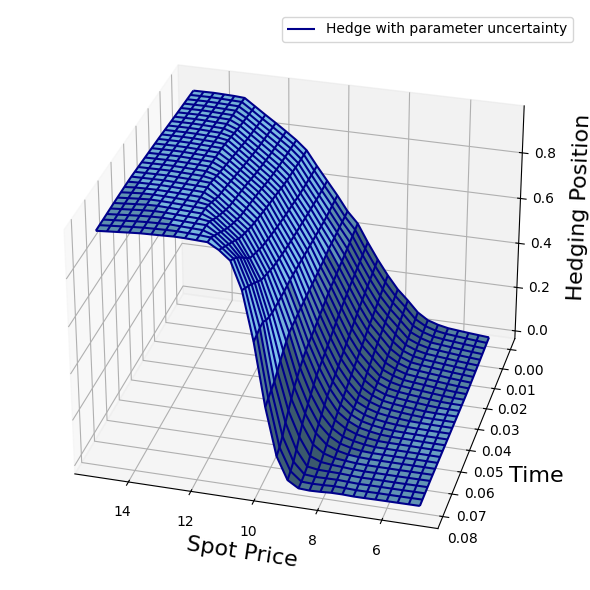

In [7]:
nr_discrete_points = 30 # Number of discrete points for the grid
# Create list of times and values
times = np.linspace(0,T,nr_discrete_points+1)[:-1]
values = np.linspace(x_0-x_0*0.5,x_0+x_0*0.5,nr_discrete_points)
# Empty grid
grid = np.zeros((nr_discrete_points,nr_discrete_points))
#grid_Delta_hedge = np.zeros((nr_discrete_points,nr_discrete_points))
# Fill the grid with the values of the trained hedge
for i in range(len(times)):
    for j in range(len(values)):
        grid[i,j] = hedge([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]
        #grid_Delta_hedge[i,j] = BS_Delta(0.5,0,values[j],T-times[i],x_0)

# 3D PLOT
X, Y = np.meshgrid(values, times)

style.use('default')
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax.plot_wireframe(X, Y , grid_Delta_hedge,color = "darkred",label = "Delta-Hedge")
ax.plot_surface(X, Y , grid,color = "lightskyblue")
ax.plot_wireframe(X, Y , grid,color = "darkblue",label = "Hedge with parameter uncertainty")

ax.view_init(30, 105)
ax.set_ylabel("Time", fontsize=16, labelpad=15)
ax.set_xlabel("Spot Price", fontsize=16)
ax.set_zlabel("Hedging Position", fontsize=16, labelpad=10)
plt.legend()
plt.tight_layout()
plt.savefig('eps/fig_3d_gamma_uncertain.eps', format='eps')
plt.show()


Save the model

In [8]:
hedge.save("model_gamma_uncertain.h5")

# Comparison with fix-model hedge

Specify the setting and compute the hedge

In [9]:
T = 30 / 365 # Maturity
n = 30 # Trading Dates
# Specify parameters as the mean of the respective intervals.
a_0_fix = [0.5,0.5]
a_1_fix = [0.5,0.5]
b_0_fix = [0,0]
b_1_fix = [0,0]
gamma_fix = [1,1]
x_0 = 10.
def derivative(path):
    return tf.nn.relu(path[-1]-x_0)

price_fix, hedge_fix = optimal_hedge(derivative,a_0_fix,a_1_fix,b_0_fix,b_1_fix,gamma_fix,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 10000,l_r = 0.005,BATCH_SIZE =256)

  0%|          | 11/10000 [00:12<3:40:49,  1.33s/it]

Iteration:10, Price of Hedge: 0.618064820766449, Loss: 0.15668988227844238


  0%|          | 21/10000 [00:23<2:42:48,  1.02it/s]

Iteration:20, Price of Hedge: 0.612765908241272, Loss: 0.15095727145671844


  0%|          | 31/10000 [00:35<3:35:01,  1.29s/it]

Iteration:30, Price of Hedge: 0.6151714324951172, Loss: 0.1433749496936798


  0%|          | 41/10000 [00:47<3:17:46,  1.19s/it]

Iteration:40, Price of Hedge: 0.6204848289489746, Loss: 0.12403672933578491


  1%|          | 51/10000 [00:57<2:45:55,  1.00s/it]

Iteration:50, Price of Hedge: 0.6225405931472778, Loss: 0.12352012097835541


  1%|          | 61/10000 [01:08<2:44:25,  1.01it/s]

Iteration:60, Price of Hedge: 0.6283025145530701, Loss: 0.13671821355819702


  1%|          | 71/10000 [01:18<3:00:13,  1.09s/it]

Iteration:70, Price of Hedge: 0.6321011185646057, Loss: 0.15211668610572815


  1%|          | 81/10000 [01:28<2:37:56,  1.05it/s]

Iteration:80, Price of Hedge: 0.6332524418830872, Loss: 0.10229730606079102


  1%|          | 91/10000 [01:39<2:51:32,  1.04s/it]

Iteration:90, Price of Hedge: 0.6296415328979492, Loss: 0.13976812362670898


  1%|          | 101/10000 [01:49<3:09:01,  1.15s/it]

Iteration:100, Price of Hedge: 0.6277048587799072, Loss: 0.12086069583892822


  1%|          | 111/10000 [01:59<2:25:45,  1.13it/s]

Iteration:110, Price of Hedge: 0.624225914478302, Loss: 0.10478895902633667


  1%|          | 121/10000 [02:11<3:15:31,  1.19s/it]

Iteration:120, Price of Hedge: 0.6250918507575989, Loss: 0.10412152111530304


  1%|▏         | 131/10000 [02:22<3:07:15,  1.14s/it]

Iteration:130, Price of Hedge: 0.6278132796287537, Loss: 0.07736386358737946


  1%|▏         | 141/10000 [02:34<3:00:16,  1.10s/it]

Iteration:140, Price of Hedge: 0.6326678395271301, Loss: 0.07455479353666306


  2%|▏         | 151/10000 [02:46<2:49:59,  1.04s/it]

Iteration:150, Price of Hedge: 0.6306633949279785, Loss: 0.05962947756052017


  2%|▏         | 161/10000 [02:56<2:44:31,  1.00s/it]

Iteration:160, Price of Hedge: 0.6261988282203674, Loss: 0.05602036789059639


  2%|▏         | 171/10000 [03:06<2:34:53,  1.06it/s]

Iteration:170, Price of Hedge: 0.6228410005569458, Loss: 0.04539131373167038


  2%|▏         | 181/10000 [03:17<2:52:25,  1.05s/it]

Iteration:180, Price of Hedge: 0.6294052600860596, Loss: 0.08137518912553787


  2%|▏         | 191/10000 [03:27<2:58:24,  1.09s/it]

Iteration:190, Price of Hedge: 0.6359201669692993, Loss: 0.03829080983996391


  2%|▏         | 201/10000 [03:37<2:37:25,  1.04it/s]

Iteration:200, Price of Hedge: 0.6353962421417236, Loss: 0.039613496512174606


  2%|▏         | 211/10000 [03:47<2:35:17,  1.05it/s]

Iteration:210, Price of Hedge: 0.63181072473526, Loss: 0.03681890293955803


  2%|▏         | 221/10000 [03:59<3:10:47,  1.17s/it]

Iteration:220, Price of Hedge: 0.6344751119613647, Loss: 0.03042307123541832


  2%|▏         | 231/10000 [04:09<2:55:40,  1.08s/it]

Iteration:230, Price of Hedge: 0.6312591433525085, Loss: 0.03347407281398773


  2%|▏         | 241/10000 [04:21<3:01:23,  1.12s/it]

Iteration:240, Price of Hedge: 0.6313496828079224, Loss: 0.03920774906873703


  3%|▎         | 251/10000 [04:32<3:05:06,  1.14s/it]

Iteration:250, Price of Hedge: 0.6346505880355835, Loss: 0.030186515301465988


  3%|▎         | 261/10000 [04:44<3:24:21,  1.26s/it]

Iteration:260, Price of Hedge: 0.6366117000579834, Loss: 0.06635737419128418


  3%|▎         | 271/10000 [04:55<2:29:38,  1.08it/s]

Iteration:270, Price of Hedge: 0.6348461508750916, Loss: 0.029063312336802483


  3%|▎         | 281/10000 [05:06<3:24:36,  1.26s/it]

Iteration:280, Price of Hedge: 0.631091833114624, Loss: 0.04066317155957222


  3%|▎         | 291/10000 [05:18<3:08:17,  1.16s/it]

Iteration:290, Price of Hedge: 0.6254454851150513, Loss: 0.04990707337856293


  3%|▎         | 301/10000 [05:27<2:34:25,  1.05it/s]

Iteration:300, Price of Hedge: 0.6226895451545715, Loss: 0.04648711904883385


  3%|▎         | 311/10000 [05:39<2:43:00,  1.01s/it]

Iteration:310, Price of Hedge: 0.625355064868927, Loss: 0.08617933094501495


  3%|▎         | 321/10000 [05:49<2:55:23,  1.09s/it]

Iteration:320, Price of Hedge: 0.6295792460441589, Loss: 0.049618564546108246


  3%|▎         | 331/10000 [05:59<2:38:40,  1.02it/s]

Iteration:330, Price of Hedge: 0.6310973167419434, Loss: 0.03452437371015549


  3%|▎         | 341/10000 [06:11<2:59:59,  1.12s/it]

Iteration:340, Price of Hedge: 0.6222896575927734, Loss: 0.04038463532924652


  4%|▎         | 351/10000 [06:22<3:21:41,  1.25s/it]

Iteration:350, Price of Hedge: 0.6269730925559998, Loss: 0.1052352711558342


  4%|▎         | 361/10000 [06:33<2:53:03,  1.08s/it]

Iteration:360, Price of Hedge: 0.6329664587974548, Loss: 0.03270173817873001


  4%|▎         | 371/10000 [06:45<2:57:58,  1.11s/it]

Iteration:370, Price of Hedge: 0.633451521396637, Loss: 0.040885210037231445


  4%|▍         | 381/10000 [06:56<2:40:47,  1.00s/it]

Iteration:380, Price of Hedge: 0.6259509921073914, Loss: 0.03318101167678833


  4%|▍         | 391/10000 [07:05<2:30:01,  1.07it/s]

Iteration:390, Price of Hedge: 0.6251542568206787, Loss: 0.036667533218860626


  4%|▍         | 401/10000 [07:16<2:45:11,  1.03s/it]

Iteration:400, Price of Hedge: 0.6264947056770325, Loss: 0.049694642424583435


  4%|▍         | 411/10000 [07:27<2:54:41,  1.09s/it]

Iteration:410, Price of Hedge: 0.6249197721481323, Loss: 0.08010460436344147


  4%|▍         | 421/10000 [07:37<2:29:27,  1.07it/s]

Iteration:420, Price of Hedge: 0.6298224329948425, Loss: 0.03175584226846695


  4%|▍         | 431/10000 [07:47<2:25:30,  1.10it/s]

Iteration:430, Price of Hedge: 0.6346035003662109, Loss: 0.0266738161444664


  4%|▍         | 441/10000 [07:58<3:15:42,  1.23s/it]

Iteration:440, Price of Hedge: 0.6318328380584717, Loss: 0.0561710000038147


  5%|▍         | 451/10000 [08:09<2:56:57,  1.11s/it]

Iteration:450, Price of Hedge: 0.6285088062286377, Loss: 0.04500836879014969


  5%|▍         | 461/10000 [08:20<2:44:56,  1.04s/it]

Iteration:460, Price of Hedge: 0.6316161155700684, Loss: 0.03151524439454079


  5%|▍         | 471/10000 [08:32<3:18:16,  1.25s/it]

Iteration:470, Price of Hedge: 0.6324208974838257, Loss: 0.04343812167644501


  5%|▍         | 481/10000 [08:45<3:35:37,  1.36s/it]

Iteration:480, Price of Hedge: 0.6263999342918396, Loss: 0.0403403602540493


  5%|▍         | 491/10000 [08:55<2:28:08,  1.07it/s]

Iteration:490, Price of Hedge: 0.6183570027351379, Loss: 0.040786262601614


  5%|▌         | 501/10000 [09:05<2:42:35,  1.03s/it]

Iteration:500, Price of Hedge: 0.6194848418235779, Loss: 0.06131017208099365


  5%|▌         | 511/10000 [09:16<3:02:17,  1.15s/it]

Iteration:510, Price of Hedge: 0.6242892742156982, Loss: 0.07902098447084427


  5%|▌         | 521/10000 [09:26<2:40:13,  1.01s/it]

Iteration:520, Price of Hedge: 0.6345043182373047, Loss: 0.06290034204721451


  5%|▌         | 531/10000 [09:36<2:38:47,  1.01s/it]

Iteration:530, Price of Hedge: 0.6251664757728577, Loss: 0.036464422941207886


  5%|▌         | 541/10000 [09:46<2:30:42,  1.05it/s]

Iteration:540, Price of Hedge: 0.6254111528396606, Loss: 0.0348539873957634


  6%|▌         | 551/10000 [09:57<2:41:29,  1.03s/it]

Iteration:550, Price of Hedge: 0.6306907534599304, Loss: 0.031012551859021187


  6%|▌         | 561/10000 [10:08<3:04:34,  1.17s/it]

Iteration:560, Price of Hedge: 0.6346948742866516, Loss: 0.04296622797846794


  6%|▌         | 571/10000 [10:19<2:56:10,  1.12s/it]

Iteration:570, Price of Hedge: 0.632423460483551, Loss: 0.03218088299036026


  6%|▌         | 581/10000 [10:31<3:16:58,  1.25s/it]

Iteration:580, Price of Hedge: 0.624235987663269, Loss: 0.02825412154197693


  6%|▌         | 591/10000 [10:43<3:25:04,  1.31s/it]

Iteration:590, Price of Hedge: 0.6255478262901306, Loss: 0.05841450393199921


  6%|▌         | 601/10000 [10:54<2:59:40,  1.15s/it]

Iteration:600, Price of Hedge: 0.6319328546524048, Loss: 0.04199531674385071


  6%|▌         | 611/10000 [11:04<2:22:18,  1.10it/s]

Iteration:610, Price of Hedge: 0.6304528117179871, Loss: 0.17086161673069


  6%|▌         | 621/10000 [11:14<2:22:54,  1.09it/s]

Iteration:620, Price of Hedge: 0.6421618461608887, Loss: 0.06627999246120453


  6%|▋         | 631/10000 [11:26<3:11:02,  1.22s/it]

Iteration:630, Price of Hedge: 0.6324264407157898, Loss: 0.044379159808158875


  6%|▋         | 641/10000 [11:36<2:35:03,  1.01it/s]

Iteration:640, Price of Hedge: 0.6256712675094604, Loss: 0.04746619984507561


  7%|▋         | 651/10000 [11:46<2:27:21,  1.06it/s]

Iteration:650, Price of Hedge: 0.6283906698226929, Loss: 0.07894313335418701


  7%|▋         | 661/10000 [11:58<3:14:41,  1.25s/it]

Iteration:660, Price of Hedge: 0.6290580034255981, Loss: 0.05544016882777214


  7%|▋         | 671/10000 [12:08<3:02:03,  1.17s/it]

Iteration:670, Price of Hedge: 0.6222571134567261, Loss: 0.07109395414590836


  7%|▋         | 681/10000 [12:19<2:48:38,  1.09s/it]

Iteration:680, Price of Hedge: 0.6237998604774475, Loss: 0.03282371535897255


  7%|▋         | 691/10000 [12:31<3:21:52,  1.30s/it]

Iteration:690, Price of Hedge: 0.6308921575546265, Loss: 0.03189151734113693


  7%|▋         | 701/10000 [12:43<3:22:27,  1.31s/it]

Iteration:700, Price of Hedge: 0.6287133097648621, Loss: 0.031493064016103745


  7%|▋         | 711/10000 [12:53<2:25:47,  1.06it/s]

Iteration:710, Price of Hedge: 0.6280494928359985, Loss: 0.031784266233444214


  7%|▋         | 721/10000 [13:05<3:00:48,  1.17s/it]

Iteration:720, Price of Hedge: 0.6287148594856262, Loss: 0.028010264039039612


  7%|▋         | 731/10000 [13:15<3:01:26,  1.17s/it]

Iteration:730, Price of Hedge: 0.6262684464454651, Loss: 0.024281470105051994


  7%|▋         | 741/10000 [13:25<2:18:49,  1.11it/s]

Iteration:740, Price of Hedge: 0.6301437616348267, Loss: 0.032513901591300964


  8%|▊         | 751/10000 [13:37<2:56:39,  1.15s/it]

Iteration:750, Price of Hedge: 0.6278727054595947, Loss: 0.04546234756708145


  8%|▊         | 761/10000 [13:47<2:54:24,  1.13s/it]

Iteration:760, Price of Hedge: 0.6245490312576294, Loss: 0.07456623762845993


  8%|▊         | 771/10000 [13:57<2:20:45,  1.09it/s]

Iteration:770, Price of Hedge: 0.6260164976119995, Loss: 0.02696201205253601


  8%|▊         | 781/10000 [14:08<3:08:36,  1.23s/it]

Iteration:780, Price of Hedge: 0.628416895866394, Loss: 0.021894201636314392


  8%|▊         | 791/10000 [14:19<2:54:52,  1.14s/it]

Iteration:790, Price of Hedge: 0.6304498314857483, Loss: 0.038521040230989456


  8%|▊         | 801/10000 [14:30<2:54:22,  1.14s/it]

Iteration:800, Price of Hedge: 0.6255993843078613, Loss: 0.023616179823875427


  8%|▊         | 811/10000 [14:43<3:00:00,  1.18s/it]

Iteration:810, Price of Hedge: 0.6308423280715942, Loss: 0.025470685213804245


  8%|▊         | 821/10000 [14:54<3:00:55,  1.18s/it]

Iteration:820, Price of Hedge: 0.6273887753486633, Loss: 0.033142056316137314


  8%|▊         | 831/10000 [15:05<2:33:36,  1.01s/it]

Iteration:830, Price of Hedge: 0.6293145418167114, Loss: 0.02268393337726593


  8%|▊         | 841/10000 [15:15<2:18:20,  1.10it/s]

Iteration:840, Price of Hedge: 0.6260235905647278, Loss: 0.027220480144023895


  9%|▊         | 851/10000 [15:26<3:07:10,  1.23s/it]

Iteration:850, Price of Hedge: 0.6245884895324707, Loss: 0.03165094181895256


  9%|▊         | 861/10000 [15:36<2:47:04,  1.10s/it]

Iteration:860, Price of Hedge: 0.6249553561210632, Loss: 0.028956927359104156


  9%|▊         | 871/10000 [15:47<2:24:48,  1.05it/s]

Iteration:870, Price of Hedge: 0.628241240978241, Loss: 0.023275509476661682


  9%|▉         | 881/10000 [15:57<2:50:57,  1.12s/it]

Iteration:880, Price of Hedge: 0.6249998211860657, Loss: 0.02211279794573784


  9%|▉         | 891/10000 [16:07<2:39:58,  1.05s/it]

Iteration:890, Price of Hedge: 0.6213994026184082, Loss: 0.02118559181690216


  9%|▉         | 901/10000 [16:19<2:34:01,  1.02s/it]

Iteration:900, Price of Hedge: 0.6296913027763367, Loss: 0.02644636482000351


  9%|▉         | 911/10000 [16:31<3:18:23,  1.31s/it]

Iteration:910, Price of Hedge: 0.6304253339767456, Loss: 0.02479289472103119


  9%|▉         | 921/10000 [16:42<3:07:16,  1.24s/it]

Iteration:920, Price of Hedge: 0.6268476843833923, Loss: 0.02785160206258297


  9%|▉         | 931/10000 [16:54<2:25:54,  1.04it/s]

Iteration:930, Price of Hedge: 0.6222649216651917, Loss: 0.02050662599503994


  9%|▉         | 941/10000 [17:05<2:54:42,  1.16s/it]

Iteration:940, Price of Hedge: 0.6291244626045227, Loss: 0.018333788961172104


 10%|▉         | 951/10000 [17:16<3:04:11,  1.22s/it]

Iteration:950, Price of Hedge: 0.6279332041740417, Loss: 0.02808557078242302


 10%|▉         | 961/10000 [17:26<2:24:34,  1.04it/s]

Iteration:960, Price of Hedge: 0.6272011995315552, Loss: 0.022777311503887177


 10%|▉         | 971/10000 [17:37<2:39:17,  1.06s/it]

Iteration:970, Price of Hedge: 0.6339476704597473, Loss: 0.02380673587322235


 10%|▉         | 981/10000 [17:47<2:45:57,  1.10s/it]

Iteration:980, Price of Hedge: 0.630648672580719, Loss: 0.02178926020860672


 10%|▉         | 991/10000 [17:57<2:33:22,  1.02s/it]

Iteration:990, Price of Hedge: 0.6261752843856812, Loss: 0.019477974623441696


 10%|█         | 1001/10000 [18:08<2:45:47,  1.11s/it]

Iteration:1000, Price of Hedge: 0.6303749084472656, Loss: 0.022620100528001785


 10%|█         | 1011/10000 [18:20<3:05:41,  1.24s/it]

Iteration:1010, Price of Hedge: 0.6321842074394226, Loss: 0.026171334087848663


 10%|█         | 1021/10000 [18:30<2:24:00,  1.04it/s]

Iteration:1020, Price of Hedge: 0.6234791278839111, Loss: 0.017742423340678215


 10%|█         | 1031/10000 [18:42<2:41:26,  1.08s/it]

Iteration:1030, Price of Hedge: 0.6259719133377075, Loss: 0.017478350549936295


 10%|█         | 1041/10000 [18:54<3:09:00,  1.27s/it]

Iteration:1040, Price of Hedge: 0.6264482736587524, Loss: 0.035531770437955856


 11%|█         | 1051/10000 [19:04<2:31:31,  1.02s/it]

Iteration:1050, Price of Hedge: 0.618914783000946, Loss: 0.01985159143805504


 11%|█         | 1061/10000 [19:14<2:15:37,  1.10it/s]

Iteration:1060, Price of Hedge: 0.6213366985321045, Loss: 0.025401951745152473


 11%|█         | 1071/10000 [19:25<3:01:06,  1.22s/it]

Iteration:1070, Price of Hedge: 0.6338438987731934, Loss: 0.021646222099661827


 11%|█         | 1081/10000 [19:36<2:44:32,  1.11s/it]

Iteration:1080, Price of Hedge: 0.6379187703132629, Loss: 0.048683661967515945


 11%|█         | 1091/10000 [19:46<2:22:10,  1.04it/s]

Iteration:1090, Price of Hedge: 0.6259458065032959, Loss: 0.036208413541316986


 11%|█         | 1101/10000 [19:57<2:53:48,  1.17s/it]

Iteration:1100, Price of Hedge: 0.6277967095375061, Loss: 0.021426336839795113


 11%|█         | 1111/10000 [20:07<2:36:54,  1.06s/it]

Iteration:1110, Price of Hedge: 0.6320760250091553, Loss: 0.019288048148155212


 11%|█         | 1121/10000 [20:19<2:39:30,  1.08s/it]

Iteration:1120, Price of Hedge: 0.6266009211540222, Loss: 0.02243359014391899


 11%|█▏        | 1131/10000 [20:30<3:07:56,  1.27s/it]

Iteration:1130, Price of Hedge: 0.6330323815345764, Loss: 0.01705751195549965


 11%|█▏        | 1141/10000 [20:41<2:59:42,  1.22s/it]

Iteration:1140, Price of Hedge: 0.6272736191749573, Loss: 0.02477181702852249


 12%|█▏        | 1151/10000 [20:53<2:23:04,  1.03it/s]

Iteration:1150, Price of Hedge: 0.6287292838096619, Loss: 0.021820727735757828


 12%|█▏        | 1161/10000 [21:04<2:45:22,  1.12s/it]

Iteration:1160, Price of Hedge: 0.6320986151695251, Loss: 0.021610315889120102


 12%|█▏        | 1171/10000 [21:14<2:40:18,  1.09s/it]

Iteration:1170, Price of Hedge: 0.6302651166915894, Loss: 0.028965681791305542


 12%|█▏        | 1181/10000 [21:24<2:19:06,  1.06it/s]

Iteration:1180, Price of Hedge: 0.6287545561790466, Loss: 0.023537028580904007


 12%|█▏        | 1191/10000 [21:35<2:45:16,  1.13s/it]

Iteration:1190, Price of Hedge: 0.6278402805328369, Loss: 0.018470920622348785


 12%|█▏        | 1201/10000 [21:45<2:27:55,  1.01s/it]

Iteration:1200, Price of Hedge: 0.6319578289985657, Loss: 0.01855172961950302


 12%|█▏        | 1211/10000 [21:56<2:25:34,  1.01it/s]

Iteration:1210, Price of Hedge: 0.631037712097168, Loss: 0.01816241443157196


 12%|█▏        | 1221/10000 [22:06<2:36:17,  1.07s/it]

Iteration:1220, Price of Hedge: 0.6245236992835999, Loss: 0.019152577966451645


 12%|█▏        | 1231/10000 [22:18<2:44:15,  1.12s/it]

Iteration:1230, Price of Hedge: 0.6268182992935181, Loss: 0.019761595875024796


 12%|█▏        | 1241/10000 [22:28<2:18:04,  1.06it/s]

Iteration:1240, Price of Hedge: 0.6264106035232544, Loss: 0.02033936232328415


 13%|█▎        | 1251/10000 [22:41<3:04:39,  1.27s/it]

Iteration:1250, Price of Hedge: 0.6253876090049744, Loss: 0.015897102653980255


 13%|█▎        | 1261/10000 [22:53<3:11:11,  1.31s/it]

Iteration:1260, Price of Hedge: 0.6235665082931519, Loss: 0.0162615105509758


 13%|█▎        | 1271/10000 [23:03<2:29:47,  1.03s/it]

Iteration:1270, Price of Hedge: 0.6274120807647705, Loss: 0.018983714282512665


 13%|█▎        | 1281/10000 [23:13<2:16:44,  1.06it/s]

Iteration:1280, Price of Hedge: 0.6305485963821411, Loss: 0.02002117782831192


 13%|█▎        | 1291/10000 [23:24<2:39:58,  1.10s/it]

Iteration:1290, Price of Hedge: 0.6251847743988037, Loss: 0.01879488117992878


 13%|█▎        | 1301/10000 [23:34<2:34:10,  1.06s/it]

Iteration:1300, Price of Hedge: 0.6255855560302734, Loss: 0.02161957323551178


 13%|█▎        | 1311/10000 [23:45<2:28:48,  1.03s/it]

Iteration:1310, Price of Hedge: 0.6271889805793762, Loss: 0.02019602432847023


 13%|█▎        | 1321/10000 [23:55<2:28:02,  1.02s/it]

Iteration:1320, Price of Hedge: 0.6277715563774109, Loss: 0.02019510045647621


 13%|█▎        | 1331/10000 [24:05<2:24:14,  1.00it/s]

Iteration:1330, Price of Hedge: 0.631598949432373, Loss: 0.02747645415365696


 13%|█▎        | 1341/10000 [24:17<2:36:20,  1.08s/it]

Iteration:1340, Price of Hedge: 0.6237265467643738, Loss: 0.024079974740743637


 14%|█▎        | 1351/10000 [24:27<2:42:45,  1.13s/it]

Iteration:1350, Price of Hedge: 0.629109263420105, Loss: 0.025636933743953705


 14%|█▎        | 1361/10000 [24:39<2:33:58,  1.07s/it]

Iteration:1360, Price of Hedge: 0.628355860710144, Loss: 0.01879158243536949


 14%|█▎        | 1371/10000 [24:52<2:39:29,  1.11s/it]

Iteration:1370, Price of Hedge: 0.6249487996101379, Loss: 0.019409988075494766


 14%|█▍        | 1381/10000 [25:02<2:36:32,  1.09s/it]

Iteration:1380, Price of Hedge: 0.624071478843689, Loss: 0.01776799187064171


 14%|█▍        | 1391/10000 [25:12<2:29:44,  1.04s/it]

Iteration:1390, Price of Hedge: 0.6337835192680359, Loss: 0.02260611765086651


 14%|█▍        | 1401/10000 [25:23<2:18:49,  1.03it/s]

Iteration:1400, Price of Hedge: 0.6338116526603699, Loss: 0.0167667455971241


 14%|█▍        | 1411/10000 [25:34<2:40:03,  1.12s/it]

Iteration:1410, Price of Hedge: 0.6285344362258911, Loss: 0.019434800371527672


 14%|█▍        | 1421/10000 [25:44<2:23:14,  1.00s/it]

Iteration:1420, Price of Hedge: 0.6254801154136658, Loss: 0.019254883751273155


 14%|█▍        | 1431/10000 [25:54<2:18:29,  1.03it/s]

Iteration:1430, Price of Hedge: 0.6310638189315796, Loss: 0.018345607444643974


 14%|█▍        | 1441/10000 [26:05<2:40:43,  1.13s/it]

Iteration:1440, Price of Hedge: 0.6304832696914673, Loss: 0.022869516164064407


 15%|█▍        | 1451/10000 [26:16<2:37:02,  1.10s/it]

Iteration:1450, Price of Hedge: 0.6237616539001465, Loss: 0.02148558385670185


 15%|█▍        | 1461/10000 [26:27<2:11:17,  1.08it/s]

Iteration:1460, Price of Hedge: 0.6259846091270447, Loss: 0.015787264332175255


 15%|█▍        | 1471/10000 [26:39<3:01:52,  1.28s/it]

Iteration:1470, Price of Hedge: 0.6274856925010681, Loss: 0.02232230454683304


 15%|█▍        | 1481/10000 [26:51<3:10:36,  1.34s/it]

Iteration:1480, Price of Hedge: 0.6284927129745483, Loss: 0.018346033990383148


 15%|█▍        | 1491/10000 [27:01<2:12:13,  1.07it/s]

Iteration:1490, Price of Hedge: 0.6257467865943909, Loss: 0.01669786311686039


 15%|█▌        | 1501/10000 [27:12<2:36:40,  1.11s/it]

Iteration:1500, Price of Hedge: 0.6337705850601196, Loss: 0.018401354551315308


 15%|█▌        | 1511/10000 [27:22<2:25:35,  1.03s/it]

Iteration:1510, Price of Hedge: 0.6308597326278687, Loss: 0.02235744334757328


 15%|█▌        | 1521/10000 [27:32<2:17:21,  1.03it/s]

Iteration:1520, Price of Hedge: 0.6274622678756714, Loss: 0.02293563447892666


 15%|█▌        | 1531/10000 [27:43<2:27:01,  1.04s/it]

Iteration:1530, Price of Hedge: 0.6227024793624878, Loss: 0.01889820769429207


 15%|█▌        | 1541/10000 [27:52<2:05:34,  1.12it/s]

Iteration:1540, Price of Hedge: 0.6249967217445374, Loss: 0.022896023467183113


 16%|█▌        | 1551/10000 [28:04<2:38:07,  1.12s/it]

Iteration:1550, Price of Hedge: 0.6341885328292847, Loss: 0.028879154473543167


 16%|█▌        | 1561/10000 [28:15<2:46:24,  1.18s/it]

Iteration:1560, Price of Hedge: 0.6262872815132141, Loss: 0.021160082891583443


 16%|█▌        | 1571/10000 [28:25<2:23:43,  1.02s/it]

Iteration:1570, Price of Hedge: 0.6237512230873108, Loss: 0.01702553778886795


 16%|█▌        | 1581/10000 [28:37<2:41:56,  1.15s/it]

Iteration:1580, Price of Hedge: 0.6266112327575684, Loss: 0.017255745828151703


 16%|█▌        | 1591/10000 [28:50<3:00:13,  1.29s/it]

Iteration:1590, Price of Hedge: 0.6359224915504456, Loss: 0.015361690893769264


 16%|█▌        | 1601/10000 [29:00<2:32:53,  1.09s/it]

Iteration:1600, Price of Hedge: 0.6252866387367249, Loss: 0.019814997911453247


 16%|█▌        | 1611/10000 [29:10<2:12:37,  1.05it/s]

Iteration:1610, Price of Hedge: 0.6234362125396729, Loss: 0.04564284533262253


 16%|█▌        | 1621/10000 [29:22<2:30:42,  1.08s/it]

Iteration:1620, Price of Hedge: 0.6287533640861511, Loss: 0.024863779544830322


 16%|█▋        | 1631/10000 [29:32<2:37:29,  1.13s/it]

Iteration:1630, Price of Hedge: 0.6282968521118164, Loss: 0.026411034166812897


 16%|█▋        | 1641/10000 [29:42<2:05:38,  1.11it/s]

Iteration:1640, Price of Hedge: 0.6243224143981934, Loss: 0.018219631165266037


 17%|█▋        | 1651/10000 [29:53<2:36:15,  1.12s/it]

Iteration:1650, Price of Hedge: 0.627276599407196, Loss: 0.018420971930027008


 17%|█▋        | 1661/10000 [30:03<2:43:47,  1.18s/it]

Iteration:1660, Price of Hedge: 0.6356518268585205, Loss: 0.020931154489517212


 17%|█▋        | 1671/10000 [30:14<2:33:32,  1.11s/it]

Iteration:1670, Price of Hedge: 0.6277003288269043, Loss: 0.016758590936660767


 17%|█▋        | 1681/10000 [30:26<2:25:37,  1.05s/it]

Iteration:1680, Price of Hedge: 0.6197047233581543, Loss: 0.020579498261213303


 17%|█▋        | 1691/10000 [30:37<2:55:10,  1.26s/it]

Iteration:1690, Price of Hedge: 0.6295447945594788, Loss: 0.01722235418856144


 17%|█▋        | 1701/10000 [30:49<2:34:34,  1.12s/it]

Iteration:1700, Price of Hedge: 0.638641357421875, Loss: 0.021472863852977753


 17%|█▋        | 1711/10000 [31:00<2:29:42,  1.08s/it]

Iteration:1710, Price of Hedge: 0.6260312795639038, Loss: 0.018949776887893677


 17%|█▋        | 1721/10000 [31:11<2:37:51,  1.14s/it]

Iteration:1720, Price of Hedge: 0.6226915717124939, Loss: 0.0264129675924778


 17%|█▋        | 1731/10000 [31:20<2:14:33,  1.02it/s]

Iteration:1730, Price of Hedge: 0.6304550766944885, Loss: 0.024668116122484207


 17%|█▋        | 1741/10000 [31:31<2:04:33,  1.11it/s]

Iteration:1740, Price of Hedge: 0.623798131942749, Loss: 0.019985023885965347


 18%|█▊        | 1751/10000 [31:42<2:47:38,  1.22s/it]

Iteration:1750, Price of Hedge: 0.6266518831253052, Loss: 0.019550135359168053


 18%|█▊        | 1761/10000 [31:52<2:27:31,  1.07s/it]

Iteration:1760, Price of Hedge: 0.6369474530220032, Loss: 0.02122366428375244


 18%|█▊        | 1771/10000 [32:02<2:08:38,  1.07it/s]

Iteration:1770, Price of Hedge: 0.6300559043884277, Loss: 0.018406758084893227


 18%|█▊        | 1781/10000 [32:14<3:04:52,  1.35s/it]

Iteration:1780, Price of Hedge: 0.6272333264350891, Loss: 0.016976259648799896


 18%|█▊        | 1791/10000 [32:24<2:10:48,  1.05it/s]

Iteration:1790, Price of Hedge: 0.6312819123268127, Loss: 0.019213659688830376


 18%|█▊        | 1801/10000 [32:36<2:44:09,  1.20s/it]

Iteration:1800, Price of Hedge: 0.6343749761581421, Loss: 0.01825788803398609


 18%|█▊        | 1811/10000 [32:51<3:21:29,  1.48s/it]

Iteration:1810, Price of Hedge: 0.6233536601066589, Loss: 0.022789742797613144


 18%|█▊        | 1821/10000 [33:02<2:35:08,  1.14s/it]

Iteration:1820, Price of Hedge: 0.6293637752532959, Loss: 0.02113478071987629


 18%|█▊        | 1831/10000 [33:11<2:09:30,  1.05it/s]

Iteration:1830, Price of Hedge: 0.6338397264480591, Loss: 0.016953278332948685


 18%|█▊        | 1841/10000 [33:23<2:17:51,  1.01s/it]

Iteration:1840, Price of Hedge: 0.6265769004821777, Loss: 0.017159605398774147


 19%|█▊        | 1851/10000 [33:33<2:27:37,  1.09s/it]

Iteration:1850, Price of Hedge: 0.6290538907051086, Loss: 0.021550945937633514


 19%|█▊        | 1861/10000 [33:43<2:18:11,  1.02s/it]

Iteration:1860, Price of Hedge: 0.6340797543525696, Loss: 0.025650005787611008


 19%|█▊        | 1871/10000 [33:55<2:21:37,  1.05s/it]

Iteration:1870, Price of Hedge: 0.6286640763282776, Loss: 0.019628815352916718


 19%|█▉        | 1881/10000 [34:07<3:01:19,  1.34s/it]

Iteration:1880, Price of Hedge: 0.6273661851882935, Loss: 0.018899383023381233


 19%|█▉        | 1891/10000 [34:20<3:23:23,  1.50s/it]

Iteration:1890, Price of Hedge: 0.62619549036026, Loss: 0.018401576206088066


 19%|█▉        | 1901/10000 [34:32<2:25:43,  1.08s/it]

Iteration:1900, Price of Hedge: 0.6216193437576294, Loss: 0.02079065516591072


 19%|█▉        | 1911/10000 [34:46<2:59:56,  1.33s/it]

Iteration:1910, Price of Hedge: 0.6328268051147461, Loss: 0.026555104181170464


 19%|█▉        | 1921/10000 [34:58<2:17:37,  1.02s/it]

Iteration:1920, Price of Hedge: 0.6317643523216248, Loss: 0.030310627073049545


 19%|█▉        | 1931/10000 [35:09<2:50:36,  1.27s/it]

Iteration:1930, Price of Hedge: 0.6275901198387146, Loss: 0.02054383046925068


 19%|█▉        | 1941/10000 [35:20<2:34:12,  1.15s/it]

Iteration:1940, Price of Hedge: 0.6398179531097412, Loss: 0.017142290249466896


 20%|█▉        | 1951/10000 [35:31<2:09:41,  1.03it/s]

Iteration:1950, Price of Hedge: 0.6216320395469666, Loss: 0.018477674573659897


 20%|█▉        | 1961/10000 [35:43<2:51:29,  1.28s/it]

Iteration:1960, Price of Hedge: 0.6325815916061401, Loss: 0.020945079624652863


 20%|█▉        | 1971/10000 [35:52<2:08:30,  1.04it/s]

Iteration:1970, Price of Hedge: 0.6397383809089661, Loss: 0.02190173789858818


 20%|█▉        | 1981/10000 [36:03<2:00:57,  1.10it/s]

Iteration:1980, Price of Hedge: 0.6281826496124268, Loss: 0.017809748649597168


 20%|█▉        | 1991/10000 [36:17<3:12:03,  1.44s/it]

Iteration:1990, Price of Hedge: 0.6195880770683289, Loss: 0.017939649522304535


 20%|██        | 2001/10000 [36:29<2:47:42,  1.26s/it]

Iteration:2000, Price of Hedge: 0.6364321112632751, Loss: 0.021627286449074745


 20%|██        | 2011/10000 [36:42<3:11:59,  1.44s/it]

Iteration:2010, Price of Hedge: 0.6322188377380371, Loss: 0.016933560371398926


 20%|██        | 2021/10000 [36:55<2:46:41,  1.25s/it]

Iteration:2020, Price of Hedge: 0.6211735010147095, Loss: 0.01738744229078293


 20%|██        | 2031/10000 [37:06<2:05:42,  1.06it/s]

Iteration:2030, Price of Hedge: 0.6258090138435364, Loss: 0.018354259431362152


 20%|██        | 2041/10000 [37:17<2:41:55,  1.22s/it]

Iteration:2040, Price of Hedge: 0.6303781867027283, Loss: 0.015893664211034775


 21%|██        | 2051/10000 [37:27<2:17:36,  1.04s/it]

Iteration:2050, Price of Hedge: 0.6280809640884399, Loss: 0.01945691928267479


 21%|██        | 2061/10000 [37:38<2:07:16,  1.04it/s]

Iteration:2060, Price of Hedge: 0.6260271072387695, Loss: 0.01935577020049095


 21%|██        | 2071/10000 [37:48<2:33:41,  1.16s/it]

Iteration:2070, Price of Hedge: 0.6305017471313477, Loss: 0.01783333532512188


 21%|██        | 2081/10000 [37:59<2:24:44,  1.10s/it]

Iteration:2080, Price of Hedge: 0.6312729716300964, Loss: 0.018161684274673462


 21%|██        | 2091/10000 [38:09<2:10:01,  1.01it/s]

Iteration:2090, Price of Hedge: 0.6272144317626953, Loss: 0.020588628947734833


 21%|██        | 2101/10000 [38:22<3:00:36,  1.37s/it]

Iteration:2100, Price of Hedge: 0.6309701800346375, Loss: 0.01619429513812065


 21%|██        | 2111/10000 [38:32<2:15:45,  1.03s/it]

Iteration:2110, Price of Hedge: 0.6295764446258545, Loss: 0.017886992543935776


 21%|██        | 2121/10000 [38:43<2:39:44,  1.22s/it]

Iteration:2120, Price of Hedge: 0.6305062174797058, Loss: 0.01735444739460945


 21%|██▏       | 2131/10000 [38:56<2:46:56,  1.27s/it]

Iteration:2130, Price of Hedge: 0.6227845549583435, Loss: 0.02122177928686142


 21%|██▏       | 2141/10000 [39:06<2:25:08,  1.11s/it]

Iteration:2140, Price of Hedge: 0.6320788264274597, Loss: 0.017907720059156418


 22%|██▏       | 2151/10000 [39:16<2:05:28,  1.04it/s]

Iteration:2150, Price of Hedge: 0.6343772411346436, Loss: 0.03897130489349365


 22%|██▏       | 2161/10000 [39:27<2:39:01,  1.22s/it]

Iteration:2160, Price of Hedge: 0.6253799200057983, Loss: 0.01593651995062828


 22%|██▏       | 2171/10000 [39:39<2:39:35,  1.22s/it]

Iteration:2170, Price of Hedge: 0.6343884468078613, Loss: 0.017389759421348572


 22%|██▏       | 2181/10000 [39:50<2:24:00,  1.11s/it]

Iteration:2180, Price of Hedge: 0.6345470547676086, Loss: 0.01629038155078888


 22%|██▏       | 2191/10000 [40:01<2:06:39,  1.03it/s]

Iteration:2190, Price of Hedge: 0.6278477907180786, Loss: 0.01531300414353609


 22%|██▏       | 2201/10000 [40:11<2:21:56,  1.09s/it]

Iteration:2200, Price of Hedge: 0.6244489550590515, Loss: 0.013648447580635548


 22%|██▏       | 2211/10000 [40:23<2:18:52,  1.07s/it]

Iteration:2210, Price of Hedge: 0.6275293231010437, Loss: 0.01708626002073288


 22%|██▏       | 2221/10000 [40:33<2:04:15,  1.04it/s]

Iteration:2220, Price of Hedge: 0.6317877769470215, Loss: 0.016325462609529495


 22%|██▏       | 2231/10000 [40:46<2:57:32,  1.37s/it]

Iteration:2230, Price of Hedge: 0.6286295652389526, Loss: 0.017628025263547897


 22%|██▏       | 2241/10000 [40:58<2:54:54,  1.35s/it]

Iteration:2240, Price of Hedge: 0.6254760026931763, Loss: 0.018510080873966217


 23%|██▎       | 2251/10000 [41:09<1:59:20,  1.08it/s]

Iteration:2250, Price of Hedge: 0.6274937391281128, Loss: 0.01893456280231476


 23%|██▎       | 2261/10000 [41:20<2:26:27,  1.14s/it]

Iteration:2260, Price of Hedge: 0.6238085031509399, Loss: 0.018712405115365982


 23%|██▎       | 2271/10000 [41:29<2:19:41,  1.08s/it]

Iteration:2270, Price of Hedge: 0.6336122155189514, Loss: 0.021911511197686195


 23%|██▎       | 2281/10000 [41:40<1:59:42,  1.07it/s]

Iteration:2280, Price of Hedge: 0.6336897015571594, Loss: 0.018419908359646797


 23%|██▎       | 2291/10000 [41:51<2:21:41,  1.10s/it]

Iteration:2290, Price of Hedge: 0.6322028636932373, Loss: 0.014926991425454617


 23%|██▎       | 2301/10000 [42:00<2:08:43,  1.00s/it]

Iteration:2300, Price of Hedge: 0.6310160756111145, Loss: 0.022813215851783752


 23%|██▎       | 2311/10000 [42:11<2:08:09,  1.00s/it]

Iteration:2310, Price of Hedge: 0.6233949661254883, Loss: 0.023406825959682465


 23%|██▎       | 2321/10000 [42:24<2:33:38,  1.20s/it]

Iteration:2320, Price of Hedge: 0.6280491948127747, Loss: 0.021130695939064026


 23%|██▎       | 2331/10000 [42:33<2:06:59,  1.01it/s]

Iteration:2330, Price of Hedge: 0.6281359195709229, Loss: 0.02084955945611


 23%|██▎       | 2341/10000 [42:45<2:31:22,  1.19s/it]

Iteration:2340, Price of Hedge: 0.6304529905319214, Loss: 0.024808820337057114


 24%|██▎       | 2351/10000 [42:58<2:40:14,  1.26s/it]

Iteration:2350, Price of Hedge: 0.6274245977401733, Loss: 0.014869023114442825


 24%|██▎       | 2361/10000 [43:08<2:29:09,  1.17s/it]

Iteration:2360, Price of Hedge: 0.6348352432250977, Loss: 0.015288455411791801


 24%|██▎       | 2371/10000 [43:18<1:57:26,  1.08it/s]

Iteration:2370, Price of Hedge: 0.6290324926376343, Loss: 0.017064234241843224


 24%|██▍       | 2381/10000 [43:29<2:17:58,  1.09s/it]

Iteration:2380, Price of Hedge: 0.6234262585639954, Loss: 0.01679828390479088


 24%|██▍       | 2391/10000 [43:39<2:21:40,  1.12s/it]

Iteration:2390, Price of Hedge: 0.6300243139266968, Loss: 0.015538245439529419


 24%|██▍       | 2401/10000 [43:49<2:08:31,  1.01s/it]

Iteration:2400, Price of Hedge: 0.630064070224762, Loss: 0.020195063203573227


 24%|██▍       | 2411/10000 [44:01<2:24:35,  1.14s/it]

Iteration:2410, Price of Hedge: 0.6234235763549805, Loss: 0.01690172404050827


 24%|██▍       | 2421/10000 [44:11<2:29:22,  1.18s/it]

Iteration:2420, Price of Hedge: 0.6328490376472473, Loss: 0.01572604477405548


 24%|██▍       | 2431/10000 [44:23<2:27:41,  1.17s/it]

Iteration:2430, Price of Hedge: 0.6324763298034668, Loss: 0.014428520575165749


 24%|██▍       | 2441/10000 [44:33<2:02:44,  1.03it/s]

Iteration:2440, Price of Hedge: 0.6247692108154297, Loss: 0.015135373920202255


 25%|██▍       | 2451/10000 [44:46<3:01:22,  1.44s/it]

Iteration:2450, Price of Hedge: 0.6221280694007874, Loss: 0.017360415309667587


 25%|██▍       | 2461/10000 [44:57<2:17:58,  1.10s/it]

Iteration:2460, Price of Hedge: 0.6275115013122559, Loss: 0.016250917688012123


 25%|██▍       | 2471/10000 [45:08<2:09:32,  1.03s/it]

Iteration:2470, Price of Hedge: 0.6317290663719177, Loss: 0.017028480768203735


 25%|██▍       | 2481/10000 [45:19<2:25:19,  1.16s/it]

Iteration:2480, Price of Hedge: 0.6296380758285522, Loss: 0.016082672402262688


 25%|██▍       | 2491/10000 [45:29<2:15:41,  1.08s/it]

Iteration:2490, Price of Hedge: 0.6234331130981445, Loss: 0.017937997356057167


 25%|██▌       | 2501/10000 [45:40<1:58:01,  1.06it/s]

Iteration:2500, Price of Hedge: 0.6270031332969666, Loss: 0.015447447076439857


 25%|██▌       | 2511/10000 [45:50<2:22:40,  1.14s/it]

Iteration:2510, Price of Hedge: 0.6277322173118591, Loss: 0.018939299508929253


 25%|██▌       | 2521/10000 [46:00<2:09:23,  1.04s/it]

Iteration:2520, Price of Hedge: 0.6232160329818726, Loss: 0.021044062450528145


 25%|██▌       | 2531/10000 [46:11<2:02:22,  1.02it/s]

Iteration:2530, Price of Hedge: 0.6269623041152954, Loss: 0.027632711455225945


 25%|██▌       | 2541/10000 [46:23<2:35:05,  1.25s/it]

Iteration:2540, Price of Hedge: 0.6279978156089783, Loss: 0.033257611095905304


 26%|██▌       | 2551/10000 [46:33<2:11:29,  1.06s/it]

Iteration:2550, Price of Hedge: 0.6290513873100281, Loss: 0.025432124733924866


 26%|██▌       | 2561/10000 [46:45<2:30:11,  1.21s/it]

Iteration:2560, Price of Hedge: 0.6218183636665344, Loss: 0.02118123136460781


 26%|██▌       | 2571/10000 [46:58<2:40:38,  1.30s/it]

Iteration:2570, Price of Hedge: 0.6271988749504089, Loss: 0.01587069407105446


 26%|██▌       | 2581/10000 [47:10<2:42:27,  1.31s/it]

Iteration:2580, Price of Hedge: 0.6325084567070007, Loss: 0.017755700275301933


 26%|██▌       | 2591/10000 [47:20<2:11:41,  1.07s/it]

Iteration:2590, Price of Hedge: 0.6335587501525879, Loss: 0.016004977747797966


 26%|██▌       | 2601/10000 [47:31<2:03:09,  1.00it/s]

Iteration:2600, Price of Hedge: 0.6308080554008484, Loss: 0.0197887159883976


 26%|██▌       | 2611/10000 [47:42<2:12:46,  1.08s/it]

Iteration:2610, Price of Hedge: 0.6311086416244507, Loss: 0.02351873740553856


 26%|██▌       | 2621/10000 [47:51<1:45:48,  1.16it/s]

Iteration:2620, Price of Hedge: 0.6275765299797058, Loss: 0.016749881207942963


 26%|██▋       | 2631/10000 [48:03<2:14:40,  1.10s/it]

Iteration:2630, Price of Hedge: 0.624521017074585, Loss: 0.014229925349354744


 26%|██▋       | 2641/10000 [48:13<2:29:56,  1.22s/it]

Iteration:2640, Price of Hedge: 0.6244150400161743, Loss: 0.012662971392273903


 27%|██▋       | 2651/10000 [48:25<2:21:43,  1.16s/it]

Iteration:2650, Price of Hedge: 0.6335336565971375, Loss: 0.015115933492779732


 27%|██▋       | 2661/10000 [48:35<1:52:23,  1.09it/s]

Iteration:2660, Price of Hedge: 0.6276106834411621, Loss: 0.012815391644835472


 27%|██▋       | 2671/10000 [48:48<2:35:16,  1.27s/it]

Iteration:2670, Price of Hedge: 0.6203224658966064, Loss: 0.015377677045762539


 27%|██▋       | 2681/10000 [48:59<2:35:10,  1.27s/it]

Iteration:2680, Price of Hedge: 0.6292000412940979, Loss: 0.01389212254434824


 27%|██▋       | 2691/10000 [49:10<2:13:06,  1.09s/it]

Iteration:2690, Price of Hedge: 0.6327908039093018, Loss: 0.01488603837788105


 27%|██▋       | 2701/10000 [49:20<2:00:34,  1.01it/s]

Iteration:2700, Price of Hedge: 0.624075710773468, Loss: 0.017056800425052643


 27%|██▋       | 2711/10000 [49:30<2:03:29,  1.02s/it]

Iteration:2710, Price of Hedge: 0.6352476477622986, Loss: 0.017795827239751816


 27%|██▋       | 2721/10000 [49:41<2:15:55,  1.12s/it]

Iteration:2720, Price of Hedge: 0.6288033723831177, Loss: 0.021428832784295082


 27%|██▋       | 2731/10000 [49:52<2:04:25,  1.03s/it]

Iteration:2730, Price of Hedge: 0.622654914855957, Loss: 0.01721150055527687


 27%|██▋       | 2741/10000 [50:02<1:55:05,  1.05it/s]

Iteration:2740, Price of Hedge: 0.6330497860908508, Loss: 0.014703303575515747


 28%|██▊       | 2751/10000 [50:13<1:59:46,  1.01it/s]

Iteration:2750, Price of Hedge: 0.6233822703361511, Loss: 0.01256437785923481


 28%|██▊       | 2761/10000 [50:25<2:07:17,  1.06s/it]

Iteration:2760, Price of Hedge: 0.6223722696304321, Loss: 0.011496538296341896


 28%|██▊       | 2771/10000 [50:35<2:11:13,  1.09s/it]

Iteration:2770, Price of Hedge: 0.6279792189598083, Loss: 0.013352781534194946


 28%|██▊       | 2781/10000 [50:47<2:21:50,  1.18s/it]

Iteration:2780, Price of Hedge: 0.6317379474639893, Loss: 0.014844265766441822


 28%|██▊       | 2791/10000 [51:00<2:34:03,  1.28s/it]

Iteration:2790, Price of Hedge: 0.6227495670318604, Loss: 0.012600407004356384


 28%|██▊       | 2801/10000 [51:10<2:14:30,  1.12s/it]

Iteration:2800, Price of Hedge: 0.6324755549430847, Loss: 0.013027374632656574


 28%|██▊       | 2811/10000 [51:20<1:57:11,  1.02it/s]

Iteration:2810, Price of Hedge: 0.6301175355911255, Loss: 0.01376635953783989


 28%|██▊       | 2821/10000 [51:32<2:01:21,  1.01s/it]

Iteration:2820, Price of Hedge: 0.6209654808044434, Loss: 0.02381000481545925


 28%|██▊       | 2831/10000 [51:42<2:07:07,  1.06s/it]

Iteration:2830, Price of Hedge: 0.6231680512428284, Loss: 0.035491250455379486


 28%|██▊       | 2841/10000 [51:52<1:55:42,  1.03it/s]

Iteration:2840, Price of Hedge: 0.6240586042404175, Loss: 0.025574613362550735


 29%|██▊       | 2851/10000 [52:03<2:02:37,  1.03s/it]

Iteration:2850, Price of Hedge: 0.6349758505821228, Loss: 0.016284506767988205


 29%|██▊       | 2861/10000 [52:13<2:14:30,  1.13s/it]

Iteration:2860, Price of Hedge: 0.6221486330032349, Loss: 0.01207961980253458


 29%|██▊       | 2871/10000 [52:25<2:13:35,  1.12s/it]

Iteration:2870, Price of Hedge: 0.623157799243927, Loss: 0.01149638369679451


 29%|██▉       | 2881/10000 [52:35<1:44:58,  1.13it/s]

Iteration:2880, Price of Hedge: 0.6325507760047913, Loss: 0.015791799873113632


 29%|██▉       | 2891/10000 [52:48<2:49:13,  1.43s/it]

Iteration:2890, Price of Hedge: 0.6222058534622192, Loss: 0.015656419098377228


 29%|██▉       | 2901/10000 [53:02<3:58:02,  2.01s/it]

Iteration:2900, Price of Hedge: 0.6349179148674011, Loss: 0.011266766116023064


 29%|██▉       | 2911/10000 [53:15<2:26:59,  1.24s/it]

Iteration:2910, Price of Hedge: 0.622072696685791, Loss: 0.014146293513476849


 29%|██▉       | 2921/10000 [53:25<1:48:15,  1.09it/s]

Iteration:2920, Price of Hedge: 0.6257509589195251, Loss: 0.012627411633729935


 29%|██▉       | 2931/10000 [53:37<2:45:57,  1.41s/it]

Iteration:2930, Price of Hedge: 0.6338192820549011, Loss: 0.009192339144647121


 29%|██▉       | 2941/10000 [53:47<2:15:25,  1.15s/it]

Iteration:2940, Price of Hedge: 0.6261842250823975, Loss: 0.010720521211624146


 30%|██▉       | 2951/10000 [53:57<1:46:39,  1.10it/s]

Iteration:2950, Price of Hedge: 0.6333156228065491, Loss: 0.010270096361637115


 30%|██▉       | 2961/10000 [54:07<2:01:27,  1.04s/it]

Iteration:2960, Price of Hedge: 0.6265171766281128, Loss: 0.012196927331387997


 30%|██▉       | 2971/10000 [54:16<1:45:18,  1.11it/s]

Iteration:2970, Price of Hedge: 0.6259750127792358, Loss: 0.009209800511598587


 30%|██▉       | 2981/10000 [54:28<1:56:36,  1.00it/s]

Iteration:2980, Price of Hedge: 0.6308287382125854, Loss: 0.015600208193063736


 30%|██▉       | 2991/10000 [54:38<2:04:10,  1.06s/it]

Iteration:2990, Price of Hedge: 0.6282766461372375, Loss: 0.014020118862390518


 30%|███       | 3001/10000 [54:50<2:32:03,  1.30s/it]

Iteration:3000, Price of Hedge: 0.628987193107605, Loss: 0.01059560663998127


 30%|███       | 3011/10000 [55:03<2:16:36,  1.17s/it]

Iteration:3010, Price of Hedge: 0.6326793432235718, Loss: 0.013147624209523201


 30%|███       | 3021/10000 [55:14<1:54:30,  1.02it/s]

Iteration:3020, Price of Hedge: 0.6299638748168945, Loss: 0.010591527447104454


 30%|███       | 3031/10000 [55:25<2:16:14,  1.17s/it]

Iteration:3030, Price of Hedge: 0.6266883015632629, Loss: 0.017903881147503853


 30%|███       | 3041/10000 [55:35<2:09:45,  1.12s/it]

Iteration:3040, Price of Hedge: 0.6252583265304565, Loss: 0.01075839251279831


 31%|███       | 3051/10000 [55:45<1:51:08,  1.04it/s]

Iteration:3050, Price of Hedge: 0.6334272623062134, Loss: 0.01110047660768032


 31%|███       | 3061/10000 [55:56<2:05:15,  1.08s/it]

Iteration:3060, Price of Hedge: 0.6287597417831421, Loss: 0.015573391690850258


 31%|███       | 3071/10000 [56:06<2:01:05,  1.05s/it]

Iteration:3070, Price of Hedge: 0.6265690922737122, Loss: 0.01680067740380764


 31%|███       | 3081/10000 [56:17<2:07:25,  1.11s/it]

Iteration:3080, Price of Hedge: 0.6335703730583191, Loss: 0.01278714556246996


 31%|███       | 3091/10000 [56:30<2:28:56,  1.29s/it]

Iteration:3090, Price of Hedge: 0.6317567825317383, Loss: 0.014229394495487213


 31%|███       | 3101/10000 [56:39<1:55:31,  1.00s/it]

Iteration:3100, Price of Hedge: 0.6300233602523804, Loss: 0.012092072516679764


 31%|███       | 3111/10000 [56:51<2:22:33,  1.24s/it]

Iteration:3110, Price of Hedge: 0.6266577839851379, Loss: 0.009868199005723


 31%|███       | 3121/10000 [57:03<2:09:22,  1.13s/it]

Iteration:3120, Price of Hedge: 0.6255716681480408, Loss: 0.010427556931972504


 31%|███▏      | 3131/10000 [57:14<1:51:08,  1.03it/s]

Iteration:3130, Price of Hedge: 0.6273486614227295, Loss: 0.012215398252010345


 31%|███▏      | 3141/10000 [57:25<2:05:01,  1.09s/it]

Iteration:3140, Price of Hedge: 0.6293355226516724, Loss: 0.015538118779659271


 32%|███▏      | 3151/10000 [57:35<2:02:07,  1.07s/it]

Iteration:3150, Price of Hedge: 0.6260653734207153, Loss: 0.014551576226949692


 32%|███▏      | 3161/10000 [57:45<1:47:32,  1.06it/s]

Iteration:3160, Price of Hedge: 0.6301441788673401, Loss: 0.01168118603527546


 32%|███▏      | 3171/10000 [57:56<1:47:08,  1.06it/s]

Iteration:3170, Price of Hedge: 0.6245793700218201, Loss: 0.010501209646463394


 32%|███▏      | 3181/10000 [58:07<2:14:40,  1.19s/it]

Iteration:3180, Price of Hedge: 0.6309030055999756, Loss: 0.013102911412715912


 32%|███▏      | 3191/10000 [58:17<2:00:57,  1.07s/it]

Iteration:3190, Price of Hedge: 0.6263357400894165, Loss: 0.00944113451987505


 32%|███▏      | 3201/10000 [58:29<2:13:52,  1.18s/it]

Iteration:3200, Price of Hedge: 0.6282081604003906, Loss: 0.0099077383056283


 32%|███▏      | 3211/10000 [58:41<2:06:49,  1.12s/it]

Iteration:3210, Price of Hedge: 0.6307745575904846, Loss: 0.01614956185221672


 32%|███▏      | 3221/10000 [58:53<2:19:23,  1.23s/it]

Iteration:3220, Price of Hedge: 0.6273611187934875, Loss: 0.012501263059675694


 32%|███▏      | 3231/10000 [59:06<2:09:27,  1.15s/it]

Iteration:3230, Price of Hedge: 0.6253483891487122, Loss: 0.013370269909501076


 32%|███▏      | 3241/10000 [59:19<2:21:38,  1.26s/it]

Iteration:3240, Price of Hedge: 0.6286345720291138, Loss: 0.01126685831695795


 33%|███▎      | 3251/10000 [59:32<2:12:19,  1.18s/it]

Iteration:3250, Price of Hedge: 0.6304705739021301, Loss: 0.009975126944482327


 33%|███▎      | 3261/10000 [59:44<2:26:59,  1.31s/it]

Iteration:3260, Price of Hedge: 0.6275284290313721, Loss: 0.009131035767495632


 33%|███▎      | 3271/10000 [59:55<2:06:41,  1.13s/it]

Iteration:3270, Price of Hedge: 0.6253138780593872, Loss: 0.012355182319879532


 33%|███▎      | 3281/10000 [1:00:06<2:08:32,  1.15s/it]

Iteration:3280, Price of Hedge: 0.6275718808174133, Loss: 0.011549733579158783


 33%|███▎      | 3291/10000 [1:00:19<2:26:29,  1.31s/it]

Iteration:3290, Price of Hedge: 0.634410560131073, Loss: 0.011284231208264828


 33%|███▎      | 3301/10000 [1:00:31<2:20:04,  1.25s/it]

Iteration:3300, Price of Hedge: 0.627265989780426, Loss: 0.011823264881968498


 33%|███▎      | 3311/10000 [1:00:42<2:10:55,  1.17s/it]

Iteration:3310, Price of Hedge: 0.627252459526062, Loss: 0.010944319888949394


 33%|███▎      | 3321/10000 [1:00:55<2:24:19,  1.30s/it]

Iteration:3320, Price of Hedge: 0.6252101063728333, Loss: 0.011592932045459747


 33%|███▎      | 3331/10000 [1:01:09<2:26:17,  1.32s/it]

Iteration:3330, Price of Hedge: 0.628422200679779, Loss: 0.009955505840480328


 33%|███▎      | 3341/10000 [1:01:21<2:26:30,  1.32s/it]

Iteration:3340, Price of Hedge: 0.6265231370925903, Loss: 0.013901681639254093


 34%|███▎      | 3351/10000 [1:01:33<2:27:40,  1.33s/it]

Iteration:3350, Price of Hedge: 0.626502275466919, Loss: 0.00964151881635189


 34%|███▎      | 3361/10000 [1:01:44<1:58:17,  1.07s/it]

Iteration:3360, Price of Hedge: 0.6291654706001282, Loss: 0.011171096935868263


 34%|███▎      | 3371/10000 [1:01:55<1:53:55,  1.03s/it]

Iteration:3370, Price of Hedge: 0.6312131285667419, Loss: 0.01383387390524149


 34%|███▍      | 3381/10000 [1:02:07<2:15:50,  1.23s/it]

Iteration:3380, Price of Hedge: 0.6228408217430115, Loss: 0.011341684497892857


 34%|███▍      | 3391/10000 [1:02:17<2:00:20,  1.09s/it]

Iteration:3390, Price of Hedge: 0.6290150880813599, Loss: 0.016205180436372757


 34%|███▍      | 3401/10000 [1:02:28<2:03:26,  1.12s/it]

Iteration:3400, Price of Hedge: 0.6327860951423645, Loss: 0.011767289601266384


 34%|███▍      | 3411/10000 [1:02:39<2:02:20,  1.11s/it]

Iteration:3410, Price of Hedge: 0.6266889572143555, Loss: 0.009957903064787388


 34%|███▍      | 3421/10000 [1:02:49<1:55:42,  1.06s/it]

Iteration:3420, Price of Hedge: 0.6249797344207764, Loss: 0.013701895251870155


 34%|███▍      | 3431/10000 [1:03:02<2:01:16,  1.11s/it]

Iteration:3430, Price of Hedge: 0.6341289281845093, Loss: 0.00976978987455368


 34%|███▍      | 3441/10000 [1:03:14<1:59:10,  1.09s/it]

Iteration:3440, Price of Hedge: 0.6266581416130066, Loss: 0.0111283790320158


 35%|███▍      | 3451/10000 [1:03:24<2:03:19,  1.13s/it]

Iteration:3450, Price of Hedge: 0.6265846490859985, Loss: 0.009290858171880245


 35%|███▍      | 3461/10000 [1:03:34<1:40:01,  1.09it/s]

Iteration:3460, Price of Hedge: 0.6322199702262878, Loss: 0.012640554457902908


 35%|███▍      | 3471/10000 [1:03:45<2:07:19,  1.17s/it]

Iteration:3470, Price of Hedge: 0.6300601959228516, Loss: 0.010399064980447292


 35%|███▍      | 3481/10000 [1:03:55<2:09:09,  1.19s/it]

Iteration:3480, Price of Hedge: 0.6284905076026917, Loss: 0.013045244850218296


 35%|███▍      | 3491/10000 [1:04:05<1:43:17,  1.05it/s]

Iteration:3490, Price of Hedge: 0.6306018233299255, Loss: 0.01026536338031292


 35%|███▌      | 3501/10000 [1:04:17<2:14:30,  1.24s/it]

Iteration:3500, Price of Hedge: 0.632214367389679, Loss: 0.009988208301365376


 35%|███▌      | 3511/10000 [1:04:28<2:01:44,  1.13s/it]

Iteration:3510, Price of Hedge: 0.6314343214035034, Loss: 0.012471766211092472


 35%|███▌      | 3521/10000 [1:04:38<1:35:19,  1.13it/s]

Iteration:3520, Price of Hedge: 0.6284998655319214, Loss: 0.010627785697579384


 35%|███▌      | 3531/10000 [1:04:50<2:03:35,  1.15s/it]

Iteration:3530, Price of Hedge: 0.6273594498634338, Loss: 0.011880889534950256


 35%|███▌      | 3541/10000 [1:05:03<2:33:35,  1.43s/it]

Iteration:3540, Price of Hedge: 0.6277244091033936, Loss: 0.011151619255542755


 36%|███▌      | 3551/10000 [1:05:14<2:04:38,  1.16s/it]

Iteration:3550, Price of Hedge: 0.6320354342460632, Loss: 0.008901750668883324


 36%|███▌      | 3561/10000 [1:05:25<1:51:25,  1.04s/it]

Iteration:3560, Price of Hedge: 0.6249520182609558, Loss: 0.012384176254272461


 36%|███▌      | 3571/10000 [1:05:36<1:50:05,  1.03s/it]

Iteration:3570, Price of Hedge: 0.626054584980011, Loss: 0.012386539950966835


 36%|███▌      | 3581/10000 [1:05:45<1:39:26,  1.08it/s]

Iteration:3580, Price of Hedge: 0.6335816979408264, Loss: 0.015300905331969261


 36%|███▌      | 3591/10000 [1:05:56<1:52:23,  1.05s/it]

Iteration:3590, Price of Hedge: 0.6286271810531616, Loss: 0.0130379106849432


 36%|███▌      | 3601/10000 [1:06:07<2:02:30,  1.15s/it]

Iteration:3600, Price of Hedge: 0.6250263452529907, Loss: 0.010401245206594467


 36%|███▌      | 3611/10000 [1:06:17<1:54:48,  1.08s/it]

Iteration:3610, Price of Hedge: 0.622779369354248, Loss: 0.011969432234764099


 36%|███▌      | 3621/10000 [1:06:30<1:46:05,  1.00it/s]

Iteration:3620, Price of Hedge: 0.632243812084198, Loss: 0.011475037783384323


 36%|███▋      | 3631/10000 [1:06:40<1:50:39,  1.04s/it]

Iteration:3630, Price of Hedge: 0.6299623250961304, Loss: 0.00881937611848116


 36%|███▋      | 3641/10000 [1:06:52<2:25:16,  1.37s/it]

Iteration:3640, Price of Hedge: 0.6302121877670288, Loss: 0.013037694618105888


 37%|███▋      | 3651/10000 [1:07:04<2:03:47,  1.17s/it]

Iteration:3650, Price of Hedge: 0.6196336150169373, Loss: 0.009180814027786255


 37%|███▋      | 3661/10000 [1:07:15<1:45:19,  1.00it/s]

Iteration:3660, Price of Hedge: 0.634195864200592, Loss: 0.018567953258752823


 37%|███▋      | 3671/10000 [1:07:25<1:58:10,  1.12s/it]

Iteration:3670, Price of Hedge: 0.6248690485954285, Loss: 0.019095636904239655


 37%|███▋      | 3681/10000 [1:07:35<1:33:05,  1.13it/s]

Iteration:3680, Price of Hedge: 0.6302950978279114, Loss: 0.01143411174416542


 37%|███▋      | 3691/10000 [1:07:46<1:58:24,  1.13s/it]

Iteration:3690, Price of Hedge: 0.631830632686615, Loss: 0.01493795309215784


 37%|███▋      | 3701/10000 [1:07:57<1:59:21,  1.14s/it]

Iteration:3700, Price of Hedge: 0.6261665225028992, Loss: 0.011358041316270828


 37%|███▋      | 3711/10000 [1:08:07<1:44:26,  1.00it/s]

Iteration:3710, Price of Hedge: 0.6311123967170715, Loss: 0.012464942410588264


 37%|███▋      | 3721/10000 [1:08:19<2:00:31,  1.15s/it]

Iteration:3720, Price of Hedge: 0.6305513381958008, Loss: 0.00966400932520628


 37%|███▋      | 3731/10000 [1:08:30<2:10:24,  1.25s/it]

Iteration:3730, Price of Hedge: 0.6239901781082153, Loss: 0.009928461164236069


 37%|███▋      | 3741/10000 [1:08:40<1:49:19,  1.05s/it]

Iteration:3740, Price of Hedge: 0.631172239780426, Loss: 0.018130222335457802


 38%|███▊      | 3751/10000 [1:08:51<2:02:18,  1.17s/it]

Iteration:3750, Price of Hedge: 0.6329689025878906, Loss: 0.010173220187425613


 38%|███▊      | 3761/10000 [1:09:04<2:14:17,  1.29s/it]

Iteration:3760, Price of Hedge: 0.6225385665893555, Loss: 0.014530511572957039


 38%|███▊      | 3771/10000 [1:09:14<2:00:54,  1.16s/it]

Iteration:3770, Price of Hedge: 0.6262305378913879, Loss: 0.016769470646977425


 38%|███▊      | 3781/10000 [1:09:25<1:38:15,  1.05it/s]

Iteration:3780, Price of Hedge: 0.6264739036560059, Loss: 0.01141259167343378


 38%|███▊      | 3791/10000 [1:09:35<1:46:16,  1.03s/it]

Iteration:3790, Price of Hedge: 0.6356381773948669, Loss: 0.012261182069778442


 38%|███▊      | 3801/10000 [1:09:45<1:31:26,  1.13it/s]

Iteration:3800, Price of Hedge: 0.6273034811019897, Loss: 0.011081837117671967


 38%|███▊      | 3811/10000 [1:09:56<1:47:17,  1.04s/it]

Iteration:3810, Price of Hedge: 0.6281885504722595, Loss: 0.01083874050527811


 38%|███▊      | 3821/10000 [1:10:09<2:32:24,  1.48s/it]

Iteration:3820, Price of Hedge: 0.6315937042236328, Loss: 0.017717182636260986


 38%|███▊      | 3831/10000 [1:10:23<2:48:26,  1.64s/it]

Iteration:3830, Price of Hedge: 0.6295549273490906, Loss: 0.012170709669589996


 38%|███▊      | 3841/10000 [1:10:35<2:01:29,  1.18s/it]

Iteration:3840, Price of Hedge: 0.6235434412956238, Loss: 0.010458068922162056


 39%|███▊      | 3851/10000 [1:10:47<1:52:47,  1.10s/it]

Iteration:3850, Price of Hedge: 0.6309414505958557, Loss: 0.022564653307199478


 39%|███▊      | 3861/10000 [1:11:01<2:05:23,  1.23s/it]

Iteration:3860, Price of Hedge: 0.6337083578109741, Loss: 0.016558349132537842


 39%|███▊      | 3871/10000 [1:11:14<2:02:36,  1.20s/it]

Iteration:3870, Price of Hedge: 0.6291295289993286, Loss: 0.011997266672551632


 39%|███▉      | 3881/10000 [1:11:26<2:13:14,  1.31s/it]

Iteration:3880, Price of Hedge: 0.6268119812011719, Loss: 0.0211353562772274


 39%|███▉      | 3891/10000 [1:11:37<1:43:05,  1.01s/it]

Iteration:3890, Price of Hedge: 0.6322466731071472, Loss: 0.010555492714047432


 39%|███▉      | 3901/10000 [1:11:48<1:53:05,  1.11s/it]

Iteration:3900, Price of Hedge: 0.6289825439453125, Loss: 0.01121220737695694


 39%|███▉      | 3911/10000 [1:12:00<2:02:10,  1.20s/it]

Iteration:3910, Price of Hedge: 0.6256107091903687, Loss: 0.011800391599535942


 39%|███▉      | 3921/10000 [1:12:13<2:12:53,  1.31s/it]

Iteration:3920, Price of Hedge: 0.6267738342285156, Loss: 0.012069083750247955


 39%|███▉      | 3931/10000 [1:12:26<2:14:42,  1.33s/it]

Iteration:3930, Price of Hedge: 0.632785439491272, Loss: 0.011466674506664276


 39%|███▉      | 3941/10000 [1:12:38<1:59:24,  1.18s/it]

Iteration:3940, Price of Hedge: 0.6262547373771667, Loss: 0.010167385451495647


 40%|███▉      | 3951/10000 [1:12:49<1:49:24,  1.09s/it]

Iteration:3950, Price of Hedge: 0.631988525390625, Loss: 0.014000097289681435


 40%|███▉      | 3961/10000 [1:13:02<2:14:19,  1.33s/it]

Iteration:3960, Price of Hedge: 0.6314697861671448, Loss: 0.00965229980647564


 40%|███▉      | 3971/10000 [1:13:12<1:32:06,  1.09it/s]

Iteration:3970, Price of Hedge: 0.6309252381324768, Loss: 0.0112010408192873


 40%|███▉      | 3981/10000 [1:13:24<1:53:22,  1.13s/it]

Iteration:3980, Price of Hedge: 0.6296104192733765, Loss: 0.012721030041575432


 40%|███▉      | 3991/10000 [1:13:34<1:56:21,  1.16s/it]

Iteration:3990, Price of Hedge: 0.628000020980835, Loss: 0.013210119679570198


 40%|████      | 4001/10000 [1:13:44<1:34:33,  1.06it/s]

Iteration:4000, Price of Hedge: 0.6311701536178589, Loss: 0.010525977239012718


 40%|████      | 4011/10000 [1:13:54<1:30:40,  1.10it/s]

Iteration:4010, Price of Hedge: 0.6226528882980347, Loss: 0.011256575584411621


 40%|████      | 4021/10000 [1:14:06<2:03:30,  1.24s/it]

Iteration:4020, Price of Hedge: 0.6353108882904053, Loss: 0.012028326280415058


 40%|████      | 4031/10000 [1:14:16<1:44:42,  1.05s/it]

Iteration:4030, Price of Hedge: 0.6268152594566345, Loss: 0.010465128347277641


 40%|████      | 4041/10000 [1:14:28<1:56:38,  1.17s/it]

Iteration:4040, Price of Hedge: 0.6281394362449646, Loss: 0.009607896208763123


 41%|████      | 4051/10000 [1:14:39<1:55:29,  1.16s/it]

Iteration:4050, Price of Hedge: 0.626858651638031, Loss: 0.009829350747168064


 41%|████      | 4061/10000 [1:14:48<1:30:59,  1.09it/s]

Iteration:4060, Price of Hedge: 0.62518310546875, Loss: 0.010073396377265453


 41%|████      | 4071/10000 [1:15:01<2:00:35,  1.22s/it]

Iteration:4070, Price of Hedge: 0.6318596601486206, Loss: 0.00958970282226801


 41%|████      | 4081/10000 [1:15:13<2:01:26,  1.23s/it]

Iteration:4080, Price of Hedge: 0.6263735294342041, Loss: 0.010791383683681488


 41%|████      | 4091/10000 [1:15:23<1:56:23,  1.18s/it]

Iteration:4090, Price of Hedge: 0.6265789270401001, Loss: 0.007891850546002388


 41%|████      | 4101/10000 [1:15:33<1:30:29,  1.09it/s]

Iteration:4100, Price of Hedge: 0.6303393840789795, Loss: 0.012056420557200909


 41%|████      | 4111/10000 [1:15:44<1:42:05,  1.04s/it]

Iteration:4110, Price of Hedge: 0.6275057792663574, Loss: 0.01060665212571621


 41%|████      | 4121/10000 [1:15:54<1:43:41,  1.06s/it]

Iteration:4120, Price of Hedge: 0.6281577944755554, Loss: 0.009670691564679146


 41%|████▏     | 4131/10000 [1:16:05<1:47:12,  1.10s/it]

Iteration:4130, Price of Hedge: 0.6294092535972595, Loss: 0.012346463277935982


 41%|████▏     | 4141/10000 [1:16:16<1:41:12,  1.04s/it]

Iteration:4140, Price of Hedge: 0.6270825862884521, Loss: 0.011431119404733181


 42%|████▏     | 4151/10000 [1:16:28<2:07:55,  1.31s/it]

Iteration:4150, Price of Hedge: 0.6252619028091431, Loss: 0.010380636900663376


 42%|████▏     | 4161/10000 [1:16:38<1:36:24,  1.01it/s]

Iteration:4160, Price of Hedge: 0.6365156769752502, Loss: 0.011771092191338539


 42%|████▏     | 4171/10000 [1:16:48<1:34:35,  1.03it/s]

Iteration:4170, Price of Hedge: 0.623760998249054, Loss: 0.00800330564379692


 42%|████▏     | 4181/10000 [1:17:01<2:14:20,  1.39s/it]

Iteration:4180, Price of Hedge: 0.6316419243812561, Loss: 0.011475997045636177


 42%|████▏     | 4191/10000 [1:17:12<1:39:03,  1.02s/it]

Iteration:4190, Price of Hedge: 0.6248683333396912, Loss: 0.012473378330469131


 42%|████▏     | 4201/10000 [1:17:23<1:38:30,  1.02s/it]

Iteration:4200, Price of Hedge: 0.6306188702583313, Loss: 0.009959341026842594


 42%|████▏     | 4211/10000 [1:17:33<1:46:54,  1.11s/it]

Iteration:4210, Price of Hedge: 0.6265236735343933, Loss: 0.008773001842200756


 42%|████▏     | 4221/10000 [1:17:43<1:26:11,  1.12it/s]

Iteration:4220, Price of Hedge: 0.6311584115028381, Loss: 0.012608027085661888


 42%|████▏     | 4231/10000 [1:17:55<1:53:34,  1.18s/it]

Iteration:4230, Price of Hedge: 0.6249285936355591, Loss: 0.010683453641831875


 42%|████▏     | 4241/10000 [1:18:05<1:55:31,  1.20s/it]

Iteration:4240, Price of Hedge: 0.6286233067512512, Loss: 0.011853145435452461


 43%|████▎     | 4251/10000 [1:18:15<1:29:13,  1.07it/s]

Iteration:4250, Price of Hedge: 0.6322676539421082, Loss: 0.011811860837042332


 43%|████▎     | 4261/10000 [1:18:27<1:56:23,  1.22s/it]

Iteration:4260, Price of Hedge: 0.6240558624267578, Loss: 0.010823062621057034


 43%|████▎     | 4271/10000 [1:18:38<1:56:57,  1.22s/it]

Iteration:4270, Price of Hedge: 0.6319713592529297, Loss: 0.012650879099965096


 43%|████▎     | 4281/10000 [1:18:47<1:31:53,  1.04it/s]

Iteration:4280, Price of Hedge: 0.6347616314888, Loss: 0.012229024432599545


 43%|████▎     | 4291/10000 [1:19:00<1:59:20,  1.25s/it]

Iteration:4290, Price of Hedge: 0.6193086504936218, Loss: 0.01491489540785551


 43%|████▎     | 4301/10000 [1:19:12<1:57:34,  1.24s/it]

Iteration:4300, Price of Hedge: 0.6351829767227173, Loss: 0.014743749052286148


 43%|████▎     | 4311/10000 [1:19:22<1:41:52,  1.07s/it]

Iteration:4310, Price of Hedge: 0.6270505785942078, Loss: 0.012469938024878502


 43%|████▎     | 4321/10000 [1:19:33<1:40:48,  1.06s/it]

Iteration:4320, Price of Hedge: 0.6287671327590942, Loss: 0.010799835436046124


 43%|████▎     | 4331/10000 [1:19:43<1:40:53,  1.07s/it]

Iteration:4330, Price of Hedge: 0.6312892436981201, Loss: 0.011150229722261429


 43%|████▎     | 4341/10000 [1:19:52<1:26:07,  1.10it/s]

Iteration:4340, Price of Hedge: 0.6283279657363892, Loss: 0.008862188085913658


 44%|████▎     | 4351/10000 [1:20:03<1:35:31,  1.01s/it]

Iteration:4350, Price of Hedge: 0.6298605799674988, Loss: 0.008854799903929234


 44%|████▎     | 4361/10000 [1:20:14<1:54:17,  1.22s/it]

Iteration:4360, Price of Hedge: 0.6278254389762878, Loss: 0.008848777040839195


 44%|████▎     | 4371/10000 [1:20:25<1:42:05,  1.09s/it]

Iteration:4370, Price of Hedge: 0.6292734146118164, Loss: 0.008433107286691666


 44%|████▍     | 4381/10000 [1:20:36<1:42:34,  1.10s/it]

Iteration:4380, Price of Hedge: 0.6311506032943726, Loss: 0.010583264753222466


 44%|████▍     | 4391/10000 [1:20:47<1:43:57,  1.11s/it]

Iteration:4390, Price of Hedge: 0.6293213367462158, Loss: 0.011870643123984337


 44%|████▍     | 4401/10000 [1:20:58<1:50:22,  1.18s/it]

Iteration:4400, Price of Hedge: 0.622691810131073, Loss: 0.013664496131241322


 44%|████▍     | 4411/10000 [1:21:10<1:41:43,  1.09s/it]

Iteration:4410, Price of Hedge: 0.6320595741271973, Loss: 0.01150211226195097


 44%|████▍     | 4421/10000 [1:21:21<1:30:03,  1.03it/s]

Iteration:4420, Price of Hedge: 0.626417338848114, Loss: 0.009662169963121414


 44%|████▍     | 4431/10000 [1:21:31<1:40:51,  1.09s/it]

Iteration:4430, Price of Hedge: 0.6351592540740967, Loss: 0.01760639064013958


 44%|████▍     | 4441/10000 [1:21:42<1:40:19,  1.08s/it]

Iteration:4440, Price of Hedge: 0.6289254426956177, Loss: 0.011640723794698715


 45%|████▍     | 4451/10000 [1:21:52<1:34:51,  1.03s/it]

Iteration:4450, Price of Hedge: 0.6328131556510925, Loss: 0.015811068937182426


 45%|████▍     | 4461/10000 [1:22:02<1:30:50,  1.02it/s]

Iteration:4460, Price of Hedge: 0.6292855739593506, Loss: 0.012164205312728882


 45%|████▍     | 4471/10000 [1:22:13<1:31:46,  1.00it/s]

Iteration:4470, Price of Hedge: 0.6230747103691101, Loss: 0.011579151265323162


 45%|████▍     | 4481/10000 [1:22:24<1:48:44,  1.18s/it]

Iteration:4480, Price of Hedge: 0.6267700791358948, Loss: 0.014333467930555344


 45%|████▍     | 4491/10000 [1:22:35<1:40:42,  1.10s/it]

Iteration:4490, Price of Hedge: 0.6318668127059937, Loss: 0.015537064522504807


 45%|████▌     | 4501/10000 [1:22:46<1:39:08,  1.08s/it]

Iteration:4500, Price of Hedge: 0.6218945980072021, Loss: 0.012509867548942566


 45%|████▌     | 4511/10000 [1:22:57<1:41:38,  1.11s/it]

Iteration:4510, Price of Hedge: 0.6300715208053589, Loss: 0.00982321985065937


 45%|████▌     | 4521/10000 [1:23:09<1:57:23,  1.29s/it]

Iteration:4520, Price of Hedge: 0.6235101819038391, Loss: 0.010098894126713276


 45%|████▌     | 4531/10000 [1:23:19<1:25:03,  1.07it/s]

Iteration:4530, Price of Hedge: 0.6279780864715576, Loss: 0.009652352891862392


 45%|████▌     | 4541/10000 [1:23:31<1:35:37,  1.05s/it]

Iteration:4540, Price of Hedge: 0.6309946775436401, Loss: 0.008929279632866383


 46%|████▌     | 4551/10000 [1:23:41<1:41:48,  1.12s/it]

Iteration:4550, Price of Hedge: 0.6312331557273865, Loss: 0.0128762386739254


 46%|████▌     | 4561/10000 [1:23:51<1:20:15,  1.13it/s]

Iteration:4560, Price of Hedge: 0.6238654255867004, Loss: 0.014684110879898071


 46%|████▌     | 4571/10000 [1:24:02<1:44:12,  1.15s/it]

Iteration:4570, Price of Hedge: 0.6318217515945435, Loss: 0.010138340294361115


 46%|████▌     | 4581/10000 [1:24:12<1:43:10,  1.14s/it]

Iteration:4580, Price of Hedge: 0.630824863910675, Loss: 0.009703257121145725


 46%|████▌     | 4591/10000 [1:24:23<1:44:57,  1.16s/it]

Iteration:4590, Price of Hedge: 0.6347855925559998, Loss: 0.010113570839166641


 46%|████▌     | 4601/10000 [1:24:35<1:26:29,  1.04it/s]

Iteration:4600, Price of Hedge: 0.6278790831565857, Loss: 0.01457859668880701


 46%|████▌     | 4611/10000 [1:24:46<1:50:03,  1.23s/it]

Iteration:4610, Price of Hedge: 0.6310513019561768, Loss: 0.010884968563914299


 46%|████▌     | 4621/10000 [1:24:56<1:45:15,  1.17s/it]

Iteration:4620, Price of Hedge: 0.6310268044471741, Loss: 0.010113793425261974


 46%|████▋     | 4631/10000 [1:25:09<1:56:36,  1.30s/it]

Iteration:4630, Price of Hedge: 0.6262826323509216, Loss: 0.009321886114776134


 46%|████▋     | 4641/10000 [1:25:19<1:29:09,  1.00it/s]

Iteration:4640, Price of Hedge: 0.6333710551261902, Loss: 0.01519935205578804


 47%|████▋     | 4651/10000 [1:25:29<1:22:03,  1.09it/s]

Iteration:4650, Price of Hedge: 0.6255822777748108, Loss: 0.017131108790636063


 47%|████▋     | 4661/10000 [1:25:40<1:34:51,  1.07s/it]

Iteration:4660, Price of Hedge: 0.6315469741821289, Loss: 0.010138781741261482


 47%|████▋     | 4671/10000 [1:25:51<1:39:13,  1.12s/it]

Iteration:4670, Price of Hedge: 0.6316636800765991, Loss: 0.009455934166908264


 47%|████▋     | 4681/10000 [1:26:01<1:24:59,  1.04it/s]

Iteration:4680, Price of Hedge: 0.63011634349823, Loss: 0.012094303034245968


 47%|████▋     | 4691/10000 [1:26:11<1:25:53,  1.03it/s]

Iteration:4690, Price of Hedge: 0.6323428750038147, Loss: 0.01071842573583126


 47%|████▋     | 4701/10000 [1:26:23<1:49:10,  1.24s/it]

Iteration:4700, Price of Hedge: 0.6313325762748718, Loss: 0.012661654502153397


 47%|████▋     | 4711/10000 [1:26:33<1:21:21,  1.08it/s]

Iteration:4710, Price of Hedge: 0.6250084638595581, Loss: 0.013220308348536491


 47%|████▋     | 4721/10000 [1:26:44<1:37:11,  1.10s/it]

Iteration:4720, Price of Hedge: 0.6271961331367493, Loss: 0.009156914427876472


 47%|████▋     | 4731/10000 [1:26:56<1:40:58,  1.15s/it]

Iteration:4730, Price of Hedge: 0.6291400194168091, Loss: 0.008101452142000198


 47%|████▋     | 4741/10000 [1:27:08<2:00:17,  1.37s/it]

Iteration:4740, Price of Hedge: 0.6214487552642822, Loss: 0.011134445667266846


 48%|████▊     | 4751/10000 [1:27:19<1:20:40,  1.08it/s]

Iteration:4750, Price of Hedge: 0.6318429112434387, Loss: 0.009906298480927944


 48%|████▊     | 4761/10000 [1:27:29<1:31:04,  1.04s/it]

Iteration:4760, Price of Hedge: 0.6224063634872437, Loss: 0.009541936218738556


 48%|████▊     | 4771/10000 [1:27:40<1:40:02,  1.15s/it]

Iteration:4770, Price of Hedge: 0.6275150775909424, Loss: 0.012616857886314392


 48%|████▊     | 4781/10000 [1:27:50<1:36:08,  1.11s/it]

Iteration:4780, Price of Hedge: 0.632949948310852, Loss: 0.008718959055840969


 48%|████▊     | 4791/10000 [1:28:01<1:25:36,  1.01it/s]

Iteration:4790, Price of Hedge: 0.6217596530914307, Loss: 0.013891631737351418


 48%|████▊     | 4801/10000 [1:28:11<1:27:42,  1.01s/it]

Iteration:4800, Price of Hedge: 0.6289759278297424, Loss: 0.012572096660733223


 48%|████▊     | 4811/10000 [1:28:22<1:37:12,  1.12s/it]

Iteration:4810, Price of Hedge: 0.6342572569847107, Loss: 0.012889761477708817


 48%|████▊     | 4821/10000 [1:28:33<1:25:56,  1.00it/s]

Iteration:4820, Price of Hedge: 0.6286165118217468, Loss: 0.01221204362809658


 48%|████▊     | 4831/10000 [1:28:44<1:37:42,  1.13s/it]

Iteration:4830, Price of Hedge: 0.6343028545379639, Loss: 0.015909843146800995


 48%|████▊     | 4841/10000 [1:28:54<1:31:53,  1.07s/it]

Iteration:4840, Price of Hedge: 0.6235098242759705, Loss: 0.013816147111356258


 49%|████▊     | 4851/10000 [1:29:07<1:43:16,  1.20s/it]

Iteration:4850, Price of Hedge: 0.6242550611495972, Loss: 0.011124324053525925


 49%|████▊     | 4861/10000 [1:29:18<1:33:36,  1.09s/it]

Iteration:4860, Price of Hedge: 0.6262354850769043, Loss: 0.011224595829844475


 49%|████▊     | 4871/10000 [1:29:28<1:16:56,  1.11it/s]

Iteration:4870, Price of Hedge: 0.6325392723083496, Loss: 0.012312382459640503


 49%|████▉     | 4881/10000 [1:29:39<1:34:59,  1.11s/it]

Iteration:4880, Price of Hedge: 0.6271940469741821, Loss: 0.01133209653198719


 49%|████▉     | 4891/10000 [1:29:50<1:41:28,  1.19s/it]

Iteration:4890, Price of Hedge: 0.6302568912506104, Loss: 0.011516999453306198


 49%|████▉     | 4901/10000 [1:29:59<1:19:43,  1.07it/s]

Iteration:4900, Price of Hedge: 0.6289083361625671, Loss: 0.012403231114149094


 49%|████▉     | 4911/10000 [1:30:10<1:20:32,  1.05it/s]

Iteration:4910, Price of Hedge: 0.6333293914794922, Loss: 0.010130880400538445


 49%|████▉     | 4921/10000 [1:30:21<1:47:01,  1.26s/it]

Iteration:4920, Price of Hedge: 0.6251537203788757, Loss: 0.008828890509903431


 49%|████▉     | 4931/10000 [1:30:32<1:36:01,  1.14s/it]

Iteration:4930, Price of Hedge: 0.6348559856414795, Loss: 0.018280459567904472


 49%|████▉     | 4941/10000 [1:30:45<1:27:46,  1.04s/it]

Iteration:4940, Price of Hedge: 0.6228523850440979, Loss: 0.01136215589940548


 50%|████▉     | 4951/10000 [1:30:57<1:41:11,  1.20s/it]

Iteration:4950, Price of Hedge: 0.6312385201454163, Loss: 0.011825691908597946


 50%|████▉     | 4961/10000 [1:31:09<1:55:33,  1.38s/it]

Iteration:4960, Price of Hedge: 0.6307721138000488, Loss: 0.0116810891777277


 50%|████▉     | 4971/10000 [1:31:20<1:22:21,  1.02it/s]

Iteration:4970, Price of Hedge: 0.6274012327194214, Loss: 0.012953752651810646


 50%|████▉     | 4981/10000 [1:31:30<1:18:36,  1.06it/s]

Iteration:4980, Price of Hedge: 0.6284807920455933, Loss: 0.013468647375702858


 50%|████▉     | 4991/10000 [1:31:41<1:39:27,  1.19s/it]

Iteration:4990, Price of Hedge: 0.6400124430656433, Loss: 0.016381239518523216


 50%|█████     | 5001/10000 [1:31:51<1:29:52,  1.08s/it]

Iteration:5000, Price of Hedge: 0.6247327327728271, Loss: 0.011095970869064331


 50%|█████     | 5011/10000 [1:32:01<1:18:58,  1.05it/s]

Iteration:5010, Price of Hedge: 0.6294458508491516, Loss: 0.011454124003648758


 50%|█████     | 5021/10000 [1:32:12<1:29:11,  1.07s/it]

Iteration:5020, Price of Hedge: 0.632412850856781, Loss: 0.010353762656450272


 50%|█████     | 5031/10000 [1:32:23<1:30:37,  1.09s/it]

Iteration:5030, Price of Hedge: 0.6233540773391724, Loss: 0.009349197149276733


 50%|█████     | 5041/10000 [1:32:35<1:34:33,  1.14s/it]

Iteration:5040, Price of Hedge: 0.637553870677948, Loss: 0.010099362581968307


 51%|█████     | 5051/10000 [1:32:45<1:39:42,  1.21s/it]

Iteration:5050, Price of Hedge: 0.624972939491272, Loss: 0.010989331640303135


 51%|█████     | 5061/10000 [1:32:54<1:15:29,  1.09it/s]

Iteration:5060, Price of Hedge: 0.628192663192749, Loss: 0.012976229190826416


 51%|█████     | 5071/10000 [1:33:07<1:39:42,  1.21s/it]

Iteration:5070, Price of Hedge: 0.6258251667022705, Loss: 0.011604677885770798


 51%|█████     | 5081/10000 [1:33:19<1:41:53,  1.24s/it]

Iteration:5080, Price of Hedge: 0.628438413143158, Loss: 0.011836388148367405


 51%|█████     | 5091/10000 [1:33:29<1:31:47,  1.12s/it]

Iteration:5090, Price of Hedge: 0.6303927898406982, Loss: 0.01147468388080597


 51%|█████     | 5101/10000 [1:33:40<1:16:51,  1.06it/s]

Iteration:5100, Price of Hedge: 0.6252943277359009, Loss: 0.01434315275400877


 51%|█████     | 5111/10000 [1:33:51<1:33:29,  1.15s/it]

Iteration:5110, Price of Hedge: 0.6322749853134155, Loss: 0.011345971375703812


 51%|█████     | 5121/10000 [1:34:00<1:26:33,  1.06s/it]

Iteration:5120, Price of Hedge: 0.630669891834259, Loss: 0.011846493929624557


 51%|█████▏    | 5131/10000 [1:34:11<1:17:20,  1.05it/s]

Iteration:5130, Price of Hedge: 0.6302299499511719, Loss: 0.013820210471749306


 51%|█████▏    | 5141/10000 [1:34:22<1:41:29,  1.25s/it]

Iteration:5140, Price of Hedge: 0.6306436061859131, Loss: 0.009702673181891441


 52%|█████▏    | 5151/10000 [1:34:33<1:22:42,  1.02s/it]

Iteration:5150, Price of Hedge: 0.6286447644233704, Loss: 0.010605897754430771


 52%|█████▏    | 5161/10000 [1:34:44<1:16:51,  1.05it/s]

Iteration:5160, Price of Hedge: 0.6270563006401062, Loss: 0.017395447939634323


 52%|█████▏    | 5171/10000 [1:34:55<1:36:07,  1.19s/it]

Iteration:5170, Price of Hedge: 0.6292544603347778, Loss: 0.014837535098195076


 52%|█████▏    | 5181/10000 [1:35:06<1:32:54,  1.16s/it]

Iteration:5180, Price of Hedge: 0.6274674534797668, Loss: 0.014420365914702415


 52%|█████▏    | 5191/10000 [1:35:18<1:23:27,  1.04s/it]

Iteration:5190, Price of Hedge: 0.6281088590621948, Loss: 0.011521884240210056


 52%|█████▏    | 5201/10000 [1:35:29<1:18:54,  1.01it/s]

Iteration:5200, Price of Hedge: 0.6286764144897461, Loss: 0.01088824961334467


 52%|█████▏    | 5211/10000 [1:35:39<1:27:47,  1.10s/it]

Iteration:5210, Price of Hedge: 0.624943733215332, Loss: 0.011220450513064861


 52%|█████▏    | 5221/10000 [1:35:50<1:28:02,  1.11s/it]

Iteration:5220, Price of Hedge: 0.6326199173927307, Loss: 0.010382313281297684


 52%|█████▏    | 5231/10000 [1:36:01<1:19:26,  1.00it/s]

Iteration:5230, Price of Hedge: 0.626683235168457, Loss: 0.010986242443323135


 52%|█████▏    | 5241/10000 [1:36:11<1:21:50,  1.03s/it]

Iteration:5240, Price of Hedge: 0.6188264489173889, Loss: 0.009506604634225368


 53%|█████▎    | 5251/10000 [1:36:22<1:29:50,  1.14s/it]

Iteration:5250, Price of Hedge: 0.6335208415985107, Loss: 0.011868435889482498


 53%|█████▎    | 5261/10000 [1:36:33<1:19:37,  1.01s/it]

Iteration:5260, Price of Hedge: 0.633175790309906, Loss: 0.013192474842071533


 53%|█████▎    | 5271/10000 [1:36:44<1:28:35,  1.12s/it]

Iteration:5270, Price of Hedge: 0.6305614113807678, Loss: 0.01410110667347908


 53%|█████▎    | 5281/10000 [1:36:54<1:26:24,  1.10s/it]

Iteration:5280, Price of Hedge: 0.6267532110214233, Loss: 0.011937262490391731


 53%|█████▎    | 5291/10000 [1:37:06<1:34:55,  1.21s/it]

Iteration:5290, Price of Hedge: 0.6304810643196106, Loss: 0.01274266466498375


 53%|█████▎    | 5301/10000 [1:37:18<1:28:55,  1.14s/it]

Iteration:5300, Price of Hedge: 0.6310631632804871, Loss: 0.01103496365249157


 53%|█████▎    | 5311/10000 [1:37:28<1:09:14,  1.13it/s]

Iteration:5310, Price of Hedge: 0.6236831545829773, Loss: 0.011415020562708378


 53%|█████▎    | 5321/10000 [1:37:39<1:23:38,  1.07s/it]

Iteration:5320, Price of Hedge: 0.6321264505386353, Loss: 0.01098908856511116


 53%|█████▎    | 5331/10000 [1:37:50<1:34:45,  1.22s/it]

Iteration:5330, Price of Hedge: 0.6316888332366943, Loss: 0.017460685223340988


 53%|█████▎    | 5341/10000 [1:37:59<1:16:11,  1.02it/s]

Iteration:5340, Price of Hedge: 0.6238042116165161, Loss: 0.011516042985022068


 54%|█████▎    | 5351/10000 [1:38:10<1:13:08,  1.06it/s]

Iteration:5350, Price of Hedge: 0.6277543902397156, Loss: 0.010257445275783539


 54%|█████▎    | 5361/10000 [1:38:21<1:35:01,  1.23s/it]

Iteration:5360, Price of Hedge: 0.6311232447624207, Loss: 0.013891821727156639


 54%|█████▎    | 5371/10000 [1:38:32<1:17:35,  1.01s/it]

Iteration:5370, Price of Hedge: 0.6243714690208435, Loss: 0.016948649659752846


 54%|█████▍    | 5381/10000 [1:38:43<1:20:03,  1.04s/it]

Iteration:5380, Price of Hedge: 0.6300209760665894, Loss: 0.010830245912075043


 54%|█████▍    | 5391/10000 [1:38:54<1:35:18,  1.24s/it]

Iteration:5390, Price of Hedge: 0.6290890574455261, Loss: 0.010710814967751503


 54%|█████▍    | 5401/10000 [1:39:04<1:23:04,  1.08s/it]

Iteration:5400, Price of Hedge: 0.6300815939903259, Loss: 0.009752843528985977


 54%|█████▍    | 5411/10000 [1:39:17<1:21:40,  1.07s/it]

Iteration:5410, Price of Hedge: 0.6363521218299866, Loss: 0.009109718725085258


 54%|█████▍    | 5421/10000 [1:39:28<1:25:05,  1.11s/it]

Iteration:5420, Price of Hedge: 0.6261875033378601, Loss: 0.010684872977435589


 54%|█████▍    | 5431/10000 [1:39:38<1:24:01,  1.10s/it]

Iteration:5430, Price of Hedge: 0.627729594707489, Loss: 0.011157641187310219


 54%|█████▍    | 5441/10000 [1:39:48<1:12:17,  1.05it/s]

Iteration:5440, Price of Hedge: 0.6374476552009583, Loss: 0.009496454149484634


 55%|█████▍    | 5451/10000 [1:39:59<1:23:02,  1.10s/it]

Iteration:5450, Price of Hedge: 0.6257316470146179, Loss: 0.008718236349523067


 55%|█████▍    | 5461/10000 [1:40:10<1:28:45,  1.17s/it]

Iteration:5460, Price of Hedge: 0.6294044256210327, Loss: 0.011801488697528839


 55%|█████▍    | 5471/10000 [1:40:20<1:10:59,  1.06it/s]

Iteration:5470, Price of Hedge: 0.6287937760353088, Loss: 0.012186982668936253


 55%|█████▍    | 5481/10000 [1:40:33<1:34:55,  1.26s/it]

Iteration:5480, Price of Hedge: 0.6287095546722412, Loss: 0.012853472493588924


 55%|█████▍    | 5491/10000 [1:40:43<1:23:38,  1.11s/it]

Iteration:5490, Price of Hedge: 0.627374529838562, Loss: 0.011568058282136917


 55%|█████▌    | 5501/10000 [1:40:54<1:18:20,  1.04s/it]

Iteration:5500, Price of Hedge: 0.6275873184204102, Loss: 0.01108790934085846


 55%|█████▌    | 5511/10000 [1:41:07<1:37:38,  1.30s/it]

Iteration:5510, Price of Hedge: 0.6270391941070557, Loss: 0.010624796152114868


 55%|█████▌    | 5521/10000 [1:41:21<1:43:42,  1.39s/it]

Iteration:5520, Price of Hedge: 0.6292210817337036, Loss: 0.010342823341488838


 55%|█████▌    | 5531/10000 [1:41:32<1:28:54,  1.19s/it]

Iteration:5530, Price of Hedge: 0.626822829246521, Loss: 0.009024964645504951


 55%|█████▌    | 5541/10000 [1:41:44<1:21:43,  1.10s/it]

Iteration:5540, Price of Hedge: 0.6316900849342346, Loss: 0.009654914028942585


 56%|█████▌    | 5551/10000 [1:41:55<1:17:07,  1.04s/it]

Iteration:5550, Price of Hedge: 0.62407386302948, Loss: 0.00949966348707676


 56%|█████▌    | 5561/10000 [1:42:07<1:34:55,  1.28s/it]

Iteration:5560, Price of Hedge: 0.636000394821167, Loss: 0.012269971892237663


 56%|█████▌    | 5571/10000 [1:42:18<1:20:53,  1.10s/it]

Iteration:5570, Price of Hedge: 0.6256627440452576, Loss: 0.011425823904573917


 56%|█████▌    | 5581/10000 [1:42:31<1:29:17,  1.21s/it]

Iteration:5580, Price of Hedge: 0.6231392621994019, Loss: 0.011846381239593029


 56%|█████▌    | 5591/10000 [1:42:43<1:34:22,  1.28s/it]

Iteration:5590, Price of Hedge: 0.6278786063194275, Loss: 0.017266616225242615


 56%|█████▌    | 5601/10000 [1:42:56<1:35:55,  1.31s/it]

Iteration:5600, Price of Hedge: 0.6197726130485535, Loss: 0.011251549236476421


 56%|█████▌    | 5611/10000 [1:43:10<1:54:02,  1.56s/it]

Iteration:5610, Price of Hedge: 0.6359051465988159, Loss: 0.017899727448821068


 56%|█████▌    | 5621/10000 [1:43:23<1:35:56,  1.31s/it]

Iteration:5620, Price of Hedge: 0.6246770024299622, Loss: 0.012312589213252068


 56%|█████▋    | 5631/10000 [1:43:34<1:09:14,  1.05it/s]

Iteration:5630, Price of Hedge: 0.6273928880691528, Loss: 0.009962162934243679


 56%|█████▋    | 5641/10000 [1:43:44<1:09:50,  1.04it/s]

Iteration:5640, Price of Hedge: 0.6349982023239136, Loss: 0.00988106057047844


 57%|█████▋    | 5651/10000 [1:43:54<1:13:34,  1.02s/it]

Iteration:5650, Price of Hedge: 0.6299470663070679, Loss: 0.014528144150972366


 57%|█████▋    | 5661/10000 [1:44:05<1:17:13,  1.07s/it]

Iteration:5660, Price of Hedge: 0.6271064281463623, Loss: 0.010325895622372627


 57%|█████▋    | 5671/10000 [1:44:16<1:15:43,  1.05s/it]

Iteration:5670, Price of Hedge: 0.6357595920562744, Loss: 0.016518639400601387


 57%|█████▋    | 5681/10000 [1:44:26<1:22:22,  1.14s/it]

Iteration:5680, Price of Hedge: 0.6277767419815063, Loss: 0.012115173041820526


 57%|█████▋    | 5691/10000 [1:44:38<1:18:34,  1.09s/it]

Iteration:5690, Price of Hedge: 0.6330451965332031, Loss: 0.014959441497921944


 57%|█████▋    | 5701/10000 [1:44:48<1:11:29,  1.00it/s]

Iteration:5700, Price of Hedge: 0.6291317939758301, Loss: 0.011218516156077385


 57%|█████▋    | 5711/10000 [1:44:58<1:08:19,  1.05it/s]

Iteration:5710, Price of Hedge: 0.6284063458442688, Loss: 0.010745134204626083


 57%|█████▋    | 5721/10000 [1:45:10<1:22:22,  1.16s/it]

Iteration:5720, Price of Hedge: 0.6277095675468445, Loss: 0.012678882107138634


 57%|█████▋    | 5731/10000 [1:45:23<1:24:41,  1.19s/it]

Iteration:5730, Price of Hedge: 0.6258196830749512, Loss: 0.011022774502635002


 57%|█████▋    | 5741/10000 [1:45:33<1:22:35,  1.16s/it]

Iteration:5740, Price of Hedge: 0.6263996958732605, Loss: 0.010298103094100952


 58%|█████▊    | 5751/10000 [1:45:43<1:07:24,  1.05it/s]

Iteration:5750, Price of Hedge: 0.6292974948883057, Loss: 0.010458193719387054


 58%|█████▊    | 5761/10000 [1:45:53<1:07:09,  1.05it/s]

Iteration:5760, Price of Hedge: 0.6312698125839233, Loss: 0.010931125842034817


 58%|█████▊    | 5771/10000 [1:46:04<1:19:41,  1.13s/it]

Iteration:5770, Price of Hedge: 0.6270793080329895, Loss: 0.010737401433289051


 58%|█████▊    | 5781/10000 [1:46:14<1:16:29,  1.09s/it]

Iteration:5780, Price of Hedge: 0.6264281868934631, Loss: 0.009847842156887054


 58%|█████▊    | 5791/10000 [1:46:25<1:17:15,  1.10s/it]

Iteration:5790, Price of Hedge: 0.6266137957572937, Loss: 0.010537493973970413


 58%|█████▊    | 5801/10000 [1:46:37<1:28:33,  1.27s/it]

Iteration:5800, Price of Hedge: 0.6262650489807129, Loss: 0.0123248640447855


 58%|█████▊    | 5811/10000 [1:46:47<1:11:49,  1.03s/it]

Iteration:5810, Price of Hedge: 0.630911648273468, Loss: 0.01235388033092022


 58%|█████▊    | 5821/10000 [1:46:57<1:05:54,  1.06it/s]

Iteration:5820, Price of Hedge: 0.6274386048316956, Loss: 0.010354303754866123


 58%|█████▊    | 5831/10000 [1:47:10<1:38:47,  1.42s/it]

Iteration:5830, Price of Hedge: 0.625453770160675, Loss: 0.013372370973229408


 58%|█████▊    | 5841/10000 [1:47:21<1:17:43,  1.12s/it]

Iteration:5840, Price of Hedge: 0.6324544548988342, Loss: 0.015650229528546333


 59%|█████▊    | 5851/10000 [1:47:32<1:04:35,  1.07it/s]

Iteration:5850, Price of Hedge: 0.6232976913452148, Loss: 0.010977586731314659


 59%|█████▊    | 5861/10000 [1:47:42<1:19:50,  1.16s/it]

Iteration:5860, Price of Hedge: 0.6306977868080139, Loss: 0.010238910093903542


 59%|█████▊    | 5871/10000 [1:47:52<1:11:47,  1.04s/it]

Iteration:5870, Price of Hedge: 0.6304638981819153, Loss: 0.011109397746622562


 59%|█████▉    | 5881/10000 [1:48:03<1:07:17,  1.02it/s]

Iteration:5880, Price of Hedge: 0.6263346672058105, Loss: 0.010824018158018589


 59%|█████▉    | 5891/10000 [1:48:14<1:18:50,  1.15s/it]

Iteration:5890, Price of Hedge: 0.6277908682823181, Loss: 0.008920957334339619


 59%|█████▉    | 5901/10000 [1:48:24<1:17:56,  1.14s/it]

Iteration:5900, Price of Hedge: 0.6243179440498352, Loss: 0.010228625498712063


 59%|█████▉    | 5911/10000 [1:48:36<1:07:07,  1.02it/s]

Iteration:5910, Price of Hedge: 0.6377236843109131, Loss: 0.01693962886929512


 59%|█████▉    | 5921/10000 [1:48:48<1:19:01,  1.16s/it]

Iteration:5920, Price of Hedge: 0.6245206594467163, Loss: 0.014341306872665882


 59%|█████▉    | 5931/10000 [1:48:58<1:14:37,  1.10s/it]

Iteration:5930, Price of Hedge: 0.6367793679237366, Loss: 0.010632391087710857


 59%|█████▉    | 5941/10000 [1:49:10<1:23:02,  1.23s/it]

Iteration:5940, Price of Hedge: 0.621581494808197, Loss: 0.011326197534799576


 60%|█████▉    | 5951/10000 [1:49:22<1:13:14,  1.09s/it]

Iteration:5950, Price of Hedge: 0.6367346048355103, Loss: 0.01387813687324524


 60%|█████▉    | 5961/10000 [1:49:32<1:20:30,  1.20s/it]

Iteration:5960, Price of Hedge: 0.6242372393608093, Loss: 0.008199158124625683


 60%|█████▉    | 5971/10000 [1:49:43<1:08:48,  1.02s/it]

Iteration:5970, Price of Hedge: 0.6342487931251526, Loss: 0.013427049852907658


 60%|█████▉    | 5981/10000 [1:49:54<1:17:50,  1.16s/it]

Iteration:5980, Price of Hedge: 0.6351513862609863, Loss: 0.011340581811964512


 60%|█████▉    | 5991/10000 [1:50:07<1:26:10,  1.29s/it]

Iteration:5990, Price of Hedge: 0.6223845481872559, Loss: 0.011373300105333328


 60%|██████    | 6001/10000 [1:50:18<1:18:08,  1.17s/it]

Iteration:6000, Price of Hedge: 0.6310476660728455, Loss: 0.010693476535379887


 60%|██████    | 6011/10000 [1:50:31<1:19:33,  1.20s/it]

Iteration:6010, Price of Hedge: 0.6293038129806519, Loss: 0.011774025857448578


 60%|██████    | 6021/10000 [1:50:44<1:12:07,  1.09s/it]

Iteration:6020, Price of Hedge: 0.6282707452774048, Loss: 0.009354909881949425


 60%|██████    | 6031/10000 [1:50:56<1:19:38,  1.20s/it]

Iteration:6030, Price of Hedge: 0.6360288262367249, Loss: 0.00902189314365387


 60%|██████    | 6041/10000 [1:51:08<1:26:43,  1.31s/it]

Iteration:6040, Price of Hedge: 0.6207616329193115, Loss: 0.013196105137467384


 61%|██████    | 6051/10000 [1:51:20<1:08:58,  1.05s/it]

Iteration:6050, Price of Hedge: 0.6356714963912964, Loss: 0.010040052235126495


 61%|██████    | 6061/10000 [1:51:31<1:12:39,  1.11s/it]

Iteration:6060, Price of Hedge: 0.6225034594535828, Loss: 0.01211637258529663


 61%|██████    | 6071/10000 [1:51:43<1:27:00,  1.33s/it]

Iteration:6070, Price of Hedge: 0.6280661821365356, Loss: 0.013814088888466358


 61%|██████    | 6081/10000 [1:51:53<1:07:20,  1.03s/it]

Iteration:6080, Price of Hedge: 0.6238059401512146, Loss: 0.010106371715664864


 61%|██████    | 6091/10000 [1:52:04<1:07:28,  1.04s/it]

Iteration:6090, Price of Hedge: 0.6344044804573059, Loss: 0.012364300899207592


 61%|██████    | 6101/10000 [1:52:14<1:07:56,  1.05s/it]

Iteration:6100, Price of Hedge: 0.6294176578521729, Loss: 0.016609137877821922


 61%|██████    | 6111/10000 [1:52:24<1:00:04,  1.08it/s]

Iteration:6110, Price of Hedge: 0.6263059973716736, Loss: 0.01710040681064129


 61%|██████    | 6121/10000 [1:52:37<1:06:37,  1.03s/it]

Iteration:6120, Price of Hedge: 0.6305314302444458, Loss: 0.014167295768857002


 61%|██████▏   | 6131/10000 [1:52:48<1:12:33,  1.13s/it]

Iteration:6130, Price of Hedge: 0.6324961185455322, Loss: 0.009494241327047348


 61%|██████▏   | 6141/10000 [1:52:58<1:10:56,  1.10s/it]

Iteration:6140, Price of Hedge: 0.6264347434043884, Loss: 0.014754668809473515


 62%|██████▏   | 6151/10000 [1:53:09<1:11:24,  1.11s/it]

Iteration:6150, Price of Hedge: 0.6308432817459106, Loss: 0.01136838085949421


 62%|██████▏   | 6161/10000 [1:53:22<1:09:04,  1.08s/it]

Iteration:6160, Price of Hedge: 0.6294313073158264, Loss: 0.010851548984646797


 62%|██████▏   | 6171/10000 [1:53:32<1:12:18,  1.13s/it]

Iteration:6170, Price of Hedge: 0.6287302374839783, Loss: 0.009057221934199333


 62%|██████▏   | 6181/10000 [1:53:43<1:06:47,  1.05s/it]

Iteration:6180, Price of Hedge: 0.6303412318229675, Loss: 0.011511080898344517


 62%|██████▏   | 6191/10000 [1:53:54<1:03:36,  1.00s/it]

Iteration:6190, Price of Hedge: 0.6245136857032776, Loss: 0.010640451684594154


 62%|██████▏   | 6201/10000 [1:54:04<1:08:01,  1.07s/it]

Iteration:6200, Price of Hedge: 0.6249855756759644, Loss: 0.010297680273652077


 62%|██████▏   | 6211/10000 [1:54:14<58:12,  1.09it/s]  

Iteration:6210, Price of Hedge: 0.6326592564582825, Loss: 0.010103906504809856


 62%|██████▏   | 6221/10000 [1:54:25<1:11:43,  1.14s/it]

Iteration:6220, Price of Hedge: 0.6258598566055298, Loss: 0.012799728661775589


 62%|██████▏   | 6231/10000 [1:54:37<1:19:43,  1.27s/it]

Iteration:6230, Price of Hedge: 0.6283328533172607, Loss: 0.010076100938022137


 62%|██████▏   | 6241/10000 [1:54:47<1:07:50,  1.08s/it]

Iteration:6240, Price of Hedge: 0.6322927474975586, Loss: 0.0125948591157794


 63%|██████▎   | 6251/10000 [1:54:57<59:13,  1.06it/s]  

Iteration:6250, Price of Hedge: 0.6234641075134277, Loss: 0.011390218511223793


 63%|██████▎   | 6261/10000 [1:55:10<1:30:25,  1.45s/it]

Iteration:6260, Price of Hedge: 0.6294979453086853, Loss: 0.010446736589074135


 63%|██████▎   | 6271/10000 [1:55:21<1:13:29,  1.18s/it]

Iteration:6270, Price of Hedge: 0.6284683346748352, Loss: 0.009082382544875145


 63%|██████▎   | 6281/10000 [1:55:32<1:06:53,  1.08s/it]

Iteration:6280, Price of Hedge: 0.6295117735862732, Loss: 0.009929850697517395


 63%|██████▎   | 6291/10000 [1:55:43<1:06:19,  1.07s/it]

Iteration:6290, Price of Hedge: 0.6270064115524292, Loss: 0.012094143778085709


 63%|██████▎   | 6301/10000 [1:55:52<55:17,  1.12it/s]  

Iteration:6300, Price of Hedge: 0.6341938376426697, Loss: 0.010008937679231167


 63%|██████▎   | 6311/10000 [1:56:03<59:34,  1.03it/s]  

Iteration:6310, Price of Hedge: 0.6305272579193115, Loss: 0.010549595579504967


 63%|██████▎   | 6321/10000 [1:56:14<1:16:38,  1.25s/it]

Iteration:6320, Price of Hedge: 0.626299262046814, Loss: 0.010379049926996231


 63%|██████▎   | 6331/10000 [1:56:24<1:02:21,  1.02s/it]

Iteration:6330, Price of Hedge: 0.6298974752426147, Loss: 0.01120583713054657


 63%|██████▎   | 6341/10000 [1:56:37<1:12:40,  1.19s/it]

Iteration:6340, Price of Hedge: 0.6298397779464722, Loss: 0.01054549403488636


 64%|██████▎   | 6351/10000 [1:56:47<1:05:43,  1.08s/it]

Iteration:6350, Price of Hedge: 0.6284560561180115, Loss: 0.008968440815806389


 64%|██████▎   | 6361/10000 [1:56:56<55:53,  1.09it/s]  

Iteration:6360, Price of Hedge: 0.6303943991661072, Loss: 0.013037427328526974


 64%|██████▎   | 6371/10000 [1:57:08<1:12:39,  1.20s/it]

Iteration:6370, Price of Hedge: 0.6247808933258057, Loss: 0.011811528354883194


 64%|██████▍   | 6381/10000 [1:57:21<1:18:57,  1.31s/it]

Iteration:6380, Price of Hedge: 0.630222737789154, Loss: 0.010915075428783894


 64%|██████▍   | 6391/10000 [1:57:32<1:11:37,  1.19s/it]

Iteration:6390, Price of Hedge: 0.6304324269294739, Loss: 0.015188490971922874


 64%|██████▍   | 6401/10000 [1:57:42<54:20,  1.10it/s]  

Iteration:6400, Price of Hedge: 0.6273794770240784, Loss: 0.011403828859329224


 64%|██████▍   | 6411/10000 [1:57:52<1:05:16,  1.09s/it]

Iteration:6410, Price of Hedge: 0.6297137141227722, Loss: 0.011975067667663097


 64%|██████▍   | 6421/10000 [1:58:03<1:07:05,  1.12s/it]

Iteration:6420, Price of Hedge: 0.6211040019989014, Loss: 0.009718608111143112


 64%|██████▍   | 6431/10000 [1:58:13<57:04,  1.04it/s]  

Iteration:6430, Price of Hedge: 0.6287172436714172, Loss: 0.010993536561727524


 64%|██████▍   | 6441/10000 [1:58:23<59:53,  1.01s/it]  

Iteration:6440, Price of Hedge: 0.6319364905357361, Loss: 0.011002542451024055


 65%|██████▍   | 6451/10000 [1:58:35<1:11:19,  1.21s/it]

Iteration:6450, Price of Hedge: 0.6204068660736084, Loss: 0.010919581167399883


 65%|██████▍   | 6461/10000 [1:58:45<52:32,  1.12it/s]  

Iteration:6460, Price of Hedge: 0.6376532912254333, Loss: 0.010012548416852951


 65%|██████▍   | 6471/10000 [1:58:57<1:09:40,  1.18s/it]

Iteration:6470, Price of Hedge: 0.6271136999130249, Loss: 0.011581435799598694


 65%|██████▍   | 6481/10000 [1:59:07<1:09:29,  1.18s/it]

Iteration:6480, Price of Hedge: 0.6303945183753967, Loss: 0.010019638575613499


 65%|██████▍   | 6491/10000 [1:59:20<1:11:17,  1.22s/it]

Iteration:6490, Price of Hedge: 0.6263877153396606, Loss: 0.008936265483498573


 65%|██████▌   | 6501/10000 [1:59:30<56:19,  1.04it/s]  

Iteration:6500, Price of Hedge: 0.6270252466201782, Loss: 0.010387505404651165


 65%|██████▌   | 6511/10000 [1:59:42<1:11:20,  1.23s/it]

Iteration:6510, Price of Hedge: 0.6316367387771606, Loss: 0.012511203065514565


 65%|██████▌   | 6521/10000 [1:59:51<1:02:55,  1.09s/it]

Iteration:6520, Price of Hedge: 0.6263401508331299, Loss: 0.00995496567338705


 65%|██████▌   | 6531/10000 [2:00:02<53:22,  1.08it/s]  

Iteration:6530, Price of Hedge: 0.6294839978218079, Loss: 0.009727966040372849


 65%|██████▌   | 6541/10000 [2:00:12<1:05:57,  1.14s/it]

Iteration:6540, Price of Hedge: 0.6330787539482117, Loss: 0.009721832349896431


 66%|██████▌   | 6551/10000 [2:00:23<59:13,  1.03s/it]  

Iteration:6550, Price of Hedge: 0.6213090419769287, Loss: 0.009381821379065514


 66%|██████▌   | 6561/10000 [2:00:34<1:00:46,  1.06s/it]

Iteration:6560, Price of Hedge: 0.6272192001342773, Loss: 0.008756095543503761


 66%|██████▌   | 6571/10000 [2:00:46<1:11:46,  1.26s/it]

Iteration:6570, Price of Hedge: 0.6272552609443665, Loss: 0.013255462050437927


 66%|██████▌   | 6581/10000 [2:00:56<55:57,  1.02it/s]  

Iteration:6580, Price of Hedge: 0.628156304359436, Loss: 0.012197146192193031


 66%|██████▌   | 6591/10000 [2:01:06<51:47,  1.10it/s]  

Iteration:6590, Price of Hedge: 0.6333508491516113, Loss: 0.011920456774532795


 66%|██████▌   | 6601/10000 [2:01:19<1:12:01,  1.27s/it]

Iteration:6600, Price of Hedge: 0.6317963004112244, Loss: 0.011370847001671791


 66%|██████▌   | 6611/10000 [2:01:30<1:02:24,  1.10s/it]

Iteration:6610, Price of Hedge: 0.630821943283081, Loss: 0.01165165938436985


 66%|██████▌   | 6621/10000 [2:01:41<58:01,  1.03s/it]  

Iteration:6620, Price of Hedge: 0.6264298558235168, Loss: 0.011148514226078987


 66%|██████▋   | 6631/10000 [2:01:51<58:34,  1.04s/it]  

Iteration:6630, Price of Hedge: 0.6286340355873108, Loss: 0.007775074802339077


 66%|██████▋   | 6641/10000 [2:02:01<49:17,  1.14it/s]  

Iteration:6640, Price of Hedge: 0.6232568025588989, Loss: 0.012563630938529968


 67%|██████▋   | 6651/10000 [2:02:11<57:21,  1.03s/it]  

Iteration:6650, Price of Hedge: 0.6261199712753296, Loss: 0.010445758700370789


 67%|██████▋   | 6661/10000 [2:02:23<1:06:02,  1.19s/it]

Iteration:6660, Price of Hedge: 0.6361802816390991, Loss: 0.011523488909006119


 67%|██████▋   | 6671/10000 [2:02:33<59:59,  1.08s/it]  

Iteration:6670, Price of Hedge: 0.6242271661758423, Loss: 0.010031909681856632


 67%|██████▋   | 6681/10000 [2:02:45<1:02:50,  1.14s/it]

Iteration:6680, Price of Hedge: 0.628080427646637, Loss: 0.008959085680544376


 67%|██████▋   | 6691/10000 [2:02:55<58:34,  1.06s/it]  

Iteration:6690, Price of Hedge: 0.6328408718109131, Loss: 0.011240573599934578


 67%|██████▋   | 6701/10000 [2:03:05<51:04,  1.08it/s]  

Iteration:6700, Price of Hedge: 0.6247873902320862, Loss: 0.016463428735733032


 67%|██████▋   | 6711/10000 [2:03:17<1:06:34,  1.21s/it]

Iteration:6710, Price of Hedge: 0.6281510591506958, Loss: 0.014137662947177887


 67%|██████▋   | 6721/10000 [2:03:29<1:06:07,  1.21s/it]

Iteration:6720, Price of Hedge: 0.635342538356781, Loss: 0.010644212365150452


 67%|██████▋   | 6731/10000 [2:03:40<1:05:30,  1.20s/it]

Iteration:6730, Price of Hedge: 0.6285058259963989, Loss: 0.012956522405147552


 67%|██████▋   | 6741/10000 [2:03:49<51:00,  1.06it/s]  

Iteration:6740, Price of Hedge: 0.6285045146942139, Loss: 0.010737794451415539


 68%|██████▊   | 6751/10000 [2:04:00<58:25,  1.08s/it]  

Iteration:6750, Price of Hedge: 0.6305375099182129, Loss: 0.011282458901405334


 68%|██████▊   | 6761/10000 [2:04:10<55:38,  1.03s/it]  

Iteration:6760, Price of Hedge: 0.6318467259407043, Loss: 0.013689721934497356


 68%|██████▊   | 6771/10000 [2:04:21<57:34,  1.07s/it]  

Iteration:6770, Price of Hedge: 0.6286419034004211, Loss: 0.009324957616627216


 68%|██████▊   | 6781/10000 [2:04:32<1:01:56,  1.15s/it]

Iteration:6780, Price of Hedge: 0.6249855756759644, Loss: 0.007909816689789295


 68%|██████▊   | 6791/10000 [2:04:42<58:31,  1.09s/it]  

Iteration:6790, Price of Hedge: 0.6297322511672974, Loss: 0.01361280120909214


 68%|██████▊   | 6801/10000 [2:04:53<1:00:09,  1.13s/it]

Iteration:6800, Price of Hedge: 0.6348271369934082, Loss: 0.010795831680297852


 68%|██████▊   | 6811/10000 [2:05:04<1:01:21,  1.15s/it]

Iteration:6810, Price of Hedge: 0.629518985748291, Loss: 0.013161180540919304


 68%|██████▊   | 6821/10000 [2:05:17<1:10:17,  1.33s/it]

Iteration:6820, Price of Hedge: 0.6274203062057495, Loss: 0.010784984566271305


 68%|██████▊   | 6831/10000 [2:05:29<56:04,  1.06s/it]  

Iteration:6830, Price of Hedge: 0.6289814114570618, Loss: 0.012667635455727577


 68%|██████▊   | 6841/10000 [2:05:39<52:05,  1.01it/s]  

Iteration:6840, Price of Hedge: 0.6238670349121094, Loss: 0.012414149940013885


 69%|██████▊   | 6851/10000 [2:05:51<1:03:38,  1.21s/it]

Iteration:6850, Price of Hedge: 0.6290375590324402, Loss: 0.009846832603216171


 69%|██████▊   | 6861/10000 [2:06:01<57:18,  1.10s/it]  

Iteration:6860, Price of Hedge: 0.6292690634727478, Loss: 0.010147917084395885


 69%|██████▊   | 6871/10000 [2:06:11<49:49,  1.05it/s]  

Iteration:6870, Price of Hedge: 0.6330156326293945, Loss: 0.014165611937642097


 69%|██████▉   | 6881/10000 [2:06:22<1:01:39,  1.19s/it]

Iteration:6880, Price of Hedge: 0.628751814365387, Loss: 0.010558906011283398


 69%|██████▉   | 6891/10000 [2:06:33<58:31,  1.13s/it]  

Iteration:6890, Price of Hedge: 0.6272919774055481, Loss: 0.009798998013138771


 69%|██████▉   | 6901/10000 [2:06:44<51:00,  1.01it/s]  

Iteration:6900, Price of Hedge: 0.6372048854827881, Loss: 0.011219448409974575


 69%|██████▉   | 6911/10000 [2:06:55<58:04,  1.13s/it]  

Iteration:6910, Price of Hedge: 0.6248915195465088, Loss: 0.010863618925213814


 69%|██████▉   | 6921/10000 [2:07:05<52:19,  1.02s/it]

Iteration:6920, Price of Hedge: 0.6325899958610535, Loss: 0.014191681519150734


 69%|██████▉   | 6931/10000 [2:07:17<1:03:13,  1.24s/it]

Iteration:6930, Price of Hedge: 0.6333485841751099, Loss: 0.011217386461794376


 69%|██████▉   | 6941/10000 [2:07:29<1:00:37,  1.19s/it]

Iteration:6940, Price of Hedge: 0.6237554550170898, Loss: 0.009144745767116547


 70%|██████▉   | 6951/10000 [2:07:39<58:52,  1.16s/it]  

Iteration:6950, Price of Hedge: 0.6328862905502319, Loss: 0.011922466568648815


 70%|██████▉   | 6961/10000 [2:07:49<48:10,  1.05it/s]  

Iteration:6960, Price of Hedge: 0.6329158544540405, Loss: 0.009536204859614372


 70%|██████▉   | 6971/10000 [2:08:00<52:24,  1.04s/it]  

Iteration:6970, Price of Hedge: 0.6279149055480957, Loss: 0.0093202143907547


 70%|██████▉   | 6981/10000 [2:08:10<52:58,  1.05s/it]

Iteration:6980, Price of Hedge: 0.6338475346565247, Loss: 0.01158102136105299


 70%|██████▉   | 6991/10000 [2:08:21<57:09,  1.14s/it]  

Iteration:6990, Price of Hedge: 0.62699955701828, Loss: 0.008813627064228058


 70%|███████   | 7001/10000 [2:08:32<59:45,  1.20s/it]  

Iteration:7000, Price of Hedge: 0.6270402669906616, Loss: 0.009882754646241665


 70%|███████   | 7011/10000 [2:08:44<59:49,  1.20s/it]  

Iteration:7010, Price of Hedge: 0.6323757767677307, Loss: 0.009634782560169697


 70%|███████   | 7021/10000 [2:08:54<47:39,  1.04it/s]

Iteration:7020, Price of Hedge: 0.6303896307945251, Loss: 0.014202030375599861


 70%|███████   | 7031/10000 [2:09:05<49:50,  1.01s/it]  

Iteration:7030, Price of Hedge: 0.626637876033783, Loss: 0.012563994154334068


 70%|███████   | 7041/10000 [2:09:17<1:06:13,  1.34s/it]

Iteration:7040, Price of Hedge: 0.6331079006195068, Loss: 0.008884454146027565


 71%|███████   | 7051/10000 [2:09:29<59:21,  1.21s/it]  

Iteration:7050, Price of Hedge: 0.6241309642791748, Loss: 0.007872886955738068


 71%|███████   | 7061/10000 [2:09:39<47:15,  1.04it/s]  

Iteration:7060, Price of Hedge: 0.6272234320640564, Loss: 0.010111010633409023


 71%|███████   | 7071/10000 [2:09:50<55:45,  1.14s/it]

Iteration:7070, Price of Hedge: 0.6287352442741394, Loss: 0.01760805770754814


 71%|███████   | 7081/10000 [2:10:00<53:58,  1.11s/it]

Iteration:7080, Price of Hedge: 0.6324262619018555, Loss: 0.013043882325291634


 71%|███████   | 7091/10000 [2:10:11<47:24,  1.02it/s]

Iteration:7090, Price of Hedge: 0.6298693418502808, Loss: 0.017625458538532257


 71%|███████   | 7101/10000 [2:10:22<53:13,  1.10s/it]

Iteration:7100, Price of Hedge: 0.628302812576294, Loss: 0.008750839158892632


 71%|███████   | 7111/10000 [2:10:33<58:36,  1.22s/it]

Iteration:7110, Price of Hedge: 0.6234986186027527, Loss: 0.012241188436746597


 71%|███████   | 7121/10000 [2:10:44<48:32,  1.01s/it]  

Iteration:7120, Price of Hedge: 0.6324198842048645, Loss: 0.009993761777877808


 71%|███████▏  | 7131/10000 [2:10:55<56:02,  1.17s/it]

Iteration:7130, Price of Hedge: 0.6292538642883301, Loss: 0.012985422275960445


 71%|███████▏  | 7141/10000 [2:11:05<50:26,  1.06s/it]

Iteration:7140, Price of Hedge: 0.6300747394561768, Loss: 0.016820404678583145


 72%|███████▏  | 7151/10000 [2:11:17<1:00:05,  1.27s/it]

Iteration:7150, Price of Hedge: 0.6260952949523926, Loss: 0.011613816022872925


 72%|███████▏  | 7161/10000 [2:11:30<58:36,  1.24s/it]  

Iteration:7160, Price of Hedge: 0.6308620572090149, Loss: 0.009995363652706146


 72%|███████▏  | 7171/10000 [2:11:40<56:55,  1.21s/it]

Iteration:7170, Price of Hedge: 0.6372038722038269, Loss: 0.010177165269851685


 72%|███████▏  | 7181/10000 [2:11:50<45:57,  1.02it/s]

Iteration:7180, Price of Hedge: 0.6210823059082031, Loss: 0.012197880074381828


 72%|███████▏  | 7191/10000 [2:12:01<46:17,  1.01it/s]

Iteration:7190, Price of Hedge: 0.6227522492408752, Loss: 0.013935063034296036


 72%|███████▏  | 7201/10000 [2:12:11<46:11,  1.01it/s]

Iteration:7200, Price of Hedge: 0.6327522397041321, Loss: 0.013746333308517933


 72%|███████▏  | 7211/10000 [2:12:21<47:06,  1.01s/it]

Iteration:7210, Price of Hedge: 0.6245089769363403, Loss: 0.008682187646627426


 72%|███████▏  | 7221/10000 [2:12:33<53:11,  1.15s/it]  

Iteration:7220, Price of Hedge: 0.6355628967285156, Loss: 0.018358755856752396


 72%|███████▏  | 7231/10000 [2:12:44<56:00,  1.21s/it]

Iteration:7230, Price of Hedge: 0.6219698190689087, Loss: 0.011167112737894058


 72%|███████▏  | 7241/10000 [2:12:55<52:28,  1.14s/it]

Iteration:7240, Price of Hedge: 0.6376774311065674, Loss: 0.01000759843736887


 73%|███████▎  | 7251/10000 [2:13:05<44:07,  1.04it/s]

Iteration:7250, Price of Hedge: 0.6233840584754944, Loss: 0.010800216346979141


 73%|███████▎  | 7261/10000 [2:13:17<1:01:43,  1.35s/it]

Iteration:7260, Price of Hedge: 0.6292438507080078, Loss: 0.012302536517381668


 73%|███████▎  | 7271/10000 [2:13:28<50:29,  1.11s/it]  

Iteration:7270, Price of Hedge: 0.631088376045227, Loss: 0.011848901398479939


 73%|███████▎  | 7281/10000 [2:13:40<46:35,  1.03s/it]

Iteration:7280, Price of Hedge: 0.6256571412086487, Loss: 0.010646570473909378


 73%|███████▎  | 7291/10000 [2:13:50<49:45,  1.10s/it]

Iteration:7290, Price of Hedge: 0.6313867568969727, Loss: 0.01588977500796318


 73%|███████▎  | 7301/10000 [2:14:00<43:32,  1.03it/s]

Iteration:7300, Price of Hedge: 0.6254372000694275, Loss: 0.008577506989240646


 73%|███████▎  | 7311/10000 [2:14:11<45:08,  1.01s/it]

Iteration:7310, Price of Hedge: 0.6329245567321777, Loss: 0.01240528654307127


 73%|███████▎  | 7321/10000 [2:14:22<48:45,  1.09s/it]

Iteration:7320, Price of Hedge: 0.6311919093132019, Loss: 0.013656956143677235


 73%|███████▎  | 7331/10000 [2:14:33<52:27,  1.18s/it]

Iteration:7330, Price of Hedge: 0.6228528618812561, Loss: 0.00987551361322403


 73%|███████▎  | 7341/10000 [2:14:44<41:41,  1.06it/s]

Iteration:7340, Price of Hedge: 0.6337298154830933, Loss: 0.009862068109214306


 74%|███████▎  | 7351/10000 [2:14:55<52:10,  1.18s/it]

Iteration:7350, Price of Hedge: 0.6265484094619751, Loss: 0.011574627831578255


 74%|███████▎  | 7361/10000 [2:15:05<47:47,  1.09s/it]

Iteration:7360, Price of Hedge: 0.6301250457763672, Loss: 0.009731256403028965


 74%|███████▎  | 7371/10000 [2:15:16<50:47,  1.16s/it]

Iteration:7370, Price of Hedge: 0.6283321380615234, Loss: 0.008291233330965042


 74%|███████▍  | 7381/10000 [2:15:29<51:19,  1.18s/it]  

Iteration:7380, Price of Hedge: 0.6259768009185791, Loss: 0.012399737723171711


 74%|███████▍  | 7391/10000 [2:15:39<48:46,  1.12s/it]

Iteration:7390, Price of Hedge: 0.6307545900344849, Loss: 0.012385061010718346


 74%|███████▍  | 7401/10000 [2:15:50<47:15,  1.09s/it]

Iteration:7400, Price of Hedge: 0.6274471282958984, Loss: 0.009611135348677635


 74%|███████▍  | 7411/10000 [2:16:00<42:48,  1.01it/s]

Iteration:7410, Price of Hedge: 0.6316011548042297, Loss: 0.012168066576123238


 74%|███████▍  | 7421/10000 [2:16:11<44:29,  1.04s/it]

Iteration:7420, Price of Hedge: 0.626288115978241, Loss: 0.010604092851281166


 74%|███████▍  | 7431/10000 [2:16:21<42:51,  1.00s/it]

Iteration:7430, Price of Hedge: 0.6301184892654419, Loss: 0.010543016716837883


 74%|███████▍  | 7441/10000 [2:16:33<49:32,  1.16s/it]

Iteration:7440, Price of Hedge: 0.6264538764953613, Loss: 0.012099849060177803


 75%|███████▍  | 7451/10000 [2:16:44<49:40,  1.17s/it]

Iteration:7450, Price of Hedge: 0.6255679130554199, Loss: 0.01593841053545475


 75%|███████▍  | 7461/10000 [2:16:54<46:13,  1.09s/it]

Iteration:7460, Price of Hedge: 0.6289141178131104, Loss: 0.01757361739873886


 75%|███████▍  | 7471/10000 [2:17:05<41:42,  1.01it/s]

Iteration:7470, Price of Hedge: 0.6243363618850708, Loss: 0.011080130934715271


 75%|███████▍  | 7481/10000 [2:17:16<53:00,  1.26s/it]

Iteration:7480, Price of Hedge: 0.6267169117927551, Loss: 0.009009120985865593


 75%|███████▍  | 7491/10000 [2:17:28<46:27,  1.11s/it]

Iteration:7490, Price of Hedge: 0.6252416372299194, Loss: 0.01409781351685524


 75%|███████▌  | 7501/10000 [2:17:40<46:23,  1.11s/it]

Iteration:7500, Price of Hedge: 0.6281660795211792, Loss: 0.012030627578496933


 75%|███████▌  | 7511/10000 [2:17:53<50:49,  1.23s/it]

Iteration:7510, Price of Hedge: 0.6267808675765991, Loss: 0.009577363729476929


 75%|███████▌  | 7521/10000 [2:18:03<48:07,  1.16s/it]

Iteration:7520, Price of Hedge: 0.624272346496582, Loss: 0.009629569016397


 75%|███████▌  | 7531/10000 [2:18:13<37:49,  1.09it/s]

Iteration:7530, Price of Hedge: 0.6301774382591248, Loss: 0.012575127184391022


 75%|███████▌  | 7541/10000 [2:18:25<47:01,  1.15s/it]

Iteration:7540, Price of Hedge: 0.6316907405853271, Loss: 0.008741935715079308


 76%|███████▌  | 7551/10000 [2:18:36<50:27,  1.24s/it]

Iteration:7550, Price of Hedge: 0.6299713253974915, Loss: 0.013640147633850574


 76%|███████▌  | 7561/10000 [2:18:46<41:09,  1.01s/it]

Iteration:7560, Price of Hedge: 0.6291989684104919, Loss: 0.008934874087572098


 76%|███████▌  | 7571/10000 [2:18:58<41:59,  1.04s/it]

Iteration:7570, Price of Hedge: 0.6312547922134399, Loss: 0.011262023821473122


 76%|███████▌  | 7581/10000 [2:19:08<44:05,  1.09s/it]

Iteration:7580, Price of Hedge: 0.621550977230072, Loss: 0.010670660994946957


 76%|███████▌  | 7591/10000 [2:19:19<49:01,  1.22s/it]

Iteration:7590, Price of Hedge: 0.633982241153717, Loss: 0.010652205906808376


 76%|███████▌  | 7601/10000 [2:19:32<49:38,  1.24s/it]

Iteration:7600, Price of Hedge: 0.6308863162994385, Loss: 0.013431618921458721


 76%|███████▌  | 7611/10000 [2:19:42<46:51,  1.18s/it]

Iteration:7610, Price of Hedge: 0.6202666163444519, Loss: 0.012566165067255497


 76%|███████▌  | 7621/10000 [2:19:52<37:41,  1.05it/s]

Iteration:7620, Price of Hedge: 0.6297785043716431, Loss: 0.011068140156567097


 76%|███████▋  | 7631/10000 [2:20:02<37:05,  1.06it/s]

Iteration:7630, Price of Hedge: 0.6269253492355347, Loss: 0.00947827659547329


 76%|███████▋  | 7641/10000 [2:20:14<48:11,  1.23s/it]

Iteration:7640, Price of Hedge: 0.6316675543785095, Loss: 0.014222394675016403


 77%|███████▋  | 7651/10000 [2:20:24<41:02,  1.05s/it]

Iteration:7650, Price of Hedge: 0.6305126547813416, Loss: 0.009879779070615768


 77%|███████▋  | 7661/10000 [2:20:36<47:00,  1.21s/it]

Iteration:7660, Price of Hedge: 0.6265965104103088, Loss: 0.011711712926626205


 77%|███████▋  | 7671/10000 [2:20:47<43:56,  1.13s/it]

Iteration:7670, Price of Hedge: 0.6260710954666138, Loss: 0.011014788411557674


 77%|███████▋  | 7681/10000 [2:20:57<38:07,  1.01it/s]

Iteration:7680, Price of Hedge: 0.6287834048271179, Loss: 0.010967477224767208


 77%|███████▋  | 7691/10000 [2:21:07<37:05,  1.04it/s]

Iteration:7690, Price of Hedge: 0.6289018988609314, Loss: 0.012299680151045322


 77%|███████▋  | 7701/10000 [2:21:20<48:23,  1.26s/it]

Iteration:7700, Price of Hedge: 0.6289505362510681, Loss: 0.010864216834306717


 77%|███████▋  | 7711/10000 [2:21:32<52:19,  1.37s/it]

Iteration:7710, Price of Hedge: 0.6238886117935181, Loss: 0.010769962333142757


 77%|███████▋  | 7721/10000 [2:21:42<36:51,  1.03it/s]

Iteration:7720, Price of Hedge: 0.6220227479934692, Loss: 0.01795913651585579


 77%|███████▋  | 7731/10000 [2:21:53<37:06,  1.02it/s]

Iteration:7730, Price of Hedge: 0.6364915370941162, Loss: 0.00982117373496294


 77%|███████▋  | 7741/10000 [2:22:03<39:55,  1.06s/it]

Iteration:7740, Price of Hedge: 0.622212290763855, Loss: 0.01027526706457138


 78%|███████▊  | 7751/10000 [2:22:14<41:07,  1.10s/it]

Iteration:7750, Price of Hedge: 0.6314303874969482, Loss: 0.012367778457701206


 78%|███████▊  | 7761/10000 [2:22:24<39:28,  1.06s/it]

Iteration:7760, Price of Hedge: 0.6271381974220276, Loss: 0.012934784404933453


 78%|███████▊  | 7771/10000 [2:22:35<45:28,  1.22s/it]

Iteration:7770, Price of Hedge: 0.6271611452102661, Loss: 0.009241624735295773


 78%|███████▊  | 7781/10000 [2:22:46<36:10,  1.02it/s]

Iteration:7780, Price of Hedge: 0.6253542900085449, Loss: 0.01140977256000042


 78%|███████▊  | 7791/10000 [2:22:57<38:09,  1.04s/it]

Iteration:7790, Price of Hedge: 0.6292922496795654, Loss: 0.018743783235549927


 78%|███████▊  | 7801/10000 [2:23:07<39:35,  1.08s/it]

Iteration:7800, Price of Hedge: 0.6330909132957458, Loss: 0.010365515016019344


 78%|███████▊  | 7811/10000 [2:23:18<41:50,  1.15s/it]

Iteration:7810, Price of Hedge: 0.6288694143295288, Loss: 0.011343915946781635


 78%|███████▊  | 7821/10000 [2:23:31<42:48,  1.18s/it]

Iteration:7820, Price of Hedge: 0.6273514032363892, Loss: 0.00989876501262188


 78%|███████▊  | 7831/10000 [2:23:42<45:26,  1.26s/it]

Iteration:7830, Price of Hedge: 0.6256476640701294, Loss: 0.011494254693388939


 78%|███████▊  | 7841/10000 [2:23:52<36:43,  1.02s/it]

Iteration:7840, Price of Hedge: 0.6280592083930969, Loss: 0.013890860602259636


 79%|███████▊  | 7851/10000 [2:24:02<32:24,  1.10it/s]

Iteration:7850, Price of Hedge: 0.6343849897384644, Loss: 0.011610857211053371


 79%|███████▊  | 7861/10000 [2:24:13<43:06,  1.21s/it]

Iteration:7860, Price of Hedge: 0.6214533448219299, Loss: 0.012334465980529785


 79%|███████▊  | 7871/10000 [2:24:23<39:54,  1.12s/it]

Iteration:7870, Price of Hedge: 0.6285667419433594, Loss: 0.011788548901677132


 79%|███████▉  | 7881/10000 [2:24:35<40:00,  1.13s/it]

Iteration:7880, Price of Hedge: 0.624123752117157, Loss: 0.010562587529420853


 79%|███████▉  | 7891/10000 [2:24:46<43:48,  1.25s/it]

Iteration:7890, Price of Hedge: 0.6328281164169312, Loss: 0.011169128119945526


 79%|███████▉  | 7901/10000 [2:24:56<34:49,  1.00it/s]

Iteration:7900, Price of Hedge: 0.6262480616569519, Loss: 0.010330517776310444


 79%|███████▉  | 7911/10000 [2:25:06<32:23,  1.07it/s]

Iteration:7910, Price of Hedge: 0.6217979192733765, Loss: 0.009030001237988472


 79%|███████▉  | 7921/10000 [2:25:18<46:58,  1.36s/it]

Iteration:7920, Price of Hedge: 0.6274037957191467, Loss: 0.011644290760159492


 79%|███████▉  | 7931/10000 [2:25:30<43:06,  1.25s/it]

Iteration:7930, Price of Hedge: 0.6305311918258667, Loss: 0.011670584790408611


 79%|███████▉  | 7941/10000 [2:25:41<34:58,  1.02s/it]

Iteration:7940, Price of Hedge: 0.6305091381072998, Loss: 0.014079037122428417


 80%|███████▉  | 7951/10000 [2:25:52<34:08,  1.00it/s]

Iteration:7950, Price of Hedge: 0.6283938884735107, Loss: 0.012641370296478271


 80%|███████▉  | 7961/10000 [2:26:02<32:10,  1.06it/s]

Iteration:7960, Price of Hedge: 0.6318677663803101, Loss: 0.010912518948316574


 80%|███████▉  | 7971/10000 [2:26:13<37:53,  1.12s/it]

Iteration:7970, Price of Hedge: 0.6220771670341492, Loss: 0.012851492501795292


 80%|███████▉  | 7981/10000 [2:26:23<35:13,  1.05s/it]

Iteration:7980, Price of Hedge: 0.6310716271400452, Loss: 0.009307189844548702


 80%|███████▉  | 7991/10000 [2:26:34<39:09,  1.17s/it]

Iteration:7990, Price of Hedge: 0.6257455945014954, Loss: 0.010304933413863182


 80%|████████  | 8001/10000 [2:26:45<32:43,  1.02it/s]

Iteration:8000, Price of Hedge: 0.6286804676055908, Loss: 0.009870226494967937


 80%|████████  | 8011/10000 [2:26:56<33:39,  1.02s/it]

Iteration:8010, Price of Hedge: 0.6323935985565186, Loss: 0.014123853296041489


 80%|████████  | 8021/10000 [2:27:06<32:34,  1.01it/s]

Iteration:8020, Price of Hedge: 0.6270405054092407, Loss: 0.011167910881340504


 80%|████████  | 8031/10000 [2:27:17<39:13,  1.20s/it]

Iteration:8030, Price of Hedge: 0.6258399486541748, Loss: 0.009946964681148529


 80%|████████  | 8041/10000 [2:27:30<41:24,  1.27s/it]

Iteration:8040, Price of Hedge: 0.6311537623405457, Loss: 0.01113928109407425


 81%|████████  | 8051/10000 [2:27:41<39:31,  1.22s/it]

Iteration:8050, Price of Hedge: 0.623029887676239, Loss: 0.012921547517180443


 81%|████████  | 8061/10000 [2:27:51<29:46,  1.09it/s]

Iteration:8060, Price of Hedge: 0.6342330574989319, Loss: 0.008498191833496094


 81%|████████  | 8071/10000 [2:28:01<30:53,  1.04it/s]

Iteration:8070, Price of Hedge: 0.6291452050209045, Loss: 0.011041438207030296


 81%|████████  | 8081/10000 [2:28:12<37:14,  1.16s/it]

Iteration:8080, Price of Hedge: 0.6295583248138428, Loss: 0.010250465013086796


 81%|████████  | 8091/10000 [2:28:22<35:07,  1.10s/it]

Iteration:8090, Price of Hedge: 0.6264849305152893, Loss: 0.010078120976686478


 81%|████████  | 8101/10000 [2:28:33<33:59,  1.07s/it]

Iteration:8100, Price of Hedge: 0.6236154437065125, Loss: 0.010032158344984055


 81%|████████  | 8111/10000 [2:28:45<40:24,  1.28s/it]

Iteration:8110, Price of Hedge: 0.630196750164032, Loss: 0.012766184285283089


 81%|████████  | 8121/10000 [2:28:55<31:07,  1.01it/s]

Iteration:8120, Price of Hedge: 0.6302284598350525, Loss: 0.011336816474795341


 81%|████████▏ | 8131/10000 [2:29:05<29:25,  1.06it/s]

Iteration:8130, Price of Hedge: 0.6265570521354675, Loss: 0.010355589911341667


 81%|████████▏ | 8141/10000 [2:29:16<34:17,  1.11s/it]

Iteration:8140, Price of Hedge: 0.6319449543952942, Loss: 0.009668983519077301


 82%|████████▏ | 8151/10000 [2:29:27<33:15,  1.08s/it]

Iteration:8150, Price of Hedge: 0.6261899471282959, Loss: 0.008884325623512268


 82%|████████▏ | 8161/10000 [2:29:40<32:37,  1.06s/it]

Iteration:8160, Price of Hedge: 0.6286495923995972, Loss: 0.013944301754236221


 82%|████████▏ | 8171/10000 [2:29:50<33:24,  1.10s/it]

Iteration:8170, Price of Hedge: 0.6301425099372864, Loss: 0.010547515004873276


 82%|████████▏ | 8181/10000 [2:30:00<28:05,  1.08it/s]

Iteration:8180, Price of Hedge: 0.6272419691085815, Loss: 0.008484437130391598


 82%|████████▏ | 8191/10000 [2:30:11<29:12,  1.03it/s]

Iteration:8190, Price of Hedge: 0.6296703219413757, Loss: 0.011119019240140915


 82%|████████▏ | 8201/10000 [2:30:22<37:08,  1.24s/it]

Iteration:8200, Price of Hedge: 0.627601683139801, Loss: 0.011690043844282627


 82%|████████▏ | 8211/10000 [2:30:32<32:35,  1.09s/it]

Iteration:8210, Price of Hedge: 0.6304084062576294, Loss: 0.011896200478076935


 82%|████████▏ | 8221/10000 [2:30:44<34:37,  1.17s/it]

Iteration:8220, Price of Hedge: 0.6269881129264832, Loss: 0.009588444605469704


 82%|████████▏ | 8231/10000 [2:30:54<33:00,  1.12s/it]

Iteration:8230, Price of Hedge: 0.6273828148841858, Loss: 0.011820640414953232


 82%|████████▏ | 8241/10000 [2:31:04<28:51,  1.02it/s]

Iteration:8240, Price of Hedge: 0.6317276954650879, Loss: 0.010527001693844795


 83%|████████▎ | 8251/10000 [2:31:15<32:37,  1.12s/it]

Iteration:8250, Price of Hedge: 0.6239940524101257, Loss: 0.008071999065577984


 83%|████████▎ | 8261/10000 [2:31:28<38:11,  1.32s/it]

Iteration:8260, Price of Hedge: 0.6251229047775269, Loss: 0.011187555268406868


 83%|████████▎ | 8271/10000 [2:31:39<33:24,  1.16s/it]

Iteration:8270, Price of Hedge: 0.6299750208854675, Loss: 0.007908672094345093


 83%|████████▎ | 8281/10000 [2:31:49<26:39,  1.07it/s]

Iteration:8280, Price of Hedge: 0.6266524791717529, Loss: 0.008075946941971779


 83%|████████▎ | 8291/10000 [2:32:01<30:18,  1.06s/it]

Iteration:8290, Price of Hedge: 0.6319541335105896, Loss: 0.011732019484043121


 83%|████████▎ | 8301/10000 [2:32:11<30:58,  1.09s/it]

Iteration:8300, Price of Hedge: 0.6274659633636475, Loss: 0.011165418662130833


 83%|████████▎ | 8311/10000 [2:32:21<24:40,  1.14it/s]

Iteration:8310, Price of Hedge: 0.6316142678260803, Loss: 0.008689507842063904


 83%|████████▎ | 8321/10000 [2:32:32<34:36,  1.24s/it]

Iteration:8320, Price of Hedge: 0.630947470664978, Loss: 0.008416540920734406


 83%|████████▎ | 8331/10000 [2:32:43<30:29,  1.10s/it]

Iteration:8330, Price of Hedge: 0.6288058757781982, Loss: 0.012272985652089119


 83%|████████▎ | 8341/10000 [2:32:54<28:11,  1.02s/it]

Iteration:8340, Price of Hedge: 0.6285895705223083, Loss: 0.013684071600437164


 84%|████████▎ | 8351/10000 [2:33:05<28:13,  1.03s/it]

Iteration:8350, Price of Hedge: 0.6259910464286804, Loss: 0.011606378480792046


 84%|████████▎ | 8361/10000 [2:33:15<28:14,  1.03s/it]

Iteration:8360, Price of Hedge: 0.628324031829834, Loss: 0.009364323690533638


 84%|████████▎ | 8371/10000 [2:33:27<33:00,  1.22s/it]

Iteration:8370, Price of Hedge: 0.6206558346748352, Loss: 0.012645522132515907


 84%|████████▍ | 8381/10000 [2:33:39<32:06,  1.19s/it]

Iteration:8380, Price of Hedge: 0.633357584476471, Loss: 0.010141462087631226


 84%|████████▍ | 8391/10000 [2:33:50<33:01,  1.23s/it]

Iteration:8390, Price of Hedge: 0.6263118982315063, Loss: 0.00982253160327673


 84%|████████▍ | 8401/10000 [2:33:59<26:07,  1.02it/s]

Iteration:8400, Price of Hedge: 0.6337200403213501, Loss: 0.0142336031422019


 84%|████████▍ | 8411/10000 [2:34:10<24:57,  1.06it/s]

Iteration:8410, Price of Hedge: 0.6324021220207214, Loss: 0.009641597047448158


 84%|████████▍ | 8421/10000 [2:34:21<30:48,  1.17s/it]

Iteration:8420, Price of Hedge: 0.6289217472076416, Loss: 0.010495638474822044


 84%|████████▍ | 8431/10000 [2:34:31<29:37,  1.13s/it]

Iteration:8430, Price of Hedge: 0.627742350101471, Loss: 0.008738038130104542


 84%|████████▍ | 8441/10000 [2:34:43<26:15,  1.01s/it]

Iteration:8440, Price of Hedge: 0.6294370889663696, Loss: 0.012406008318066597


 85%|████████▍ | 8451/10000 [2:34:54<32:06,  1.24s/it]

Iteration:8450, Price of Hedge: 0.6267309784889221, Loss: 0.009526296518743038


 85%|████████▍ | 8461/10000 [2:35:04<27:33,  1.07s/it]

Iteration:8460, Price of Hedge: 0.625011146068573, Loss: 0.009323925711214542


 85%|████████▍ | 8471/10000 [2:35:14<23:30,  1.08it/s]

Iteration:8470, Price of Hedge: 0.6323338747024536, Loss: 0.010105726309120655


 85%|████████▍ | 8481/10000 [2:35:27<33:01,  1.30s/it]

Iteration:8480, Price of Hedge: 0.6274481415748596, Loss: 0.013924915343523026


 85%|████████▍ | 8491/10000 [2:35:39<31:45,  1.26s/it]

Iteration:8490, Price of Hedge: 0.630632758140564, Loss: 0.00892779789865017


 85%|████████▌ | 8501/10000 [2:35:49<23:58,  1.04it/s]

Iteration:8500, Price of Hedge: 0.6269229650497437, Loss: 0.010806737467646599


 85%|████████▌ | 8511/10000 [2:36:00<26:05,  1.05s/it]

Iteration:8510, Price of Hedge: 0.6295328140258789, Loss: 0.012848490849137306


 85%|████████▌ | 8521/10000 [2:36:10<25:43,  1.04s/it]

Iteration:8520, Price of Hedge: 0.6240735054016113, Loss: 0.013086015358567238


 85%|████████▌ | 8531/10000 [2:36:21<26:54,  1.10s/it]

Iteration:8530, Price of Hedge: 0.630896806716919, Loss: 0.01280687004327774


 85%|████████▌ | 8541/10000 [2:36:31<25:05,  1.03s/it]

Iteration:8540, Price of Hedge: 0.627439558506012, Loss: 0.011582409031689167


 86%|████████▌ | 8551/10000 [2:36:44<28:45,  1.19s/it]

Iteration:8550, Price of Hedge: 0.6238242983818054, Loss: 0.009820478036999702


 86%|████████▌ | 8561/10000 [2:36:54<21:35,  1.11it/s]

Iteration:8560, Price of Hedge: 0.6337175369262695, Loss: 0.008655667304992676


 86%|████████▌ | 8571/10000 [2:37:05<27:16,  1.15s/it]

Iteration:8570, Price of Hedge: 0.6280008554458618, Loss: 0.013448379933834076


 86%|████████▌ | 8581/10000 [2:37:15<27:32,  1.16s/it]

Iteration:8580, Price of Hedge: 0.6297516822814941, Loss: 0.009773483499884605


 86%|████████▌ | 8591/10000 [2:37:26<26:15,  1.12s/it]

Iteration:8590, Price of Hedge: 0.628817617893219, Loss: 0.010258559137582779


 86%|████████▌ | 8601/10000 [2:37:39<24:38,  1.06s/it]

Iteration:8600, Price of Hedge: 0.6322081685066223, Loss: 0.009498078376054764


 86%|████████▌ | 8611/10000 [2:37:50<28:30,  1.23s/it]

Iteration:8610, Price of Hedge: 0.6298537254333496, Loss: 0.010977489873766899


 86%|████████▌ | 8621/10000 [2:38:00<24:32,  1.07s/it]

Iteration:8620, Price of Hedge: 0.6278322339057922, Loss: 0.009842649102210999


 86%|████████▋ | 8631/10000 [2:38:10<20:54,  1.09it/s]

Iteration:8630, Price of Hedge: 0.6266881227493286, Loss: 0.007824322208762169


 86%|████████▋ | 8641/10000 [2:38:21<27:06,  1.20s/it]

Iteration:8640, Price of Hedge: 0.6314477920532227, Loss: 0.009848520159721375


 87%|████████▋ | 8651/10000 [2:38:31<24:11,  1.08s/it]

Iteration:8650, Price of Hedge: 0.6250940561294556, Loss: 0.009863905608654022


 87%|████████▋ | 8661/10000 [2:38:43<25:52,  1.16s/it]

Iteration:8660, Price of Hedge: 0.6267092227935791, Loss: 0.009986311197280884


 87%|████████▋ | 8671/10000 [2:38:54<26:17,  1.19s/it]

Iteration:8670, Price of Hedge: 0.6234246492385864, Loss: 0.012465113773941994


 87%|████████▋ | 8681/10000 [2:39:04<21:08,  1.04it/s]

Iteration:8680, Price of Hedge: 0.6324098706245422, Loss: 0.01238692831248045


 87%|████████▋ | 8691/10000 [2:39:14<20:11,  1.08it/s]

Iteration:8690, Price of Hedge: 0.6286641359329224, Loss: 0.01184169016778469


 87%|████████▋ | 8701/10000 [2:39:27<28:31,  1.32s/it]

Iteration:8700, Price of Hedge: 0.6321271657943726, Loss: 0.011923479847609997


 87%|████████▋ | 8711/10000 [2:39:39<28:08,  1.31s/it]

Iteration:8710, Price of Hedge: 0.6333402991294861, Loss: 0.011247905902564526


 87%|████████▋ | 8721/10000 [2:39:49<19:42,  1.08it/s]

Iteration:8720, Price of Hedge: 0.6257765889167786, Loss: 0.01084743533283472


 87%|████████▋ | 8731/10000 [2:40:00<23:42,  1.12s/it]

Iteration:8730, Price of Hedge: 0.634971559047699, Loss: 0.0126959178596735


 87%|████████▋ | 8741/10000 [2:40:10<23:03,  1.10s/it]

Iteration:8740, Price of Hedge: 0.6275238394737244, Loss: 0.010085430927574635


 88%|████████▊ | 8751/10000 [2:40:20<20:06,  1.04it/s]

Iteration:8750, Price of Hedge: 0.6304107308387756, Loss: 0.010389409959316254


 88%|████████▊ | 8761/10000 [2:40:31<20:52,  1.01s/it]

Iteration:8760, Price of Hedge: 0.6321671605110168, Loss: 0.012462807819247246


 88%|████████▊ | 8771/10000 [2:40:43<25:45,  1.26s/it]

Iteration:8770, Price of Hedge: 0.6309525370597839, Loss: 0.013705005869269371


 88%|████████▊ | 8781/10000 [2:40:53<18:38,  1.09it/s]

Iteration:8780, Price of Hedge: 0.6318297386169434, Loss: 0.011038335040211678


 88%|████████▊ | 8791/10000 [2:41:04<23:06,  1.15s/it]

Iteration:8790, Price of Hedge: 0.6244940161705017, Loss: 0.009331198409199715


 88%|████████▊ | 8801/10000 [2:41:14<22:33,  1.13s/it]

Iteration:8800, Price of Hedge: 0.6290163397789001, Loss: 0.01148517057299614


 88%|████████▊ | 8811/10000 [2:41:26<23:57,  1.21s/it]

Iteration:8810, Price of Hedge: 0.6304347515106201, Loss: 0.011431394144892693


 88%|████████▊ | 8821/10000 [2:41:38<23:21,  1.19s/it]

Iteration:8820, Price of Hedge: 0.6267080307006836, Loss: 0.014845670200884342


 88%|████████▊ | 8831/10000 [2:41:49<23:52,  1.23s/it]

Iteration:8830, Price of Hedge: 0.6249240040779114, Loss: 0.010159765370190144


 88%|████████▊ | 8841/10000 [2:41:59<20:42,  1.07s/it]

Iteration:8840, Price of Hedge: 0.6242994070053101, Loss: 0.009948426857590675


 89%|████████▊ | 8851/10000 [2:42:10<17:51,  1.07it/s]

Iteration:8850, Price of Hedge: 0.6299133896827698, Loss: 0.009952032938599586


 89%|████████▊ | 8861/10000 [2:42:20<21:34,  1.14s/it]

Iteration:8860, Price of Hedge: 0.6251323819160461, Loss: 0.007305444218218327


 89%|████████▊ | 8871/10000 [2:42:30<19:22,  1.03s/it]

Iteration:8870, Price of Hedge: 0.6307170391082764, Loss: 0.011070126667618752


 89%|████████▉ | 8881/10000 [2:42:42<21:04,  1.13s/it]

Iteration:8880, Price of Hedge: 0.6285750865936279, Loss: 0.00955650769174099


 89%|████████▉ | 8891/10000 [2:42:53<23:11,  1.26s/it]

Iteration:8890, Price of Hedge: 0.6316032409667969, Loss: 0.009665099903941154


 89%|████████▉ | 8901/10000 [2:43:03<20:12,  1.10s/it]

Iteration:8900, Price of Hedge: 0.6260923147201538, Loss: 0.012494126334786415


 89%|████████▉ | 8911/10000 [2:43:14<17:14,  1.05it/s]

Iteration:8910, Price of Hedge: 0.6306196451187134, Loss: 0.010027757845818996


 89%|████████▉ | 8921/10000 [2:43:25<23:52,  1.33s/it]

Iteration:8920, Price of Hedge: 0.6303556561470032, Loss: 0.009735923260450363


 89%|████████▉ | 8931/10000 [2:43:37<20:58,  1.18s/it]

Iteration:8930, Price of Hedge: 0.6253363490104675, Loss: 0.016226740553975105


 89%|████████▉ | 8941/10000 [2:43:48<17:52,  1.01s/it]

Iteration:8940, Price of Hedge: 0.6278128027915955, Loss: 0.014065215364098549


 90%|████████▉ | 8951/10000 [2:43:58<18:40,  1.07s/it]

Iteration:8950, Price of Hedge: 0.6261391043663025, Loss: 0.010602322407066822


 90%|████████▉ | 8961/10000 [2:44:08<15:19,  1.13it/s]

Iteration:8960, Price of Hedge: 0.6344080567359924, Loss: 0.012972996570169926


 90%|████████▉ | 8971/10000 [2:44:19<19:18,  1.13s/it]

Iteration:8970, Price of Hedge: 0.631933331489563, Loss: 0.012079386040568352


 90%|████████▉ | 8981/10000 [2:44:30<19:36,  1.15s/it]

Iteration:8980, Price of Hedge: 0.6247900724411011, Loss: 0.009548570960760117


 90%|████████▉ | 8991/10000 [2:44:41<18:09,  1.08s/it]

Iteration:8990, Price of Hedge: 0.6262174844741821, Loss: 0.01036918070167303


 90%|█████████ | 9001/10000 [2:44:53<18:35,  1.12s/it]

Iteration:9000, Price of Hedge: 0.6259194612503052, Loss: 0.010614621452987194


 90%|█████████ | 9011/10000 [2:45:03<17:21,  1.05s/it]

Iteration:9010, Price of Hedge: 0.6280618906021118, Loss: 0.00980236567556858


 90%|█████████ | 9021/10000 [2:45:15<20:22,  1.25s/it]

Iteration:9020, Price of Hedge: 0.6295484304428101, Loss: 0.010713281109929085


 90%|█████████ | 9031/10000 [2:45:26<17:27,  1.08s/it]

Iteration:9030, Price of Hedge: 0.6270655393600464, Loss: 0.009678387083113194


 90%|█████████ | 9041/10000 [2:45:39<18:16,  1.14s/it]

Iteration:9040, Price of Hedge: 0.6249514222145081, Loss: 0.010131780989468098


 91%|█████████ | 9051/10000 [2:45:50<19:08,  1.21s/it]

Iteration:9050, Price of Hedge: 0.6320862770080566, Loss: 0.00999448262155056


 91%|█████████ | 9061/10000 [2:46:00<16:41,  1.07s/it]

Iteration:9060, Price of Hedge: 0.6247833371162415, Loss: 0.012759992852807045


 91%|█████████ | 9071/10000 [2:46:11<14:55,  1.04it/s]

Iteration:9070, Price of Hedge: 0.6275069713592529, Loss: 0.011307992041110992


 91%|█████████ | 9081/10000 [2:46:22<18:04,  1.18s/it]

Iteration:9080, Price of Hedge: 0.6340753436088562, Loss: 0.012677888385951519


 91%|█████████ | 9091/10000 [2:46:31<14:05,  1.07it/s]

Iteration:9090, Price of Hedge: 0.6274437308311462, Loss: 0.011695018038153648


 91%|█████████ | 9101/10000 [2:46:43<16:05,  1.07s/it]

Iteration:9100, Price of Hedge: 0.62239670753479, Loss: 0.013230071403086185


 91%|█████████ | 9111/10000 [2:46:55<17:53,  1.21s/it]

Iteration:9110, Price of Hedge: 0.6299595832824707, Loss: 0.010170631110668182


 91%|█████████ | 9121/10000 [2:47:04<15:41,  1.07s/it]

Iteration:9120, Price of Hedge: 0.6334285140037537, Loss: 0.009089343249797821


 91%|█████████▏| 9131/10000 [2:47:15<14:00,  1.03it/s]

Iteration:9130, Price of Hedge: 0.6267935633659363, Loss: 0.008722785860300064


 91%|█████████▏| 9141/10000 [2:47:27<18:56,  1.32s/it]

Iteration:9140, Price of Hedge: 0.6260867714881897, Loss: 0.014488175511360168


 92%|█████████▏| 9151/10000 [2:47:39<17:03,  1.21s/it]

Iteration:9150, Price of Hedge: 0.6219847202301025, Loss: 0.007247680798172951


 92%|█████████▏| 9161/10000 [2:47:49<14:59,  1.07s/it]

Iteration:9160, Price of Hedge: 0.63429194688797, Loss: 0.011485029011964798


 92%|█████████▏| 9171/10000 [2:48:00<14:00,  1.01s/it]

Iteration:9170, Price of Hedge: 0.630815863609314, Loss: 0.008609557524323463


 92%|█████████▏| 9181/10000 [2:48:10<13:17,  1.03it/s]

Iteration:9180, Price of Hedge: 0.6217527389526367, Loss: 0.010157492011785507


 92%|█████████▏| 9191/10000 [2:48:21<14:20,  1.06s/it]

Iteration:9190, Price of Hedge: 0.6346253156661987, Loss: 0.010846467688679695


 92%|█████████▏| 9201/10000 [2:48:32<14:21,  1.08s/it]

Iteration:9200, Price of Hedge: 0.6249560117721558, Loss: 0.00906875915825367


 92%|█████████▏| 9211/10000 [2:48:43<16:21,  1.24s/it]

Iteration:9210, Price of Hedge: 0.6247913837432861, Loss: 0.009915603324770927


 92%|█████████▏| 9221/10000 [2:48:54<14:27,  1.11s/it]

Iteration:9220, Price of Hedge: 0.6401277780532837, Loss: 0.010202283039689064


 92%|█████████▏| 9231/10000 [2:49:05<12:53,  1.01s/it]

Iteration:9230, Price of Hedge: 0.6234291791915894, Loss: 0.009423021227121353


 92%|█████████▏| 9241/10000 [2:49:15<13:04,  1.03s/it]

Iteration:9240, Price of Hedge: 0.6304059028625488, Loss: 0.008561376482248306


 93%|█████████▎| 9251/10000 [2:49:26<14:56,  1.20s/it]

Iteration:9250, Price of Hedge: 0.6272258162498474, Loss: 0.012698366306722164


 93%|█████████▎| 9261/10000 [2:49:39<15:15,  1.24s/it]

Iteration:9260, Price of Hedge: 0.6266536116600037, Loss: 0.010412320494651794


 93%|█████████▎| 9271/10000 [2:49:50<14:23,  1.18s/it]

Iteration:9270, Price of Hedge: 0.6298177242279053, Loss: 0.012638835236430168


 93%|█████████▎| 9281/10000 [2:49:59<11:16,  1.06it/s]

Iteration:9280, Price of Hedge: 0.6332114338874817, Loss: 0.012467959895730019


 93%|█████████▎| 9291/10000 [2:50:10<10:54,  1.08it/s]

Iteration:9290, Price of Hedge: 0.6267196536064148, Loss: 0.00957388337701559


 93%|█████████▎| 9301/10000 [2:50:21<13:52,  1.19s/it]

Iteration:9300, Price of Hedge: 0.6365520358085632, Loss: 0.010518166236579418


 93%|█████████▎| 9311/10000 [2:50:31<12:09,  1.06s/it]

Iteration:9310, Price of Hedge: 0.6151696443557739, Loss: 0.01314452476799488


 93%|█████████▎| 9321/10000 [2:50:42<12:53,  1.14s/it]

Iteration:9320, Price of Hedge: 0.6358159780502319, Loss: 0.011577854864299297


 93%|█████████▎| 9331/10000 [2:50:54<13:39,  1.23s/it]

Iteration:9330, Price of Hedge: 0.6286488771438599, Loss: 0.012288888916373253


 93%|█████████▎| 9341/10000 [2:51:03<10:41,  1.03it/s]

Iteration:9340, Price of Hedge: 0.6284269690513611, Loss: 0.011212305165827274


 94%|█████████▎| 9351/10000 [2:51:14<09:55,  1.09it/s]

Iteration:9350, Price of Hedge: 0.6302873492240906, Loss: 0.010330329649150372


 94%|█████████▎| 9361/10000 [2:51:24<12:41,  1.19s/it]

Iteration:9360, Price of Hedge: 0.6323118209838867, Loss: 0.010775190778076649


 94%|█████████▎| 9371/10000 [2:51:41<15:45,  1.50s/it]

Iteration:9370, Price of Hedge: 0.6262516379356384, Loss: 0.01250794529914856


 94%|█████████▍| 9381/10000 [2:51:51<09:26,  1.09it/s]

Iteration:9380, Price of Hedge: 0.6253571510314941, Loss: 0.008196800947189331


 94%|█████████▍| 9391/10000 [2:52:02<11:23,  1.12s/it]

Iteration:9390, Price of Hedge: 0.6300427913665771, Loss: 0.010696852579712868


 94%|█████████▍| 9401/10000 [2:52:12<11:08,  1.12s/it]

Iteration:9400, Price of Hedge: 0.6284515261650085, Loss: 0.008598815649747849


 94%|█████████▍| 9411/10000 [2:52:22<08:38,  1.14it/s]

Iteration:9410, Price of Hedge: 0.6166556477546692, Loss: 0.01312120072543621


 94%|█████████▍| 9421/10000 [2:52:32<10:10,  1.05s/it]

Iteration:9420, Price of Hedge: 0.6271162033081055, Loss: 0.008411671966314316


 94%|█████████▍| 9431/10000 [2:52:49<16:49,  1.77s/it]

Iteration:9430, Price of Hedge: 0.6339556574821472, Loss: 0.008004317060112953


 94%|█████████▍| 9441/10000 [2:52:59<09:44,  1.05s/it]

Iteration:9440, Price of Hedge: 0.6283776760101318, Loss: 0.011199298314750195


 95%|█████████▍| 9451/10000 [2:53:09<08:00,  1.14it/s]

Iteration:9450, Price of Hedge: 0.6286516189575195, Loss: 0.012571169063448906


 95%|█████████▍| 9461/10000 [2:53:20<10:35,  1.18s/it]

Iteration:9460, Price of Hedge: 0.6246698498725891, Loss: 0.009194912388920784


 95%|█████████▍| 9471/10000 [2:53:31<10:48,  1.23s/it]

Iteration:9470, Price of Hedge: 0.6260641813278198, Loss: 0.008290903642773628


 95%|█████████▍| 9481/10000 [2:53:43<09:37,  1.11s/it]

Iteration:9480, Price of Hedge: 0.635007381439209, Loss: 0.010246280580759048


 95%|█████████▍| 9491/10000 [2:53:54<07:57,  1.07it/s]

Iteration:9490, Price of Hedge: 0.6182500123977661, Loss: 0.009835029020905495


 95%|█████████▌| 9501/10000 [2:54:05<09:53,  1.19s/it]

Iteration:9500, Price of Hedge: 0.6308987736701965, Loss: 0.010530713014304638


 95%|█████████▌| 9511/10000 [2:54:15<08:57,  1.10s/it]

Iteration:9510, Price of Hedge: 0.6303232312202454, Loss: 0.007787502370774746


 95%|█████████▌| 9521/10000 [2:54:26<07:48,  1.02it/s]

Iteration:9520, Price of Hedge: 0.6246931552886963, Loss: 0.011530567891895771


 95%|█████████▌| 9531/10000 [2:54:37<09:35,  1.23s/it]

Iteration:9530, Price of Hedge: 0.6314323544502258, Loss: 0.011880189180374146


 95%|█████████▌| 9541/10000 [2:54:48<07:47,  1.02s/it]

Iteration:9540, Price of Hedge: 0.6250418424606323, Loss: 0.015139029361307621


 96%|█████████▌| 9551/10000 [2:54:59<07:34,  1.01s/it]

Iteration:9550, Price of Hedge: 0.6299981474876404, Loss: 0.00896165519952774


 96%|█████████▌| 9561/10000 [2:55:10<08:57,  1.22s/it]

Iteration:9560, Price of Hedge: 0.6269819736480713, Loss: 0.009415172040462494


 96%|█████████▌| 9571/10000 [2:55:20<06:40,  1.07it/s]

Iteration:9570, Price of Hedge: 0.6290948390960693, Loss: 0.011373317800462246


 96%|█████████▌| 9581/10000 [2:55:32<08:36,  1.23s/it]

Iteration:9580, Price of Hedge: 0.6320675015449524, Loss: 0.00906163826584816


 96%|█████████▌| 9591/10000 [2:55:45<08:40,  1.27s/it]

Iteration:9590, Price of Hedge: 0.6335888504981995, Loss: 0.0098979901522398


 96%|█████████▌| 9601/10000 [2:55:55<08:00,  1.20s/it]

Iteration:9600, Price of Hedge: 0.6298551559448242, Loss: 0.011957209557294846


 96%|█████████▌| 9611/10000 [2:56:05<06:31,  1.01s/it]

Iteration:9610, Price of Hedge: 0.6301349401473999, Loss: 0.010484673082828522


 96%|█████████▌| 9621/10000 [2:56:18<06:53,  1.09s/it]

Iteration:9620, Price of Hedge: 0.6330177187919617, Loss: 0.008651930838823318


 96%|█████████▋| 9631/10000 [2:56:28<06:41,  1.09s/it]

Iteration:9630, Price of Hedge: 0.6257995367050171, Loss: 0.010842949151992798


 96%|█████████▋| 9641/10000 [2:56:39<07:00,  1.17s/it]

Iteration:9640, Price of Hedge: 0.6306870579719543, Loss: 0.009675540030002594


 97%|█████████▋| 9651/10000 [2:56:51<05:34,  1.04it/s]

Iteration:9650, Price of Hedge: 0.6341800689697266, Loss: 0.009481149725615978


 97%|█████████▋| 9661/10000 [2:57:02<06:50,  1.21s/it]

Iteration:9660, Price of Hedge: 0.6240674257278442, Loss: 0.012783234938979149


 97%|█████████▋| 9671/10000 [2:57:12<06:01,  1.10s/it]

Iteration:9670, Price of Hedge: 0.6298763155937195, Loss: 0.009821411222219467


 97%|█████████▋| 9681/10000 [2:57:22<05:03,  1.05it/s]

Iteration:9680, Price of Hedge: 0.628649115562439, Loss: 0.010252884589135647


 97%|█████████▋| 9691/10000 [2:57:35<07:06,  1.38s/it]

Iteration:9690, Price of Hedge: 0.6234318017959595, Loss: 0.012745877727866173


 97%|█████████▋| 9701/10000 [2:57:46<05:53,  1.18s/it]

Iteration:9700, Price of Hedge: 0.6382224559783936, Loss: 0.01258083526045084


 97%|█████████▋| 9711/10000 [2:57:57<05:05,  1.06s/it]

Iteration:9710, Price of Hedge: 0.618855893611908, Loss: 0.013153813779354095


 97%|█████████▋| 9721/10000 [2:58:08<04:54,  1.05s/it]

Iteration:9720, Price of Hedge: 0.6300009489059448, Loss: 0.010523568838834763


 97%|█████████▋| 9731/10000 [2:58:17<04:12,  1.07it/s]

Iteration:9730, Price of Hedge: 0.626400887966156, Loss: 0.01070946455001831


 97%|█████████▋| 9741/10000 [2:58:29<04:49,  1.12s/it]

Iteration:9740, Price of Hedge: 0.6275534629821777, Loss: 0.009268878027796745


 98%|█████████▊| 9751/10000 [2:58:40<04:50,  1.17s/it]

Iteration:9750, Price of Hedge: 0.6338047385215759, Loss: 0.011369063518941402


 98%|█████████▊| 9761/10000 [2:58:50<04:19,  1.09s/it]

Iteration:9760, Price of Hedge: 0.6270301342010498, Loss: 0.009296359494328499


 98%|█████████▊| 9771/10000 [2:59:01<04:13,  1.11s/it]

Iteration:9770, Price of Hedge: 0.6337214112281799, Loss: 0.014576905407011509


 98%|█████████▊| 9781/10000 [2:59:11<03:44,  1.03s/it]

Iteration:9780, Price of Hedge: 0.6278492212295532, Loss: 0.00903815682977438


 98%|█████████▊| 9791/10000 [2:59:21<03:19,  1.05it/s]

Iteration:9790, Price of Hedge: 0.635159432888031, Loss: 0.009898258373141289


 98%|█████████▊| 9801/10000 [2:59:34<03:58,  1.20s/it]

Iteration:9800, Price of Hedge: 0.6304118037223816, Loss: 0.008859725669026375


 98%|█████████▊| 9811/10000 [2:59:46<03:57,  1.26s/it]

Iteration:9810, Price of Hedge: 0.6276763081550598, Loss: 0.010973664000630379


 98%|█████████▊| 9821/10000 [2:59:56<03:37,  1.22s/it]

Iteration:9820, Price of Hedge: 0.6250960826873779, Loss: 0.012547519989311695


 98%|█████████▊| 9831/10000 [3:00:06<02:38,  1.07it/s]

Iteration:9830, Price of Hedge: 0.6270556449890137, Loss: 0.014583272859454155


 98%|█████████▊| 9841/10000 [3:00:17<02:41,  1.01s/it]

Iteration:9840, Price of Hedge: 0.6246334910392761, Loss: 0.011396721005439758


 99%|█████████▊| 9851/10000 [3:00:27<02:41,  1.09s/it]

Iteration:9850, Price of Hedge: 0.6330392360687256, Loss: 0.010742203332483768


 99%|█████████▊| 9861/10000 [3:00:38<02:42,  1.17s/it]

Iteration:9860, Price of Hedge: 0.6279968619346619, Loss: 0.012986987829208374


 99%|█████████▊| 9871/10000 [3:00:49<02:26,  1.13s/it]

Iteration:9870, Price of Hedge: 0.6265219449996948, Loss: 0.008769950829446316


 99%|█████████▉| 9881/10000 [3:01:00<02:16,  1.15s/it]

Iteration:9880, Price of Hedge: 0.6312225461006165, Loss: 0.008667552843689919


 99%|█████████▉| 9891/10000 [3:01:10<02:02,  1.12s/it]

Iteration:9890, Price of Hedge: 0.6264176964759827, Loss: 0.010508415289223194


 99%|█████████▉| 9901/10000 [3:01:21<01:37,  1.01it/s]

Iteration:9900, Price of Hedge: 0.6329510807991028, Loss: 0.009254584088921547


 99%|█████████▉| 9911/10000 [3:01:33<02:00,  1.36s/it]

Iteration:9910, Price of Hedge: 0.6274487376213074, Loss: 0.00918634608387947


 99%|█████████▉| 9921/10000 [3:01:44<01:24,  1.07s/it]

Iteration:9920, Price of Hedge: 0.6284598112106323, Loss: 0.012983599677681923


 99%|█████████▉| 9931/10000 [3:01:55<01:14,  1.09s/it]

Iteration:9930, Price of Hedge: 0.6306714415550232, Loss: 0.011842341162264347


 99%|█████████▉| 9941/10000 [3:02:06<01:05,  1.11s/it]

Iteration:9940, Price of Hedge: 0.6251549124717712, Loss: 0.00915280170738697


100%|█████████▉| 9951/10000 [3:02:16<00:44,  1.11it/s]

Iteration:9950, Price of Hedge: 0.6290553212165833, Loss: 0.012789450585842133


100%|█████████▉| 9961/10000 [3:02:27<00:43,  1.12s/it]

Iteration:9960, Price of Hedge: 0.624543309211731, Loss: 0.011504152789711952


100%|█████████▉| 9971/10000 [3:02:38<00:37,  1.29s/it]

Iteration:9970, Price of Hedge: 0.631777286529541, Loss: 0.010621963068842888


100%|█████████▉| 9981/10000 [3:02:48<00:18,  1.02it/s]

Iteration:9980, Price of Hedge: 0.6229239702224731, Loss: 0.011391560547053814


100%|█████████▉| 9991/10000 [3:03:00<00:09,  1.10s/it]

Iteration:9990, Price of Hedge: 0.6321230530738831, Loss: 0.009807320311665535


100%|██████████| 10000/10000 [3:03:09<00:00,  1.10s/it]


Display the computed non-robust hedge.

C:\Users\jul_ses\AppData\Local\Temp\ipykernel_1704\3774936230.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grid_fix[i,j] = hedge_fix([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]


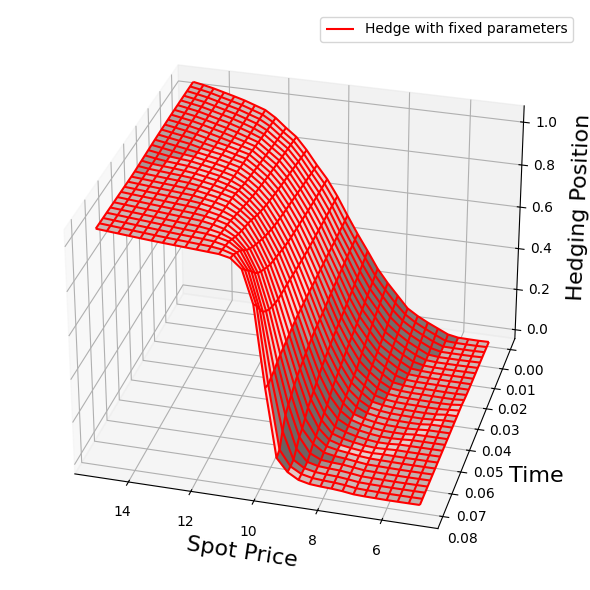

In [10]:
nr_discrete_points = 30 # Number of discrete points for the grid
# Create list of times and values
times = np.linspace(0,T,nr_discrete_points+1)[:-1]
values = np.linspace(x_0-x_0*0.5,x_0+x_0*0.5,nr_discrete_points)
# Empty grid
grid_fix = np.zeros((nr_discrete_points,nr_discrete_points))
#grid_Delta_hedge = np.zeros((nr_discrete_points,nr_discrete_points))
# Fill the grid with the values of the trained hedge
for i in range(len(times)):
    for j in range(len(values)):
        grid_fix[i,j] = hedge_fix([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]
        #grid_Delta_hedge[i,j] = BS_Delta(0.5,0,values[j],T-times[i],x_0)

# 3D PLOT
X, Y = np.meshgrid(values, times)

style.use('default')
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax.plot_wireframe(X, Y , grid_Delta_hedge,color = "darkred",label = "Delta-Hedge")
ax.plot_surface(X, Y , grid_fix,color = "mistyrose")
ax.plot_wireframe(X, Y , grid_fix,color = "red",label = "Hedge with fixed parameters")

ax.view_init(30, 105)
ax.set_ylabel("Time", fontsize=16, labelpad=15)
ax.set_xlabel("Spot Price", fontsize=16)
ax.set_zlabel("Hedging Position", fontsize=16, labelpad=10)
plt.legend()
plt.tight_layout()
plt.savefig('eps/fig_3d_gamma_uncertain_fix.eps', format='eps')
plt.show()

Sample Data

In [20]:
style.use('ggplot')
BATCH_SIZE = 50000 # Nr of Samples for the Histogram
t_k = np.linspace(0,T,n+1)

# The hedge with fix gamma
path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated_fix = [hedge_fix([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S_fix = tf.reduce_sum([hedge_evaluated_fix[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch_fix = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)])

# The hedge for the model with uncertainty
#path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated = [hedge([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S = tf.reduce_sum([hedge_evaluated[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)]) 

Compare the hedges on samples under uncertainty.

C:\Users\jul_ses\AppData\Local\Temp\ipykernel_1704\3957176493.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


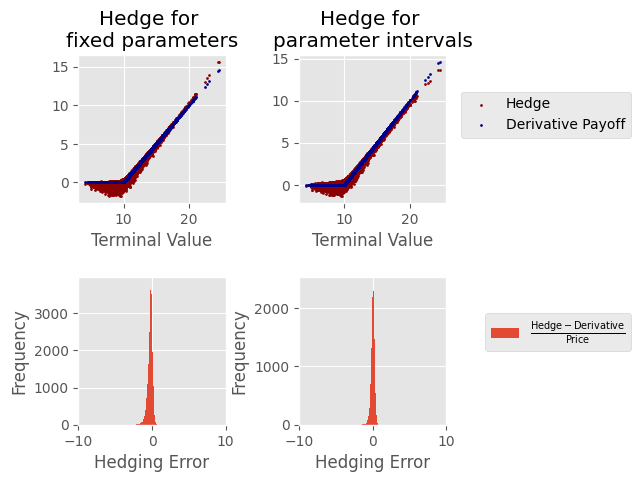

In [21]:
style.use('ggplot')
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5,wspace = 0.5,right=0.7)
axs[0,0].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price_fix + delta_S_fix,(BATCH_SIZE,1)),
            color = "darkred",label = "Hedge",s=2)
axs[0,0].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch_fix,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative Payoff",s=2)
axs[0,0].set_xlabel("Terminal Value")
axs[0,0].set_title("Hedge for \nfixed parameters")
axs[0,0].legend(loc = 0, bbox_to_anchor=(3.8, 0.8))

axs[0,1].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price + delta_S,(BATCH_SIZE,1)),
            color = "darkred",label = "Hedge",s=2)
axs[0,1].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative",s=2)
axs[0,1].set_xlabel("Terminal Value")
axs[0,1].set_title("Hedge for \nparameter intervals")

hedging_error_fix = (((price_fix + delta_S_fix) - derivative_on_batch_fix)/price_fix).numpy()
axs[1,0].hist(hedging_error_fix,100,label = r"$\frac{\mathrm{Hedge}-\mathrm{Derivative}}{\mathrm{Price}}$")
axs[1,0].set_ylabel("Frequency")
axs[1,0].set_xlim([-10,10])
axs[1,0].set_xlabel("Hedging Error")
axs[1,0].legend(loc = 0, bbox_to_anchor=(3.8, 0.8))

hedging_error = (((price + delta_S) - derivative_on_batch)/price).numpy()
axs[1,1].hist(hedging_error,100)
axs[1,1].set_xlabel("Hedging Error")
axs[1,1].set_xlim([-10,10])
axs[1,1].set_ylabel("Frequency")

fig.savefig('eps/fig_call_example_hedge_error.eps', format='eps')
fig.show()

Plot the difference of the hedging errors in a histogram

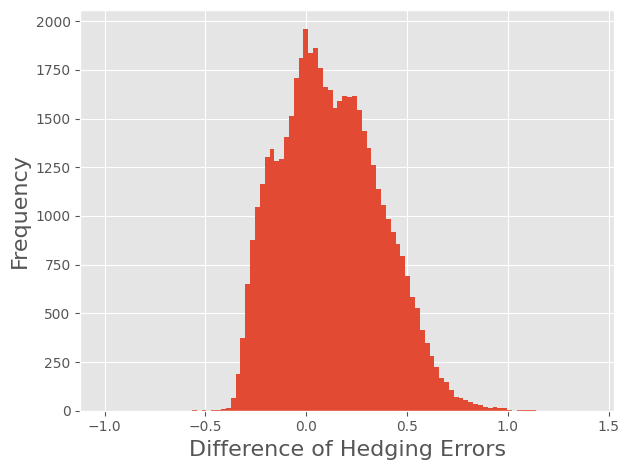

In [22]:
hedging_difference = np.abs(hedging_error_fix) - np.abs(hedging_error)
plt.hist(hedging_difference,100)
#plt.xlim([-2,2])
plt.xlabel("Difference of Hedging Errors", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
#plt.title("Difference of Hedging Errors", fontsize=16)
plt.tight_layout()
plt.savefig('eps/fig_histogram_call_difference.eps', format='eps')
plt.show()

Statistics on the difference

In [23]:
pd.DataFrame(hedging_difference).describe()

,0
count,50000.000000
mean,0.122821
std,0.245626
min,-1.000158
25%,-0.062648
50%,0.104113
75%,0.294307
max,1.405393


## Statistics on Hedging Errors

Hedging Error of the non-robust strategy.

In [24]:
print("Price of the fix hedge: {}".format(price_fix))
print("Price of the robust hedge: {}".format(price))

Price of the fix hedge: 0.6274967193603516
Price of the robust hedge: 0.788949191570282


### Absolute Error

Hedging Error of the fix strategy.

In [25]:
pd.DataFrame(np.abs(hedging_error_fix)*price_fix).describe()

,0
count,50000.000000
mean,0.192916
std,0.182878
min,0.000003
25%,0.063964
50%,0.140446
75%,0.263773
max,1.804302


Hedging Error of the robust strategy.

In [26]:
pd.DataFrame(np.abs(hedging_error)*price).describe()

,0
count,50000.000000
mean,0.145653
std,0.127650
min,0.000005
25%,0.052983
50%,0.114428
75%,0.201697
max,1.354251


### Relative Error

In [27]:
pd.DataFrame(np.abs(hedging_error_fix)).describe()

,0
count,50000.000000
mean,0.307437
std,0.291441
min,0.000005
25%,0.101936
50%,0.223820
75%,0.420358
max,2.875396


In [28]:
pd.DataFrame(np.abs(hedging_error)).describe()

,0
count,50000.000000
mean,0.184616
std,0.161797
min,0.000007
25%,0.067157
50%,0.145038
75%,0.255653
max,1.716525
